# Image segmentation

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [81]:
labeled_folder_path = "img_labeled"
labels = [str(i) for i in range(4)]
label_str = ['APL', 'BG', 'BDY', 'HD']
n_label = int(labels[-1]) + 1

In [2]:
def open_img(img_path):
    img = cv2.imread(img_path)
    
    (left, upper, right, lower) = (572, 271, 1330, 940)
    img_cropped = img[upper:lower, left:right]
    
    return img_cropped

In [3]:
image_no = 3
bg = open_img("img_raw/bg.png")
img1 = open_img(f"img_raw/{image_no}.png")

bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [4]:
img2 = open_img(f"img_probe/2.png")

In [5]:
cv2.imshow('bg',bg)
cv2.imshow('1',img1)
cv2.imshow('2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [133]:
def segmentation(image_no, in_folder, out_folder):
    img_path = f"{in_folder}/{image_no}.png"
    img1 = open_img(img_path)

    a = []
    nrows = 15
    ncols = 17

    size = 40
    w_start = 35
    h_start = 31

    y_start = h_start
    for i in range(nrows):
        if(i%2==0):
            y_end = y_start + size
        elif(i%2==1):
            y_end = y_start + (size+1)

        img_row = []
        x_start = w_start
        for j in range(ncols):
            if(j%2==0):
                x_end = x_start + (size+1)
            elif(j%2==1):
                x_end = x_start + size

            img_to_write = img1[y_start:y_start+size, x_start:x_start+size]
            
            dir_path = f"{out_folder}/img_{image_no}"
            if(not os.path.exists(dir_path)):
                os.mkdir(dir_path)
                
#             print(f"{dir_path}/img_{image_no}_{i+1}_{j+1}.png")
            
            first_digit = str(i+1)
            second_digit = str(j+1)
            if(i+1<10):
                first_digit = f"0{first_digit}"
            if(j+1<10):
                second_digit = f"0{second_digit}"

            cv2.imwrite(f"{dir_path}/img_{image_no}_{first_digit}_{second_digit}.png", img_to_write)
            img_row.append(img_to_write)
            
            x_start = x_end

        a.append(img_row)
        y_start = y_end
        
    return a

In [7]:
for i in range(1,11):
    segmentation(i, "img_raw", "img_proc")

In [134]:
for i in range(7):
    segmentation(i, "img_probe", "img_probe")

# Label the objects

In [89]:
def calc_hist(img):
    chans = cv2.split(img)
    colors = ("b", "g", "r")
    
#     plt.figure()
    
    hist_arr = []
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
#         plt.title("'Flattened' Color Histogram")
#         plt.xlabel("Bins")
#         plt.ylabel("# of Pixels")
        
        hist = cv2.calcHist([chan], [0], None, [128], [0, 256])
        norm_hist = cv2.normalize(hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        hist_arr.append(norm_hist)
        
        # plot the histogram
#         axes[0].plot(norm_hist, color = color)
#         axes[0].set_xlim([0, 128])
    
#     axes[1].imshow(img[::,::,::-1])
#     plt.show()    
#     plt.close()
    
    return hist_arr

In [92]:
def plot_hist(hist):
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    chans = (0, 1, 2)
    colors = ("b", "g", "r")
    for (chan, color) in zip(chans, colors):
        plt.plot(hist[chan], color=color)
    
    plt.show()
    plt.close()

<Figure size 432x288 with 0 Axes>

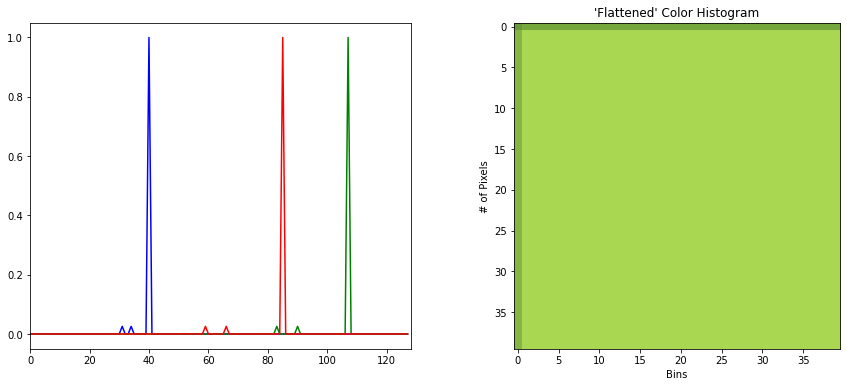

<Figure size 432x288 with 0 Axes>

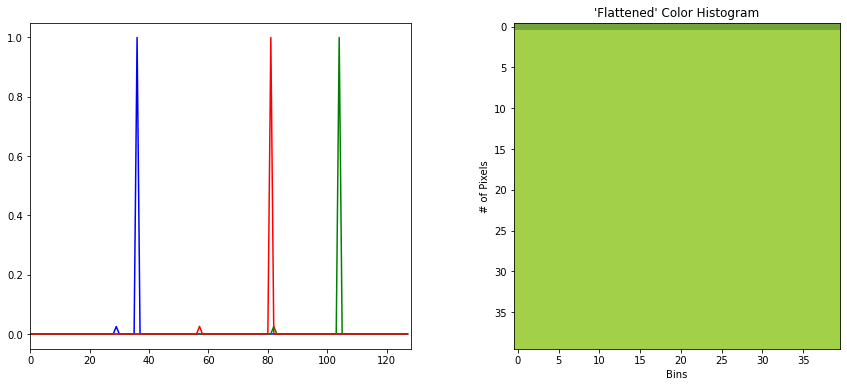

<Figure size 432x288 with 0 Axes>

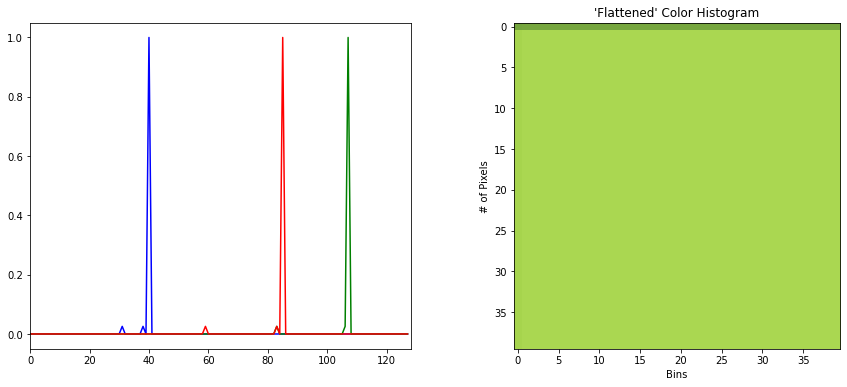

<Figure size 432x288 with 0 Axes>

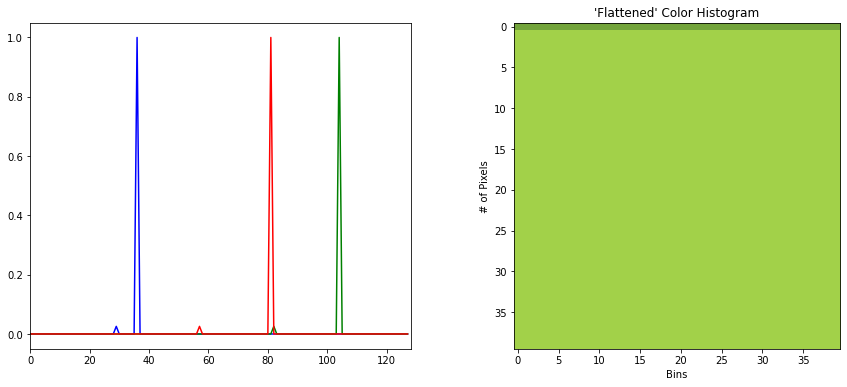

<Figure size 432x288 with 0 Axes>

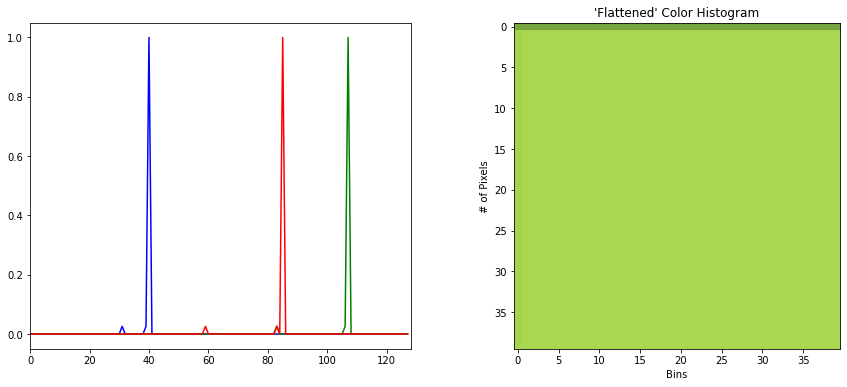

<Figure size 432x288 with 0 Axes>

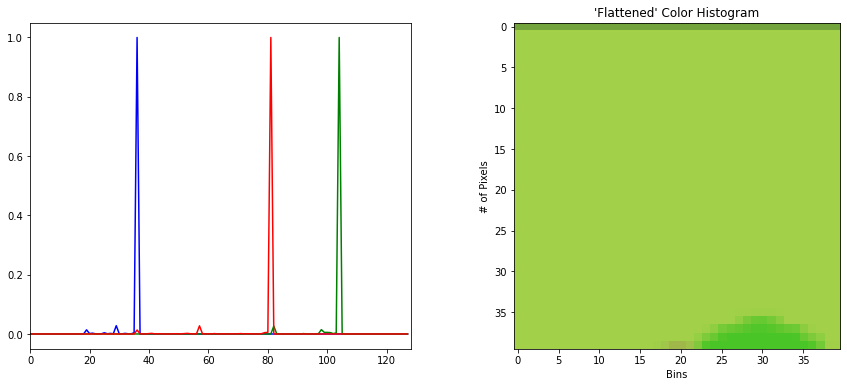

<Figure size 432x288 with 0 Axes>

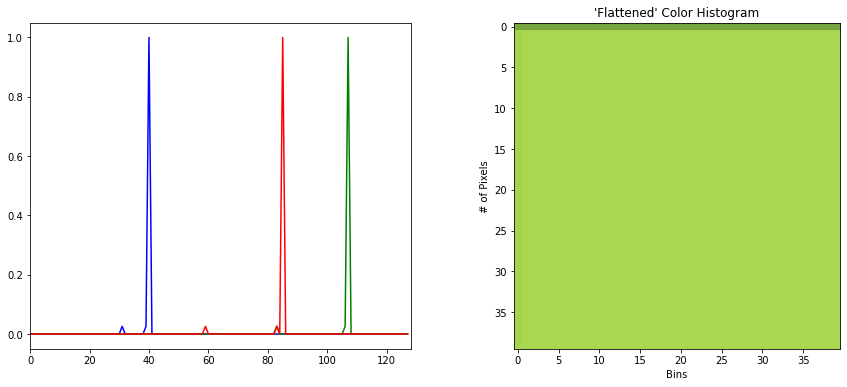

<Figure size 432x288 with 0 Axes>

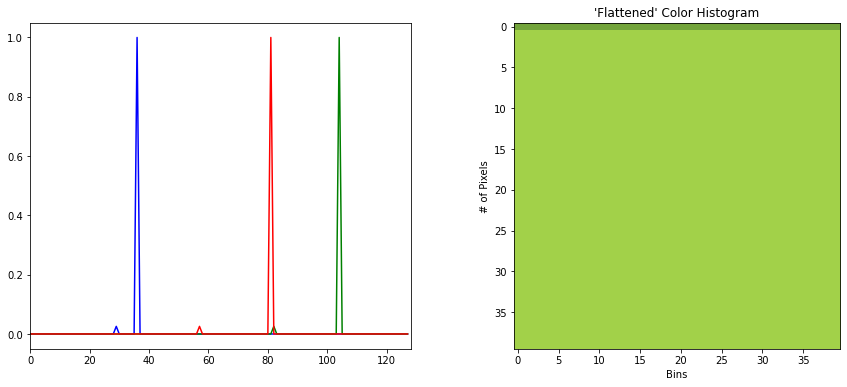

<Figure size 432x288 with 0 Axes>

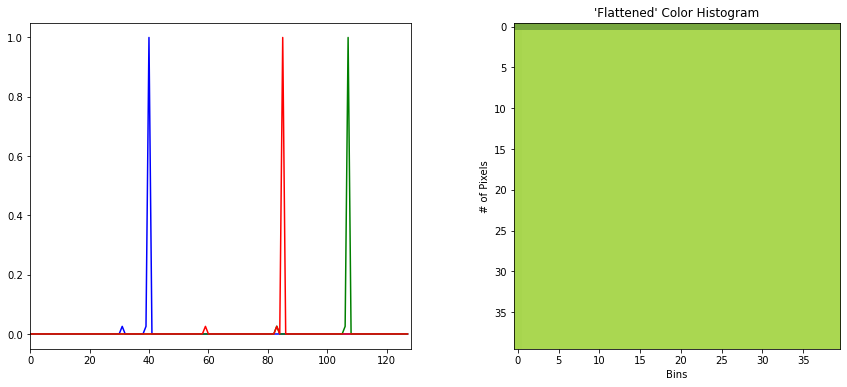

<Figure size 432x288 with 0 Axes>

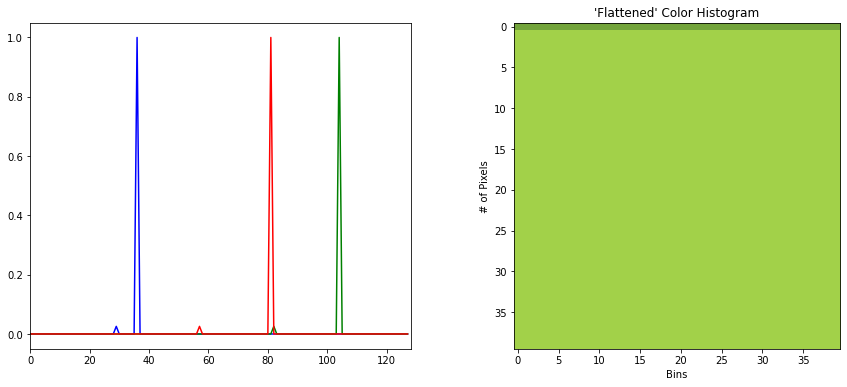

<Figure size 432x288 with 0 Axes>

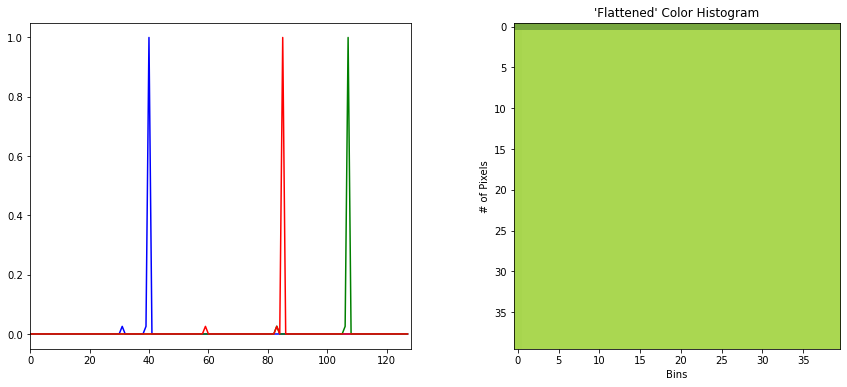

<Figure size 432x288 with 0 Axes>

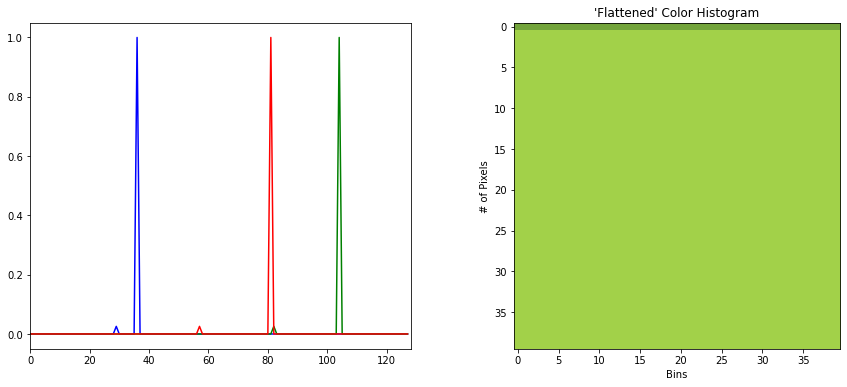

<Figure size 432x288 with 0 Axes>

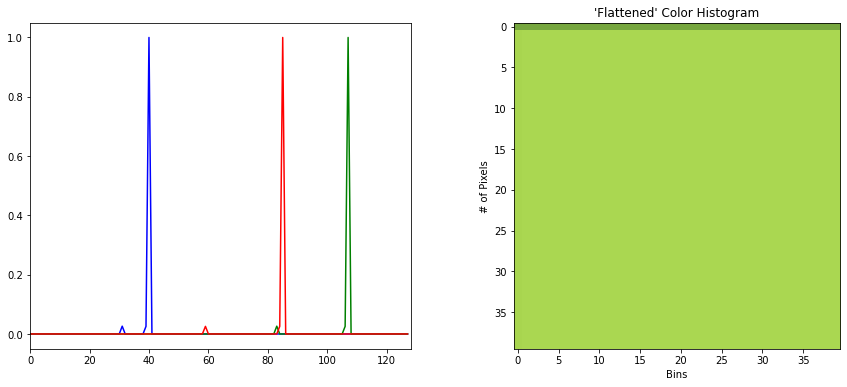

<Figure size 432x288 with 0 Axes>

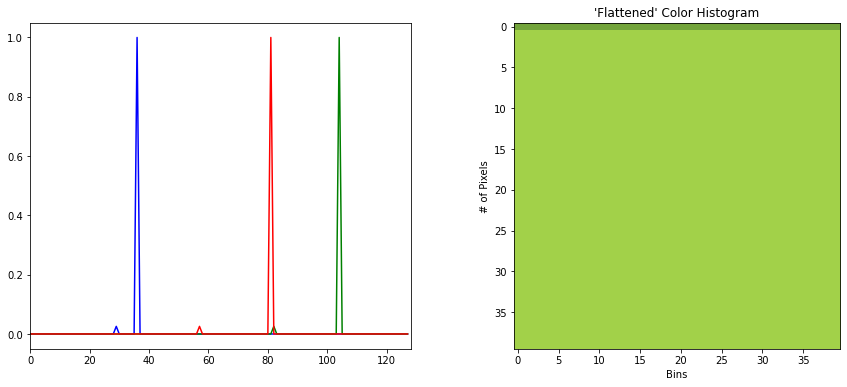

<Figure size 432x288 with 0 Axes>

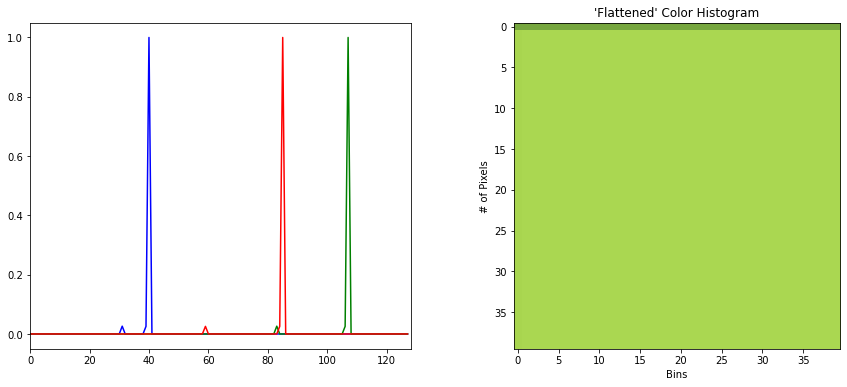

<Figure size 432x288 with 0 Axes>

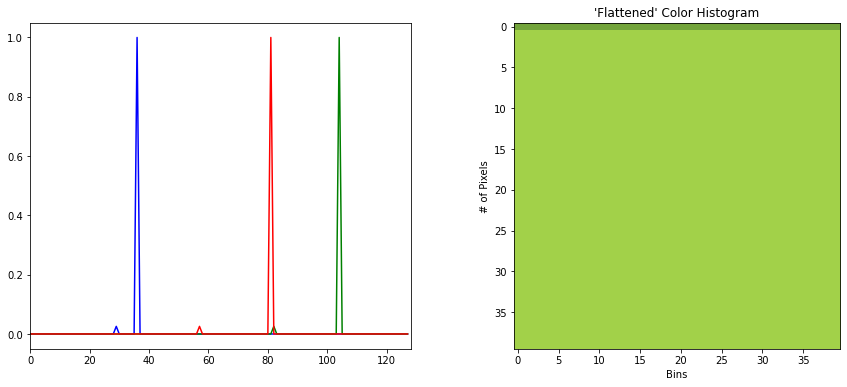

<Figure size 432x288 with 0 Axes>

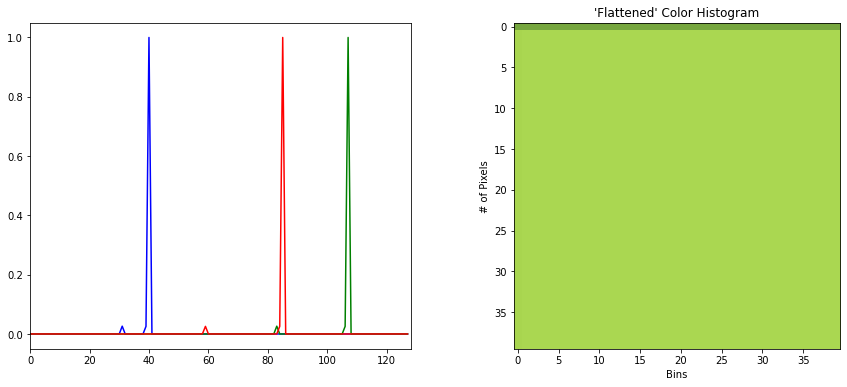

<Figure size 432x288 with 0 Axes>

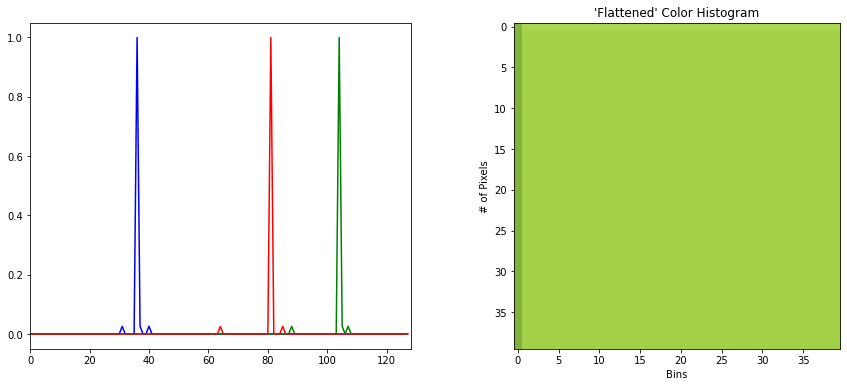

<Figure size 432x288 with 0 Axes>

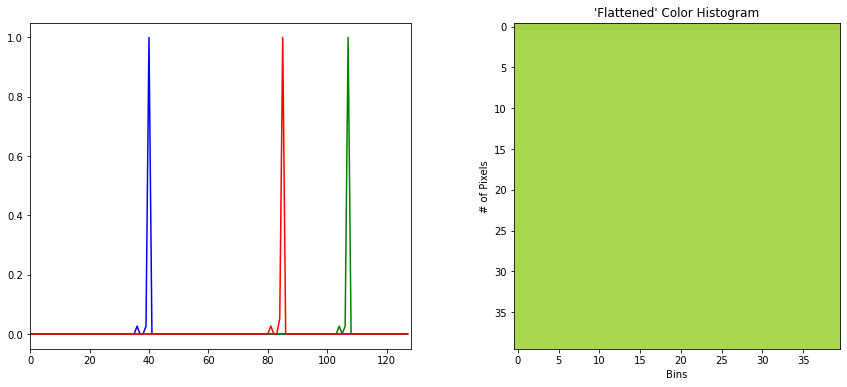

<Figure size 432x288 with 0 Axes>

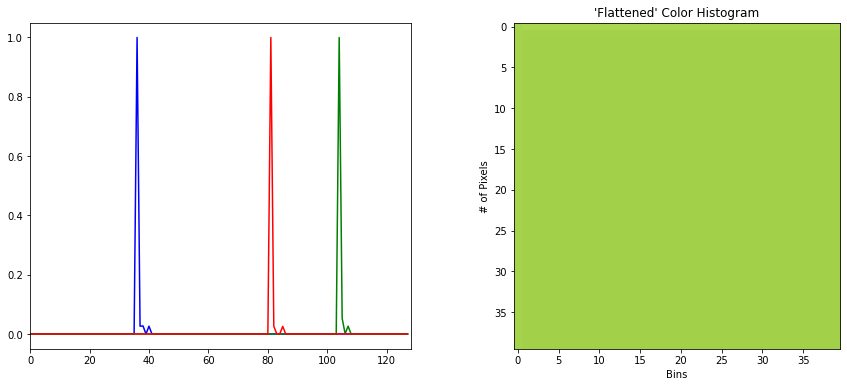

<Figure size 432x288 with 0 Axes>

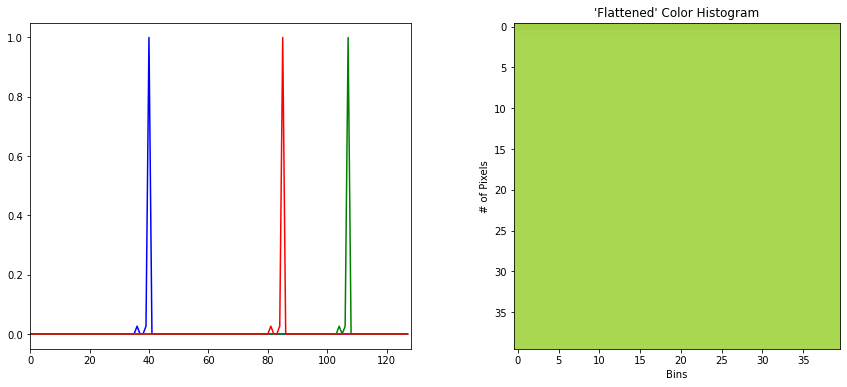

<Figure size 432x288 with 0 Axes>

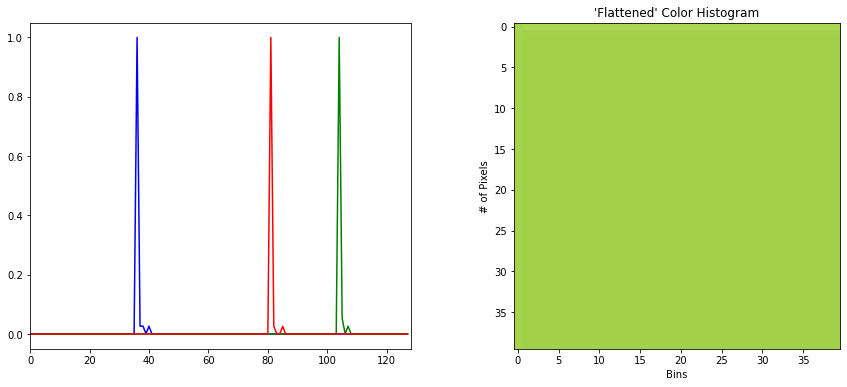

<Figure size 432x288 with 0 Axes>

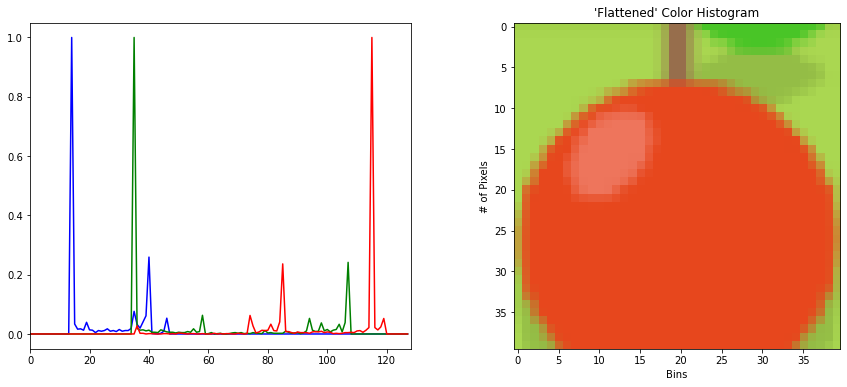

<Figure size 432x288 with 0 Axes>

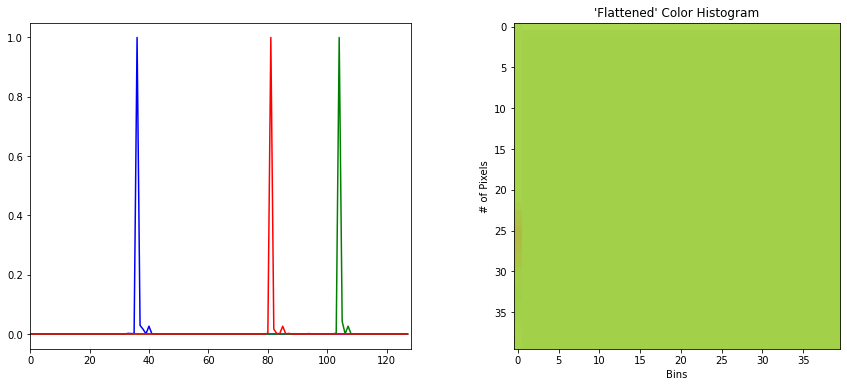

<Figure size 432x288 with 0 Axes>

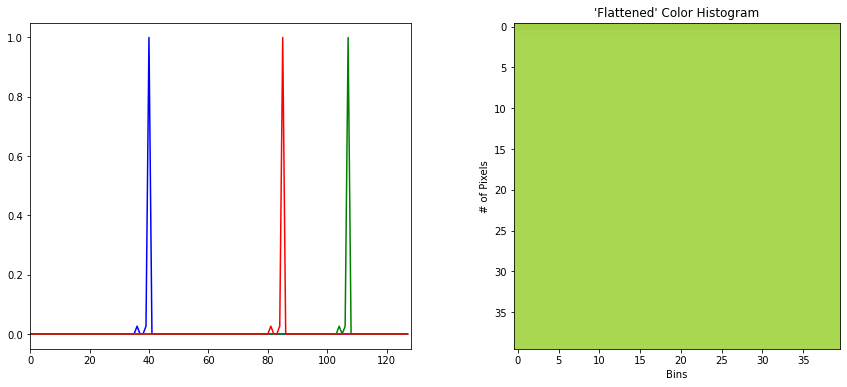

<Figure size 432x288 with 0 Axes>

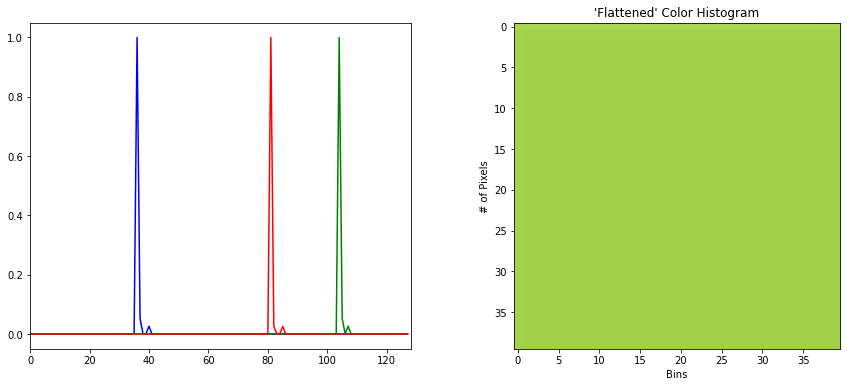

<Figure size 432x288 with 0 Axes>

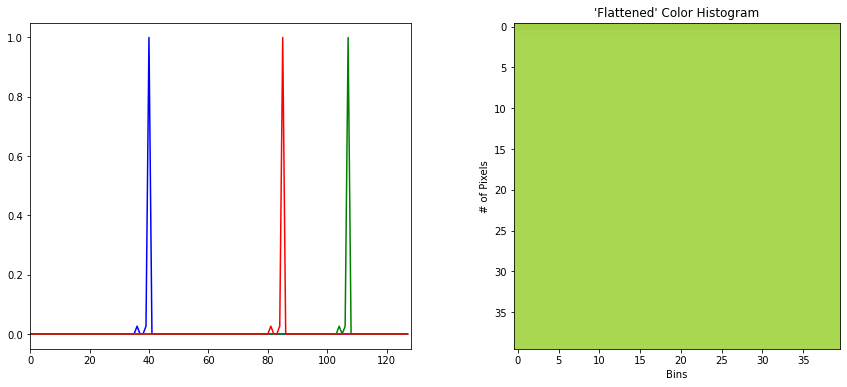

<Figure size 432x288 with 0 Axes>

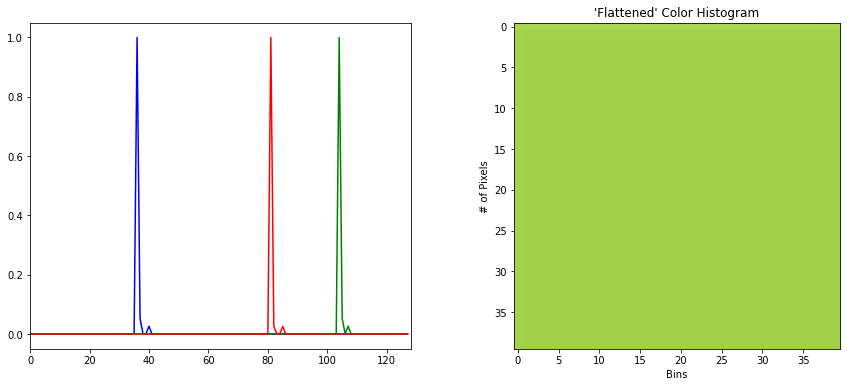

<Figure size 432x288 with 0 Axes>

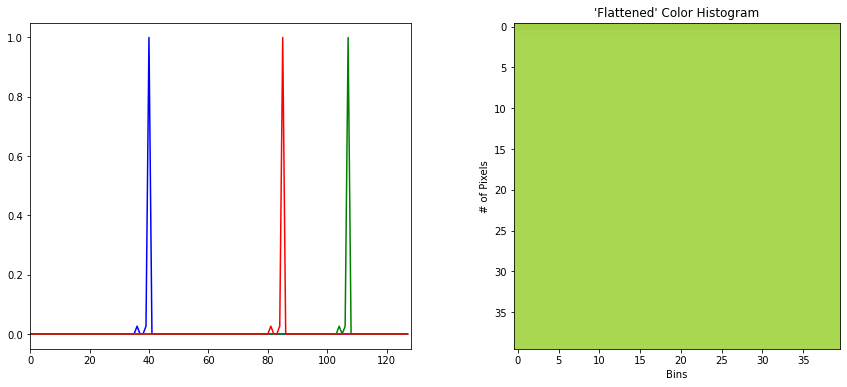

<Figure size 432x288 with 0 Axes>

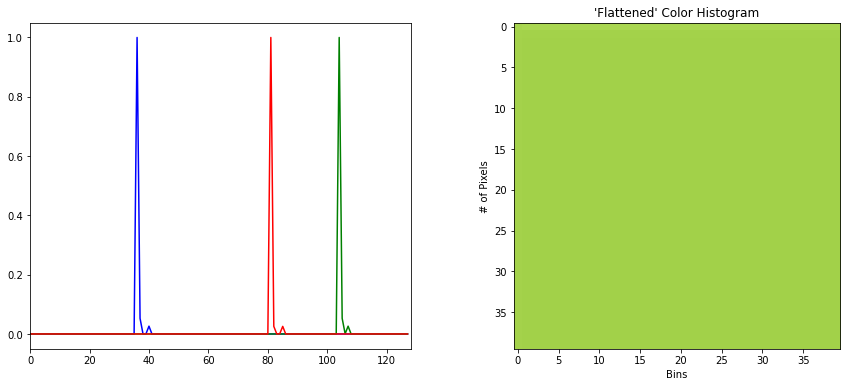

<Figure size 432x288 with 0 Axes>

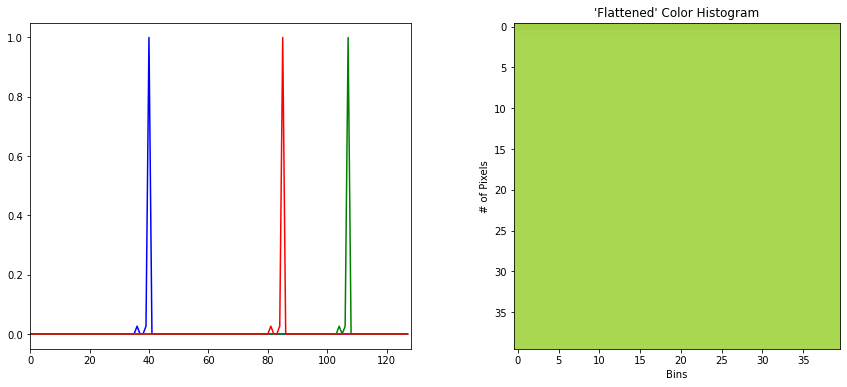

<Figure size 432x288 with 0 Axes>

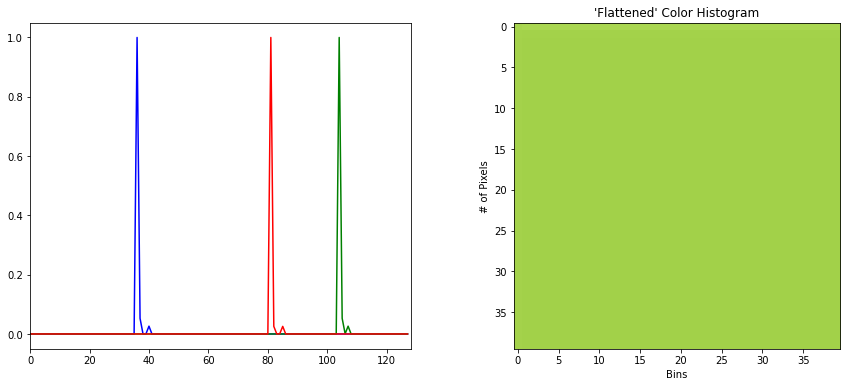

<Figure size 432x288 with 0 Axes>

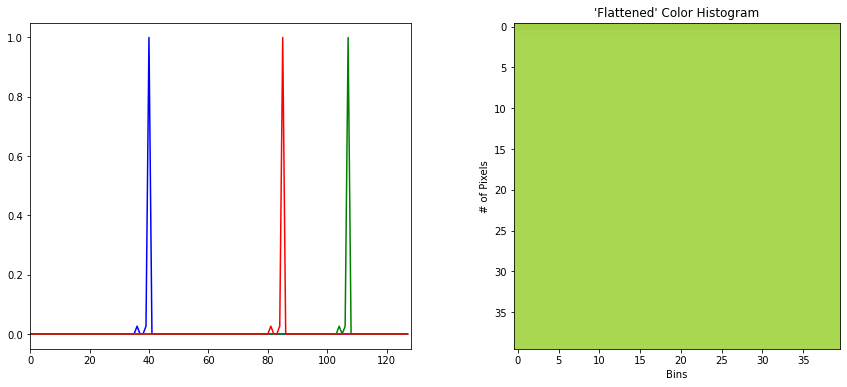

<Figure size 432x288 with 0 Axes>

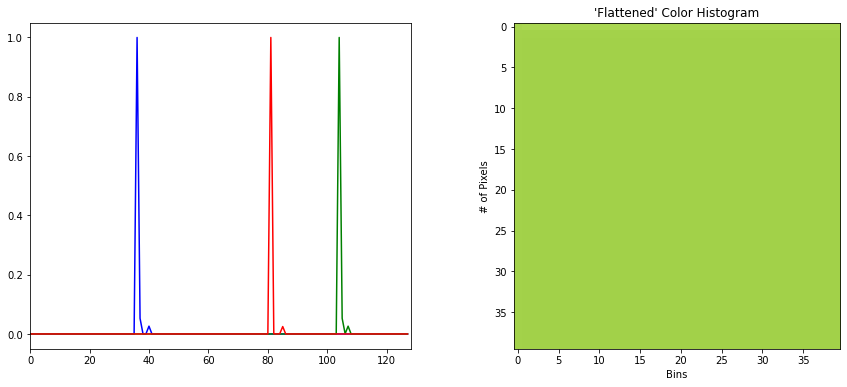

<Figure size 432x288 with 0 Axes>

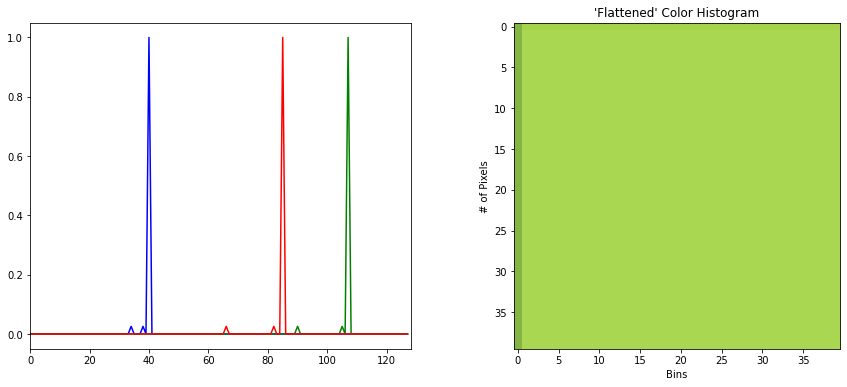

<Figure size 432x288 with 0 Axes>

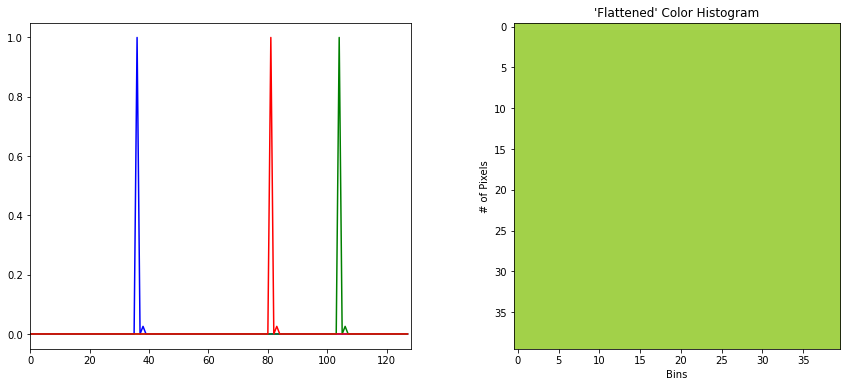

<Figure size 432x288 with 0 Axes>

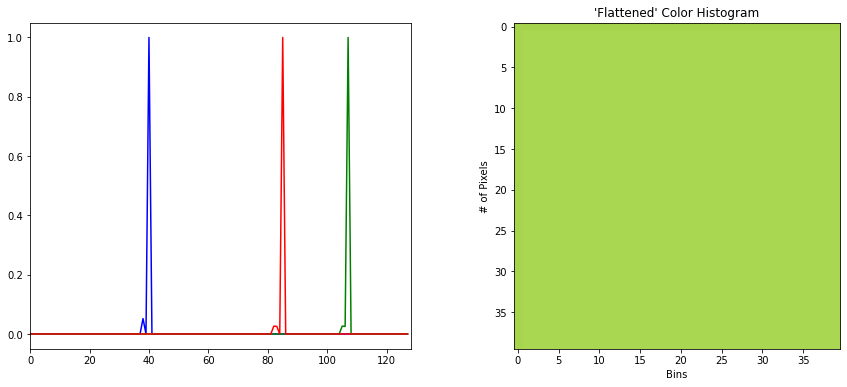

<Figure size 432x288 with 0 Axes>

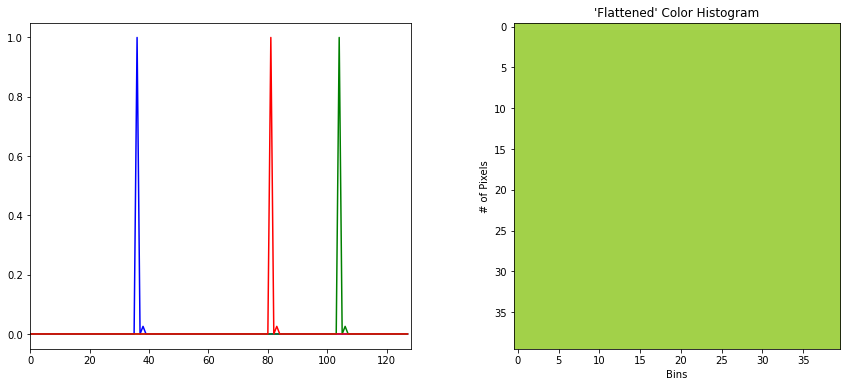

<Figure size 432x288 with 0 Axes>

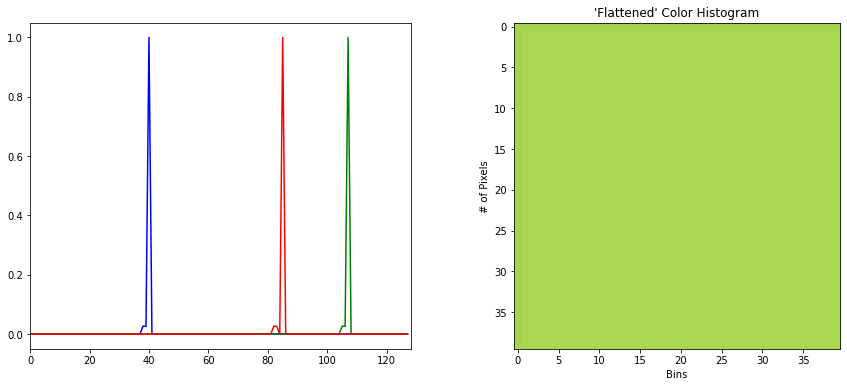

<Figure size 432x288 with 0 Axes>

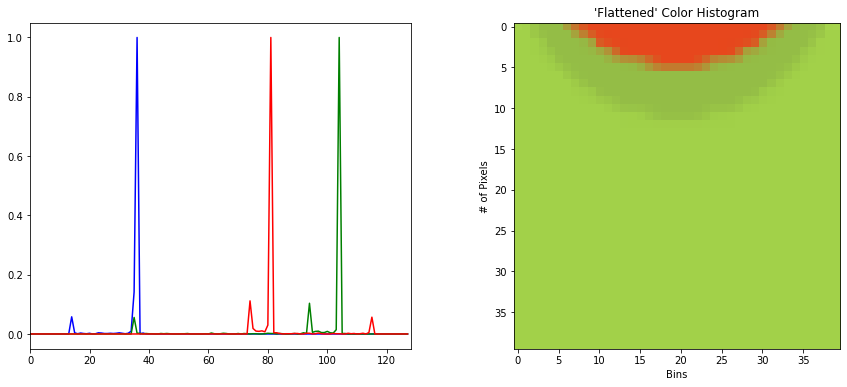

<Figure size 432x288 with 0 Axes>

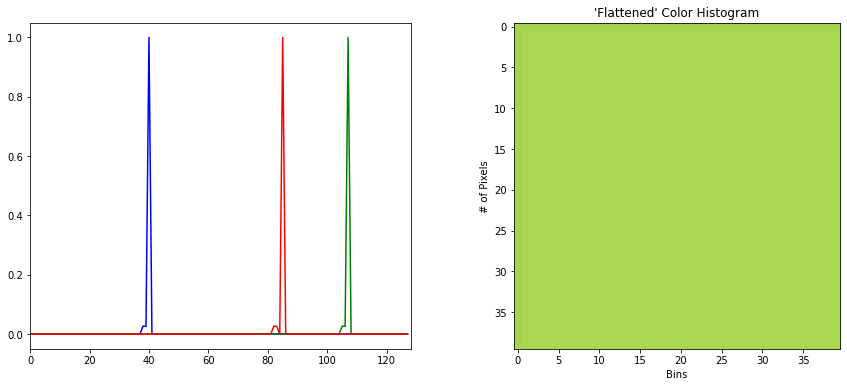

<Figure size 432x288 with 0 Axes>

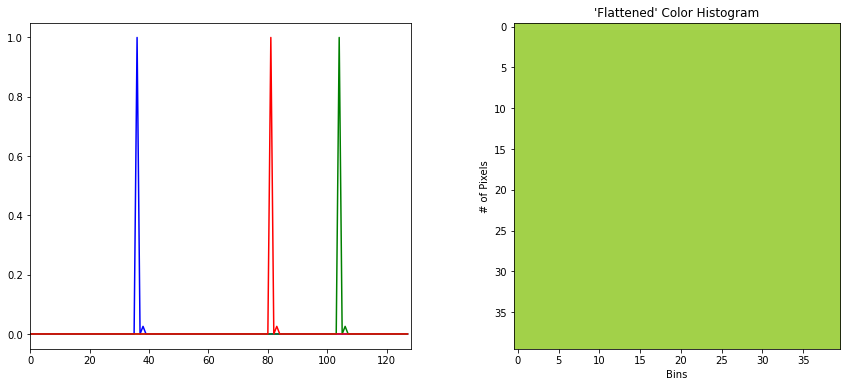

<Figure size 432x288 with 0 Axes>

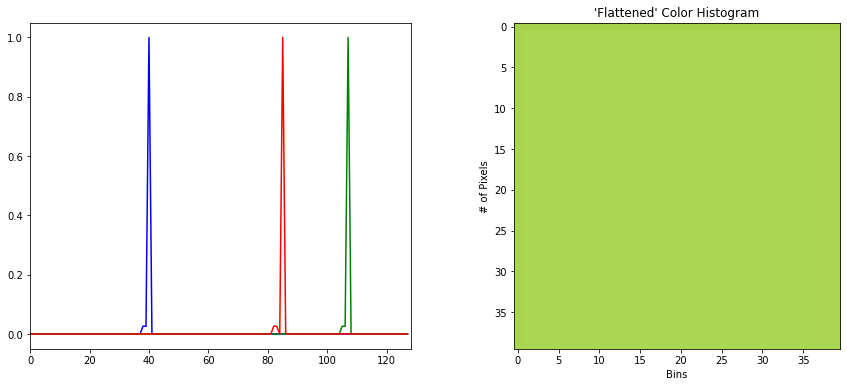

<Figure size 432x288 with 0 Axes>

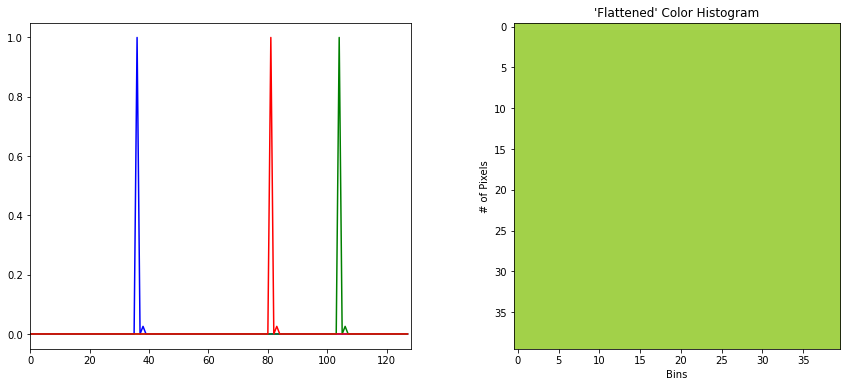

<Figure size 432x288 with 0 Axes>

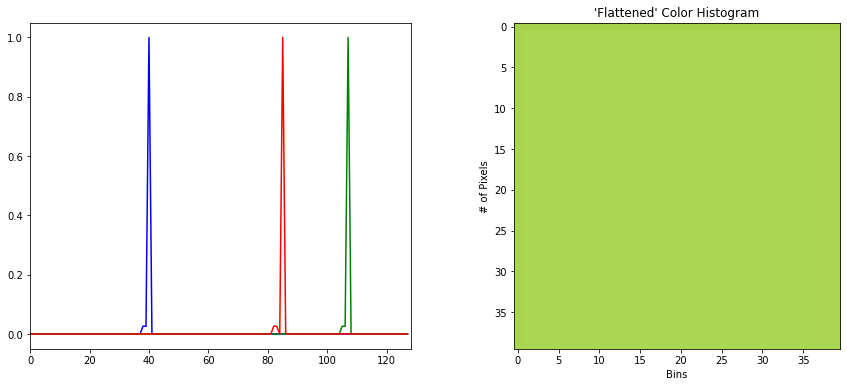

<Figure size 432x288 with 0 Axes>

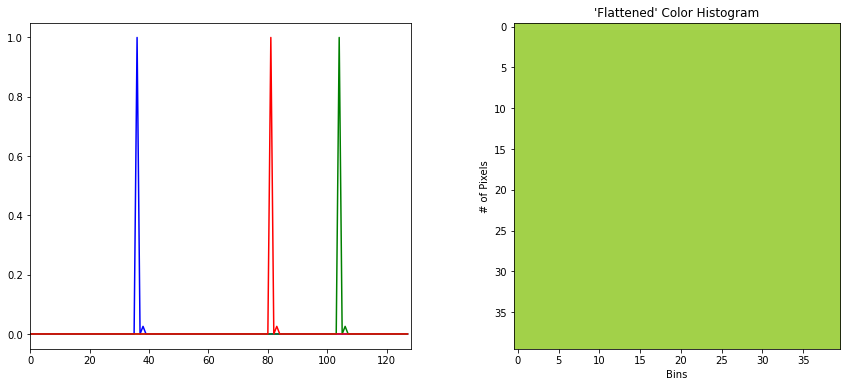

<Figure size 432x288 with 0 Axes>

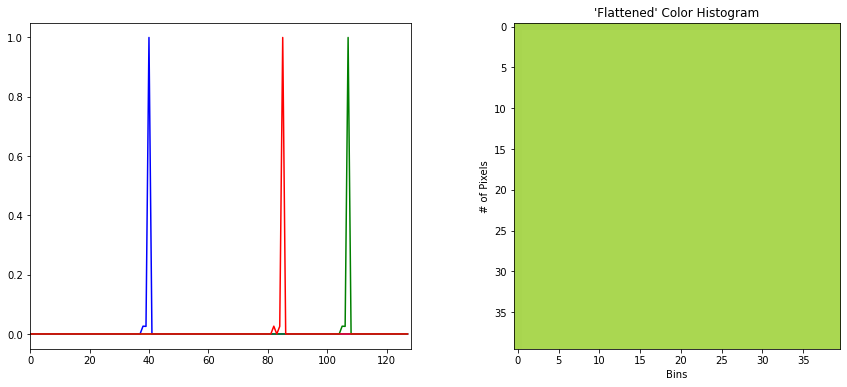

<Figure size 432x288 with 0 Axes>

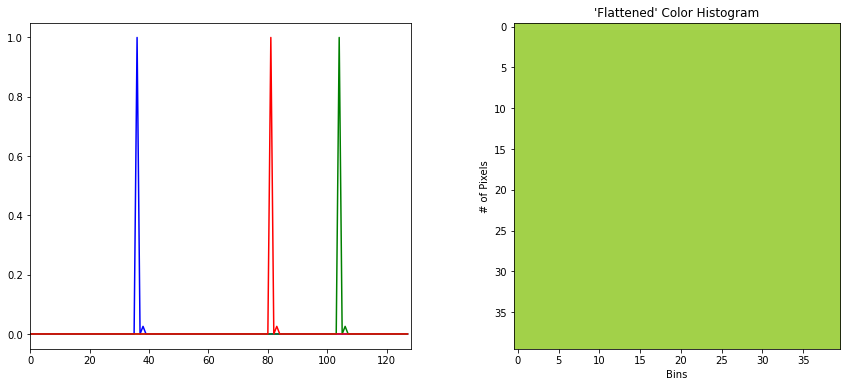

<Figure size 432x288 with 0 Axes>

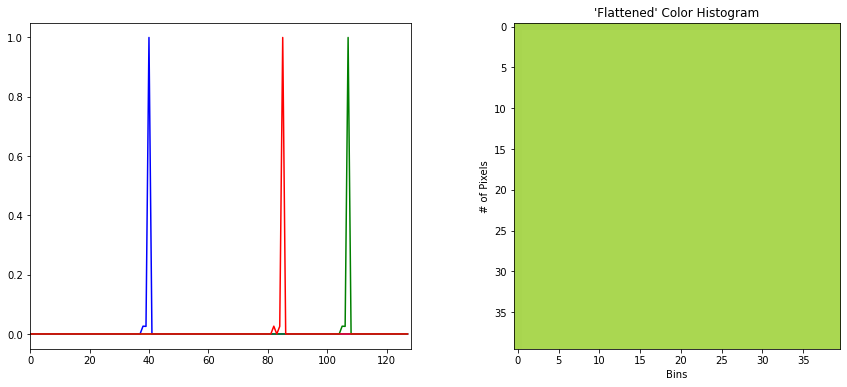

<Figure size 432x288 with 0 Axes>

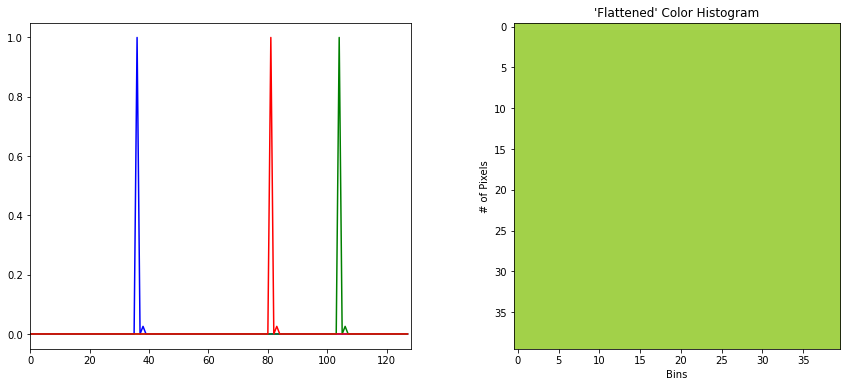

<Figure size 432x288 with 0 Axes>

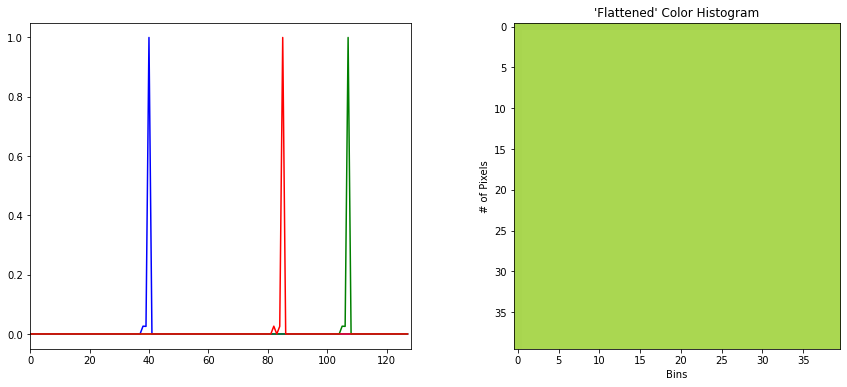

<Figure size 432x288 with 0 Axes>

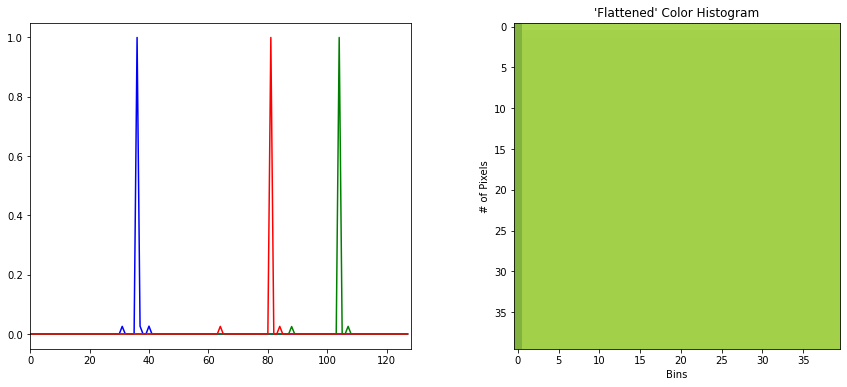

<Figure size 432x288 with 0 Axes>

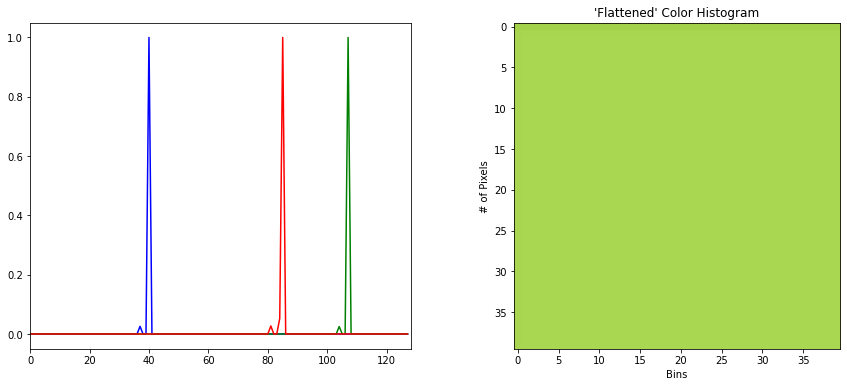

<Figure size 432x288 with 0 Axes>

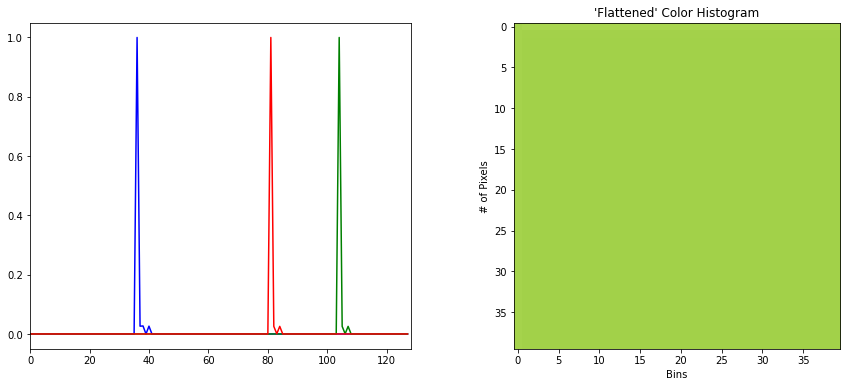

<Figure size 432x288 with 0 Axes>

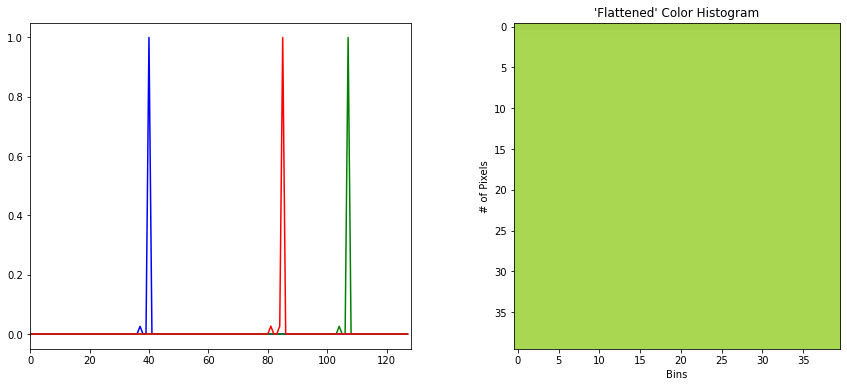

<Figure size 432x288 with 0 Axes>

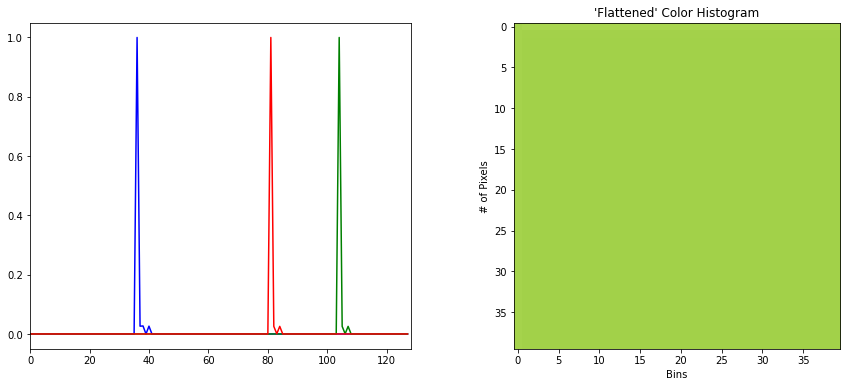

<Figure size 432x288 with 0 Axes>

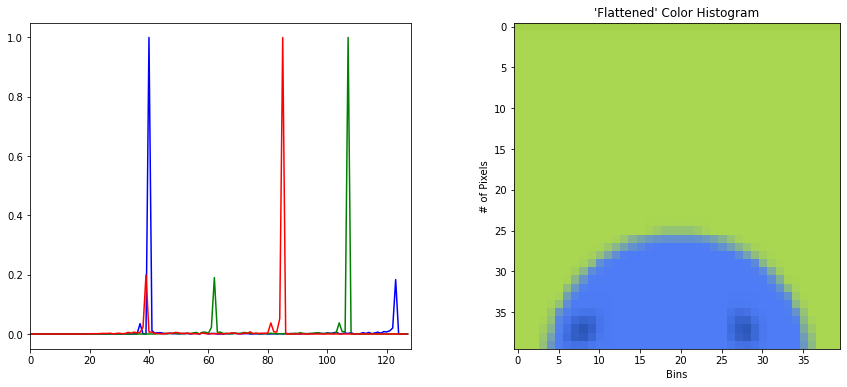

<Figure size 432x288 with 0 Axes>

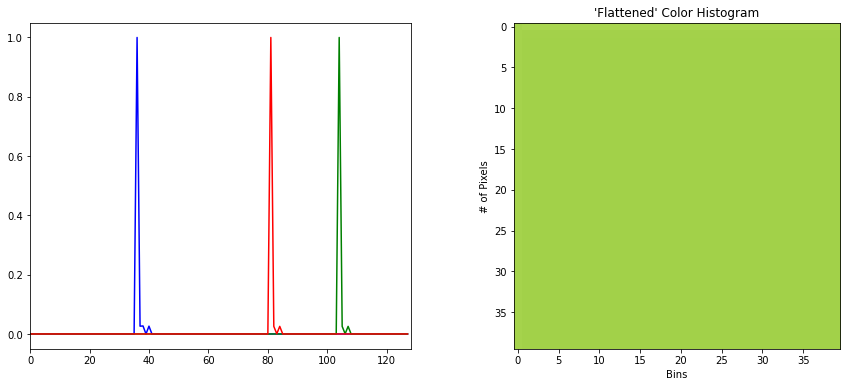

<Figure size 432x288 with 0 Axes>

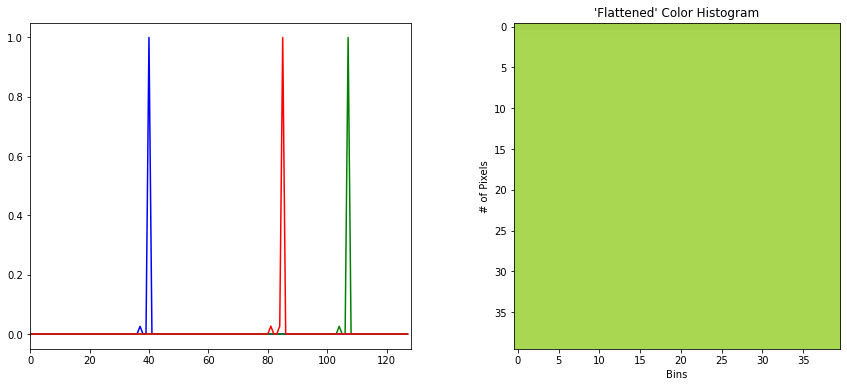

<Figure size 432x288 with 0 Axes>

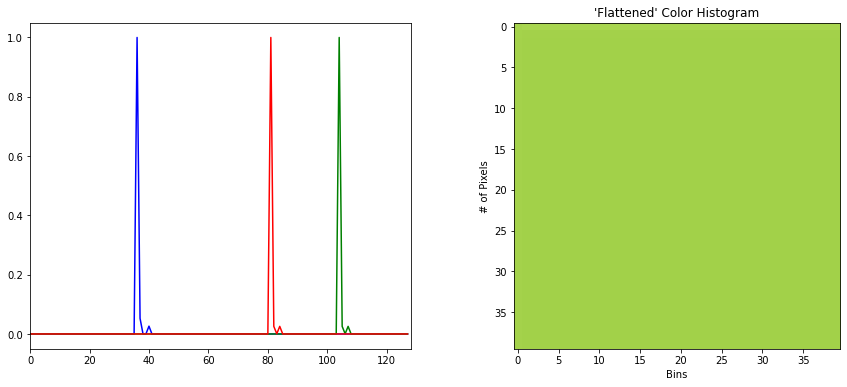

<Figure size 432x288 with 0 Axes>

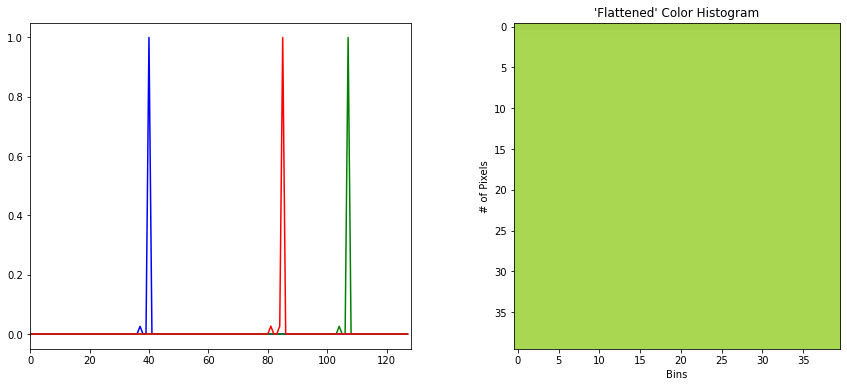

<Figure size 432x288 with 0 Axes>

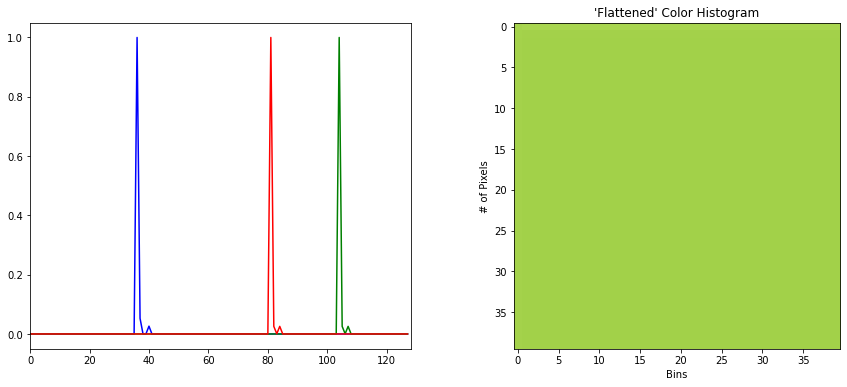

<Figure size 432x288 with 0 Axes>

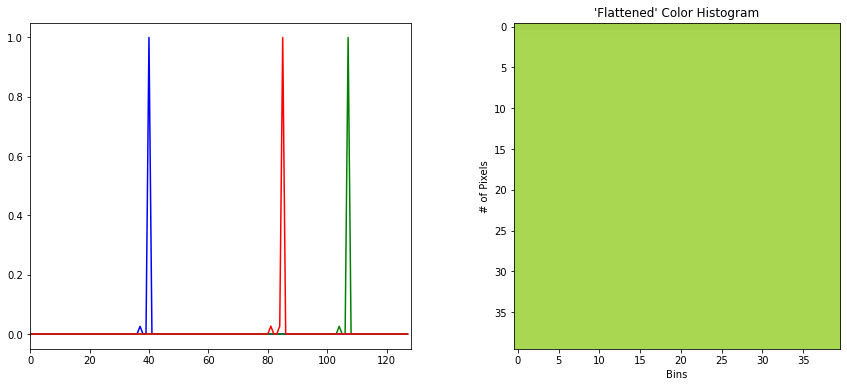

<Figure size 432x288 with 0 Axes>

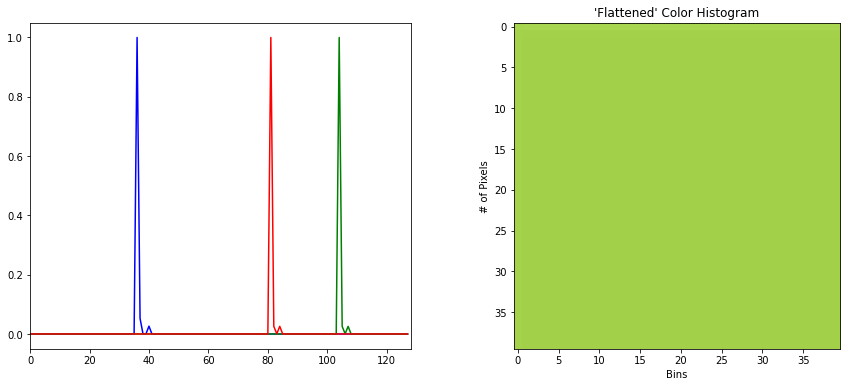

<Figure size 432x288 with 0 Axes>

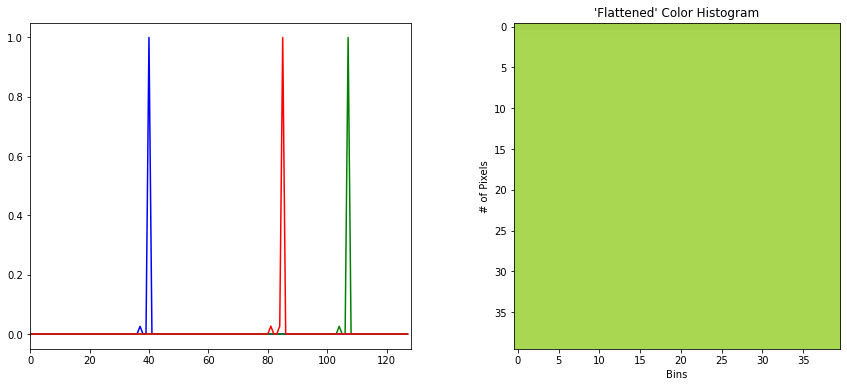

<Figure size 432x288 with 0 Axes>

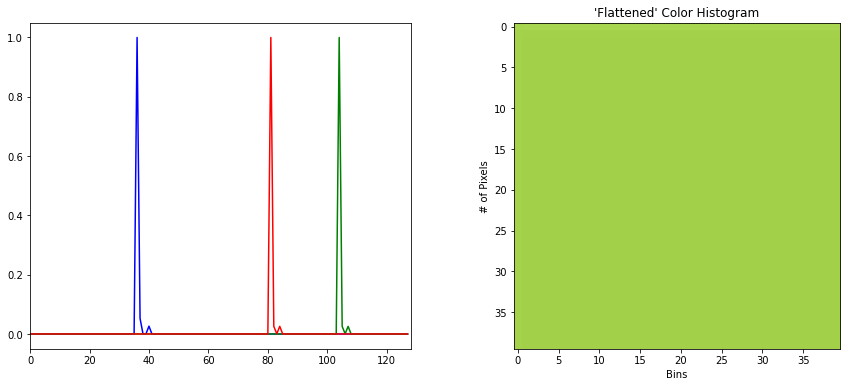

<Figure size 432x288 with 0 Axes>

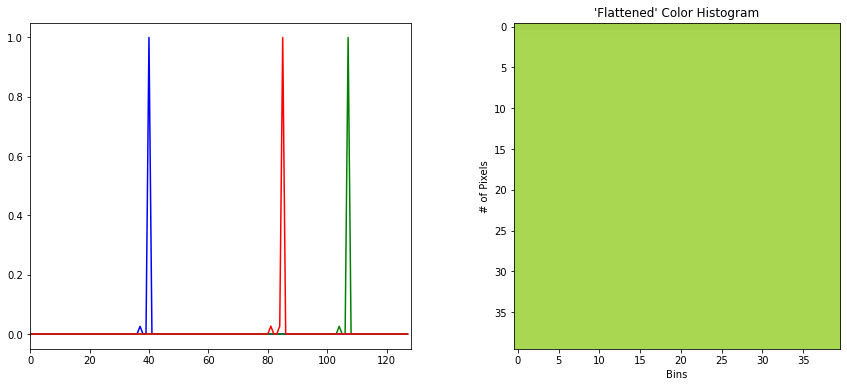

<Figure size 432x288 with 0 Axes>

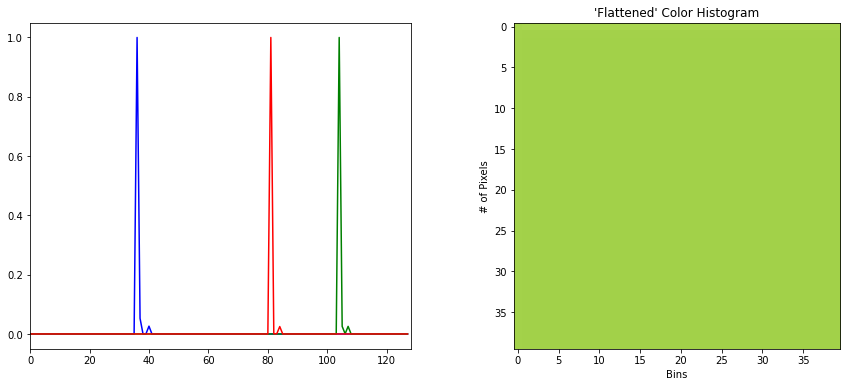

<Figure size 432x288 with 0 Axes>

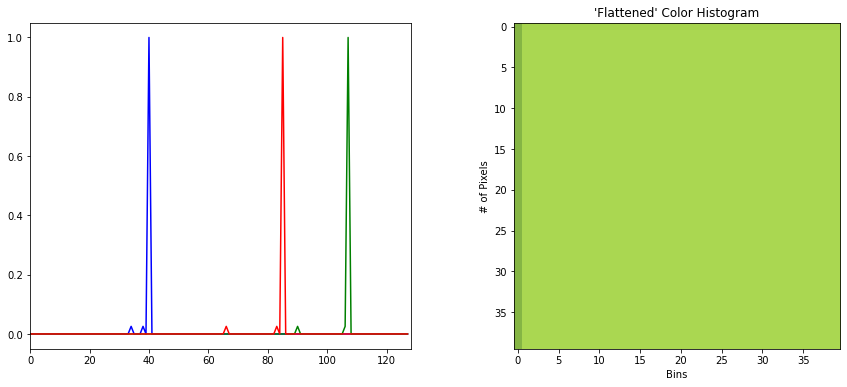

<Figure size 432x288 with 0 Axes>

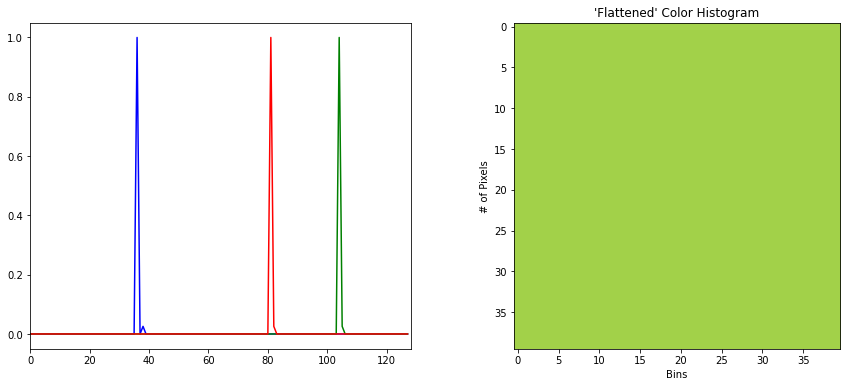

<Figure size 432x288 with 0 Axes>

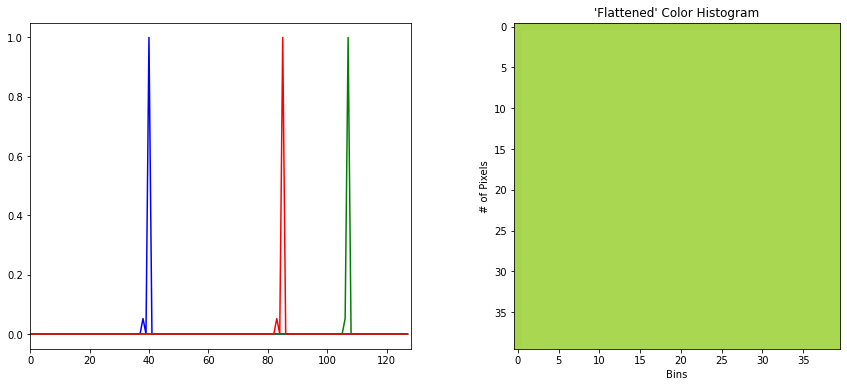

<Figure size 432x288 with 0 Axes>

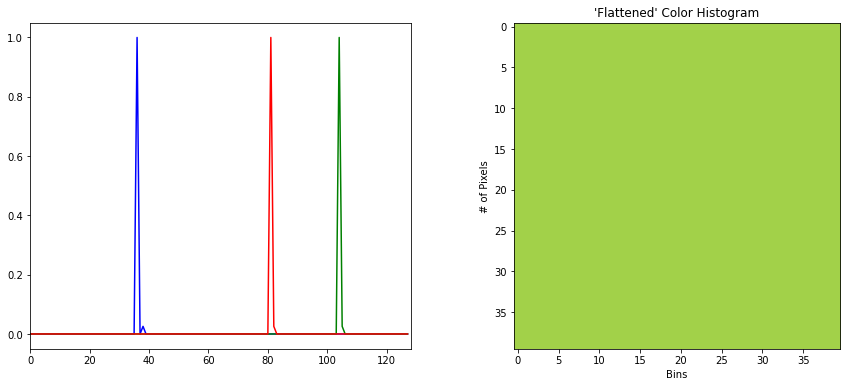

<Figure size 432x288 with 0 Axes>

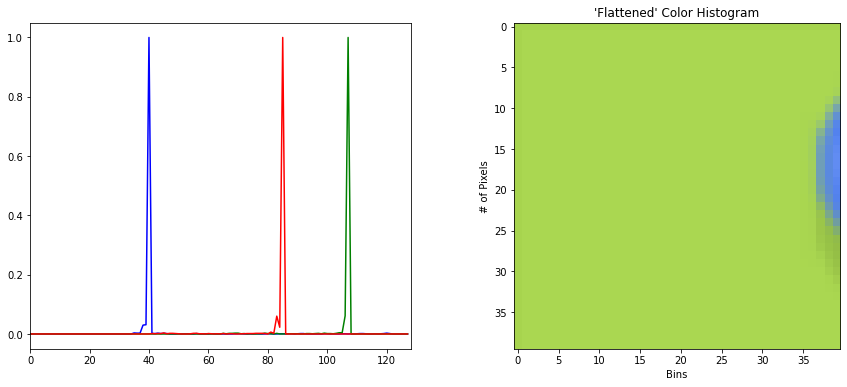

<Figure size 432x288 with 0 Axes>

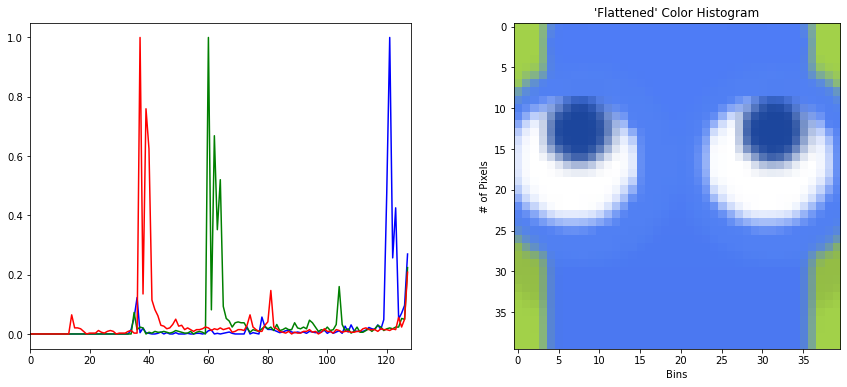

<Figure size 432x288 with 0 Axes>

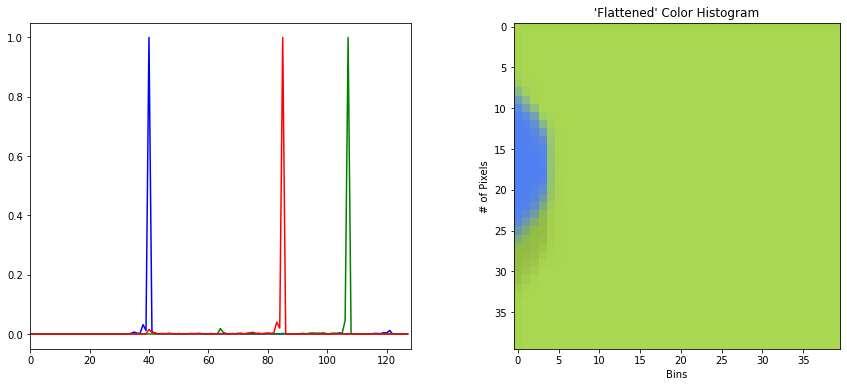

<Figure size 432x288 with 0 Axes>

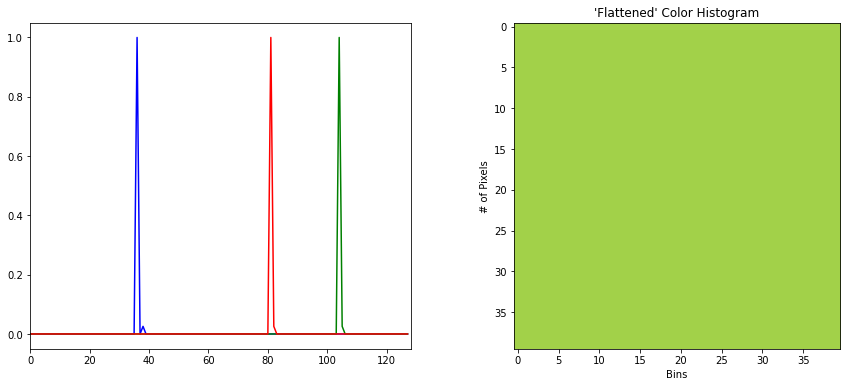

<Figure size 432x288 with 0 Axes>

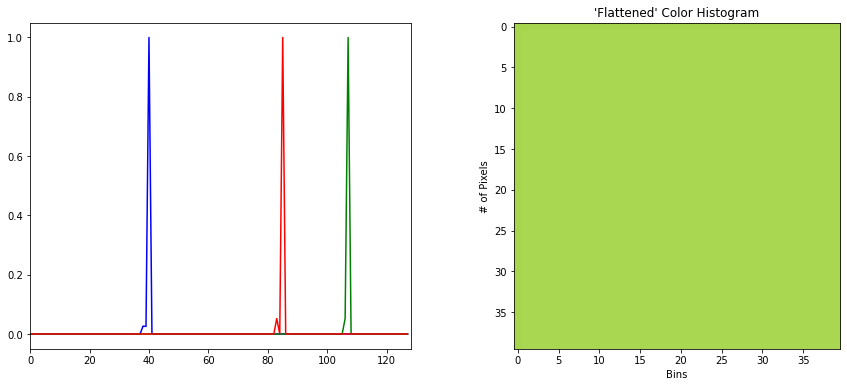

<Figure size 432x288 with 0 Axes>

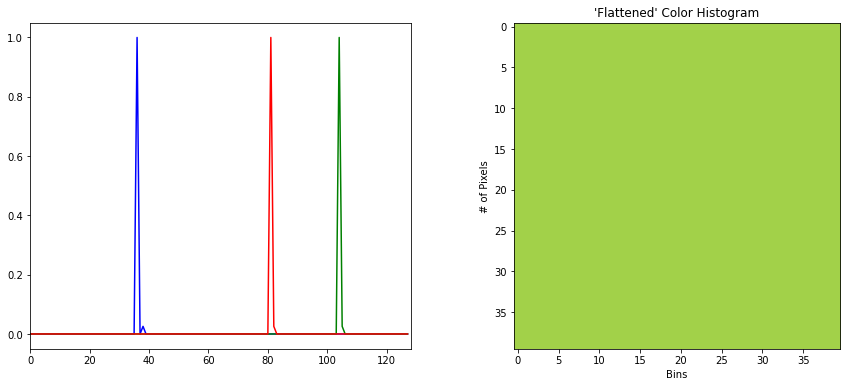

<Figure size 432x288 with 0 Axes>

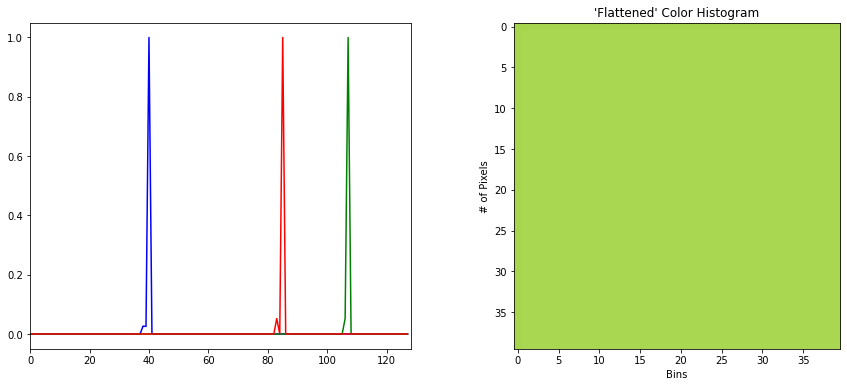

<Figure size 432x288 with 0 Axes>

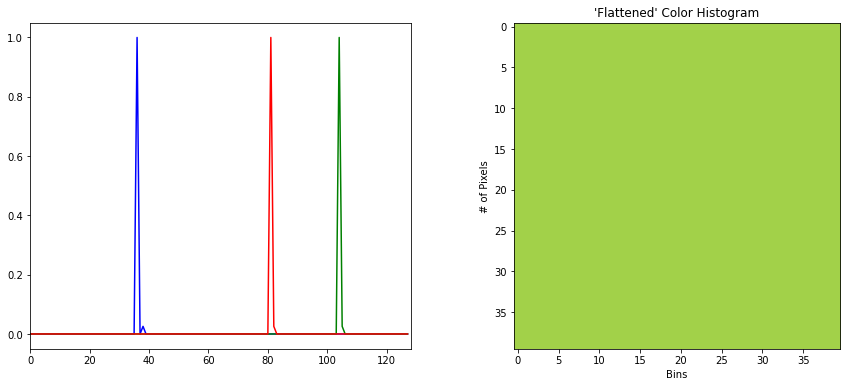

<Figure size 432x288 with 0 Axes>

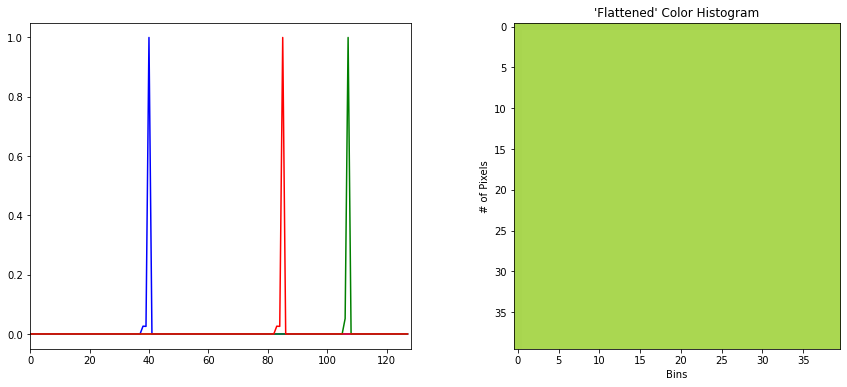

<Figure size 432x288 with 0 Axes>

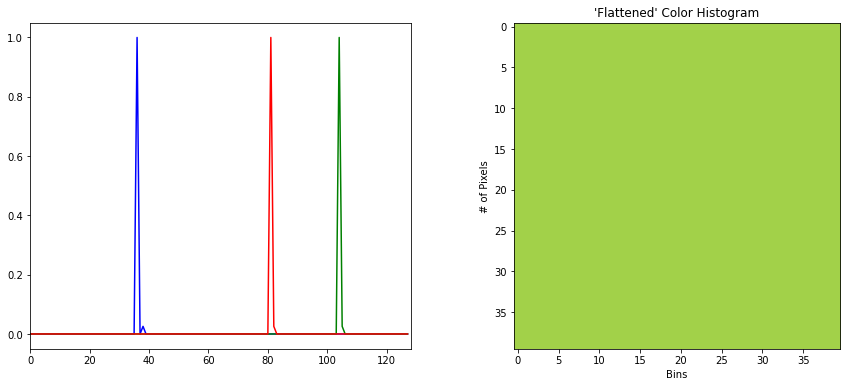

<Figure size 432x288 with 0 Axes>

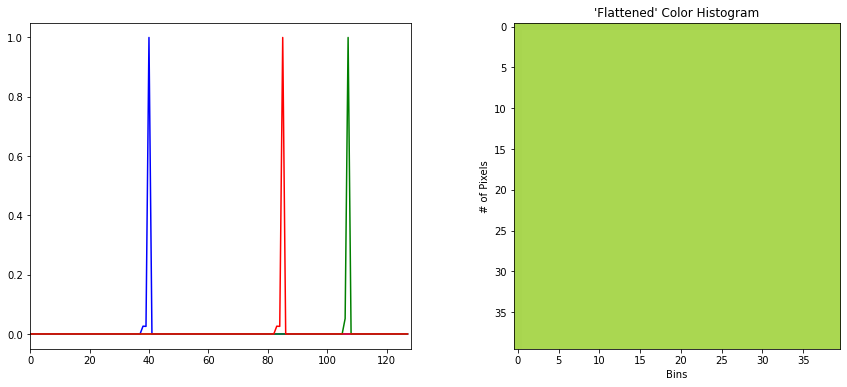

<Figure size 432x288 with 0 Axes>

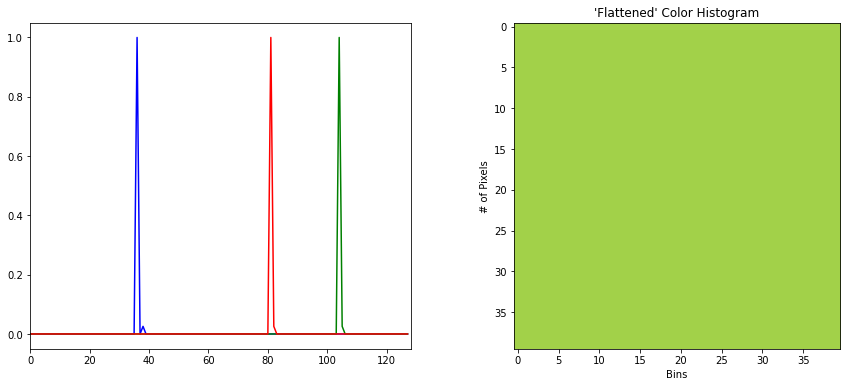

<Figure size 432x288 with 0 Axes>

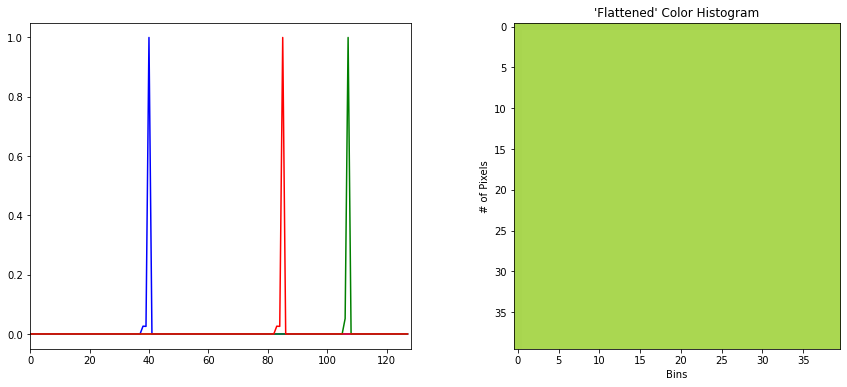

<Figure size 432x288 with 0 Axes>

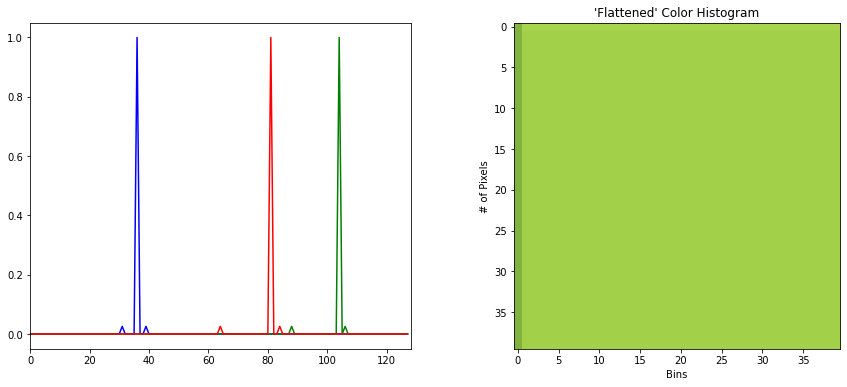

<Figure size 432x288 with 0 Axes>

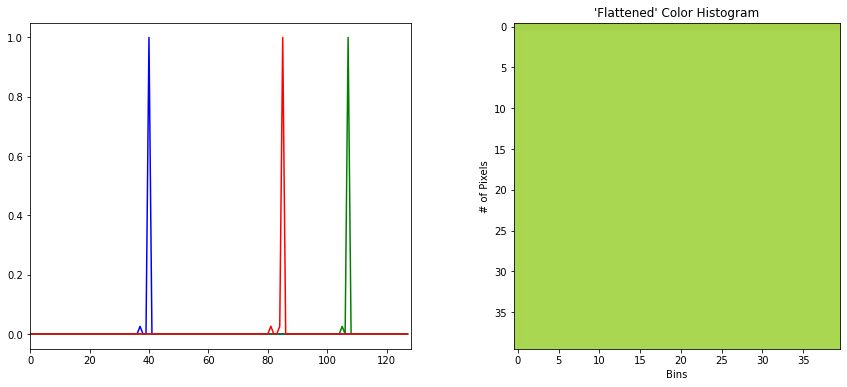

<Figure size 432x288 with 0 Axes>

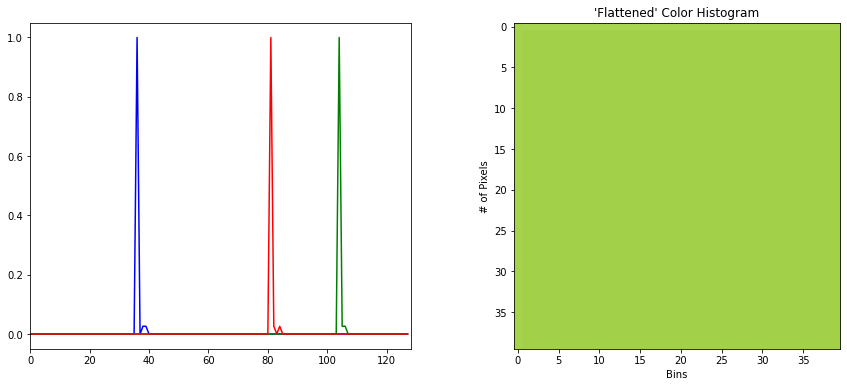

<Figure size 432x288 with 0 Axes>

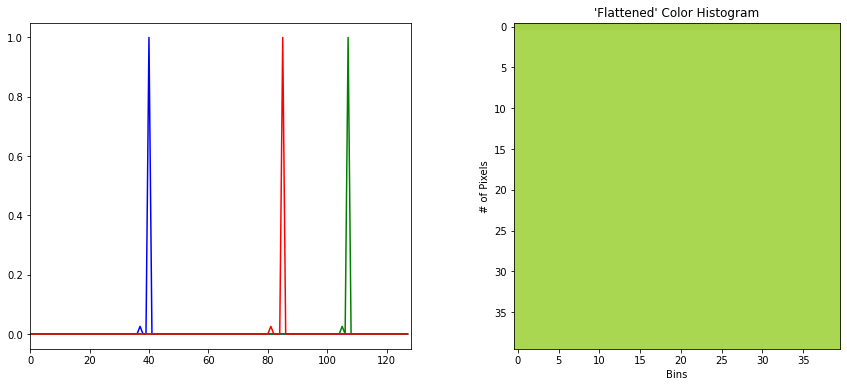

<Figure size 432x288 with 0 Axes>

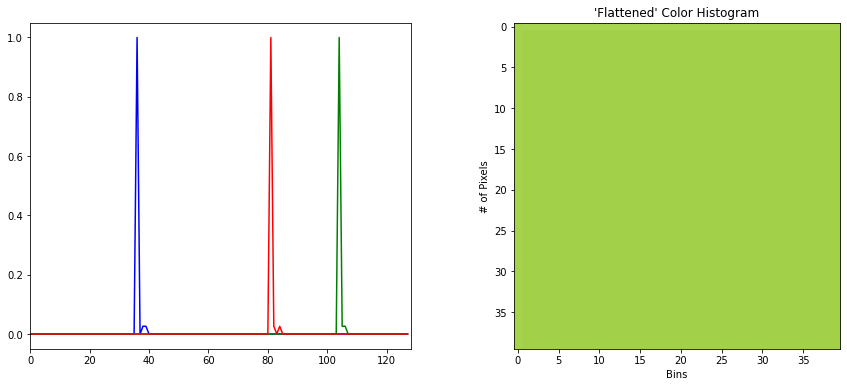

<Figure size 432x288 with 0 Axes>

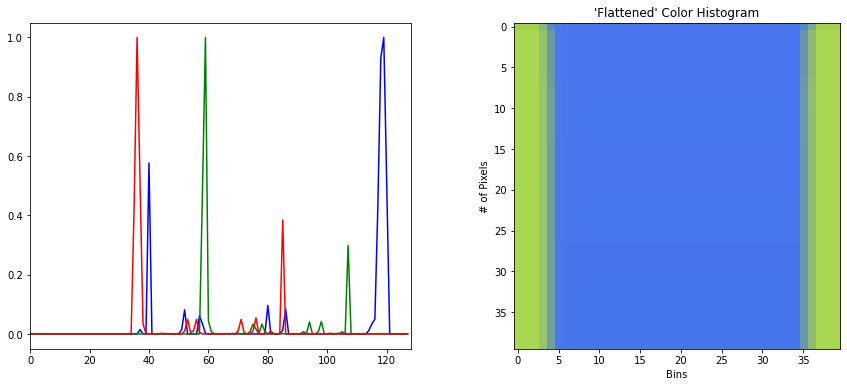

<Figure size 432x288 with 0 Axes>

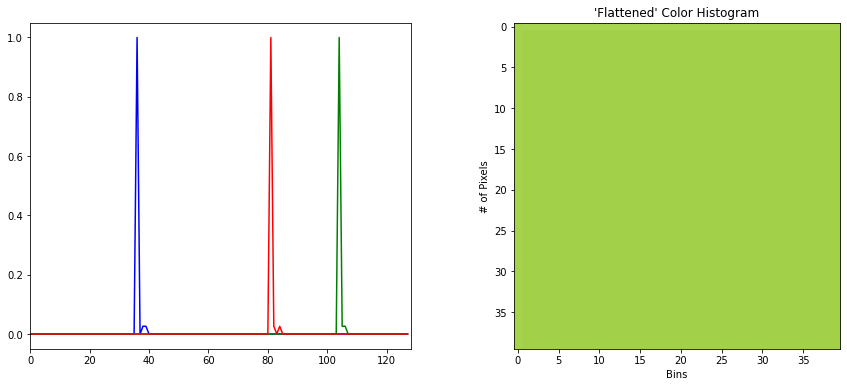

<Figure size 432x288 with 0 Axes>

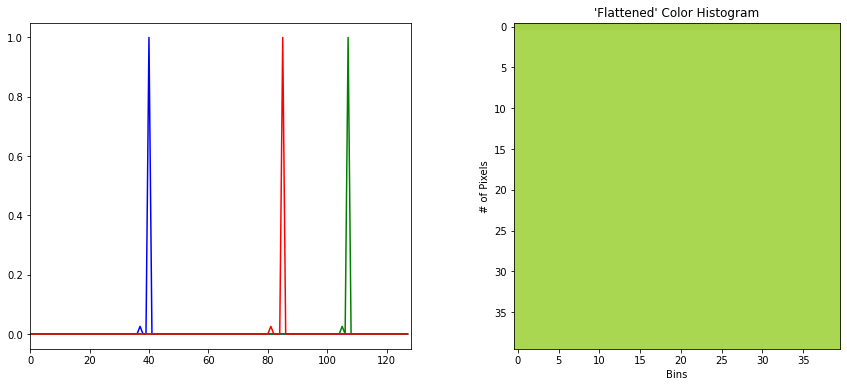

<Figure size 432x288 with 0 Axes>

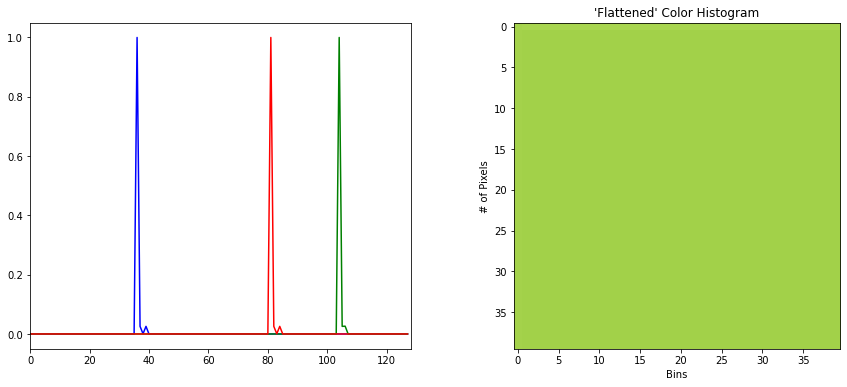

<Figure size 432x288 with 0 Axes>

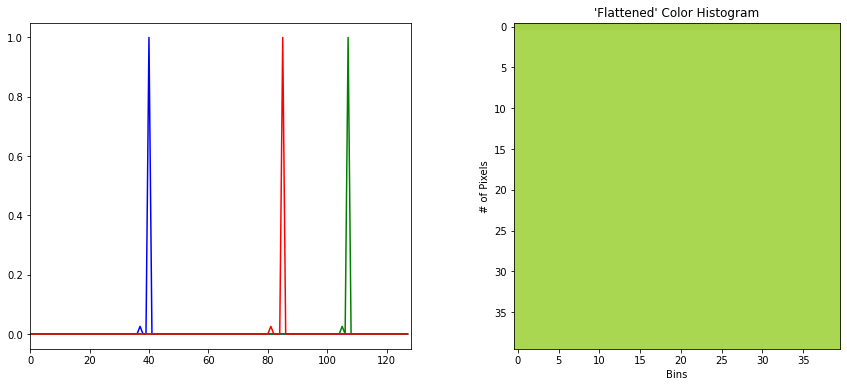

<Figure size 432x288 with 0 Axes>

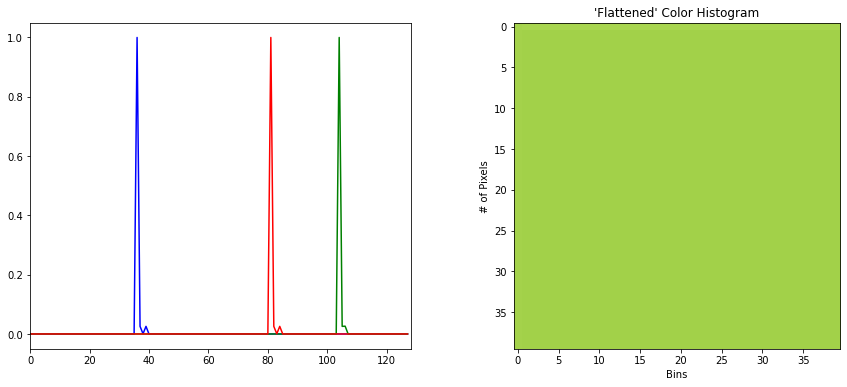

<Figure size 432x288 with 0 Axes>

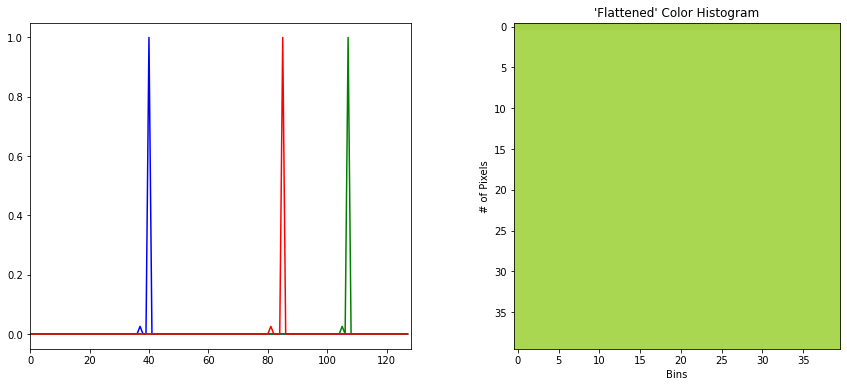

<Figure size 432x288 with 0 Axes>

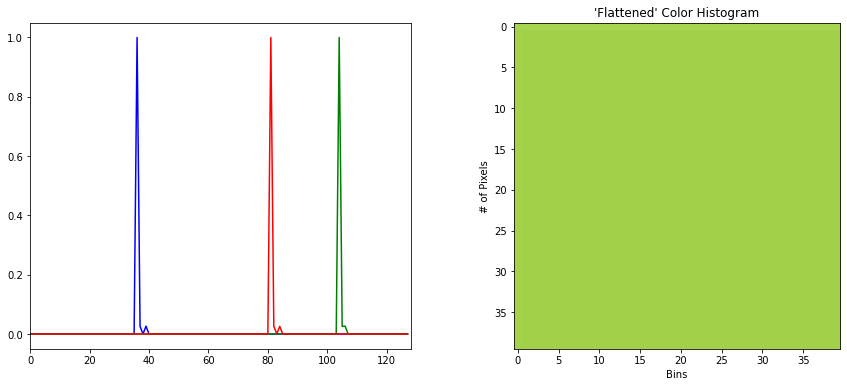

<Figure size 432x288 with 0 Axes>

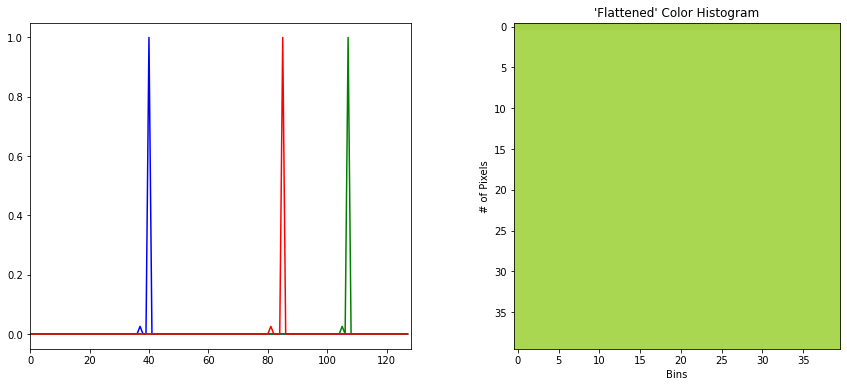

<Figure size 432x288 with 0 Axes>

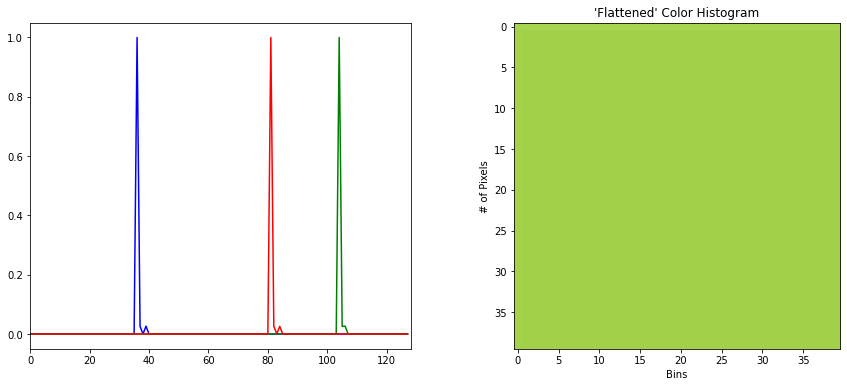

<Figure size 432x288 with 0 Axes>

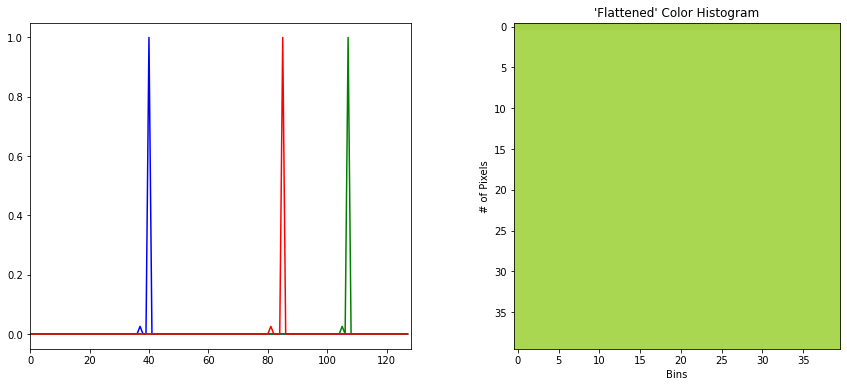

<Figure size 432x288 with 0 Axes>

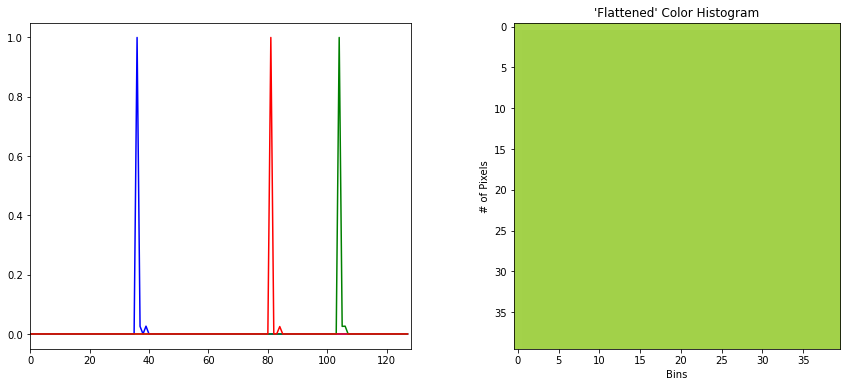

<Figure size 432x288 with 0 Axes>

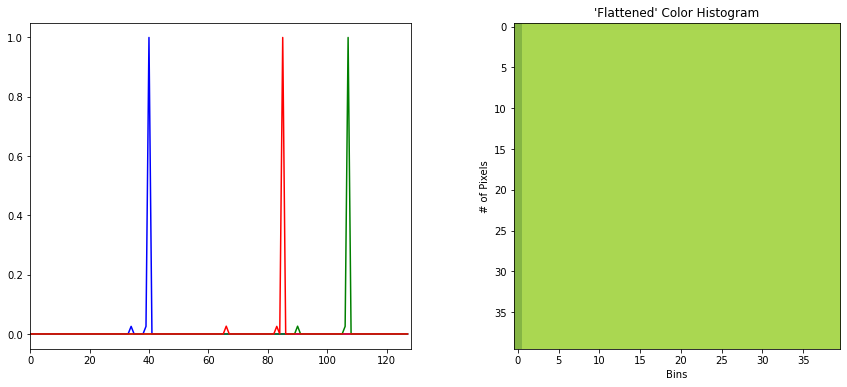

<Figure size 432x288 with 0 Axes>

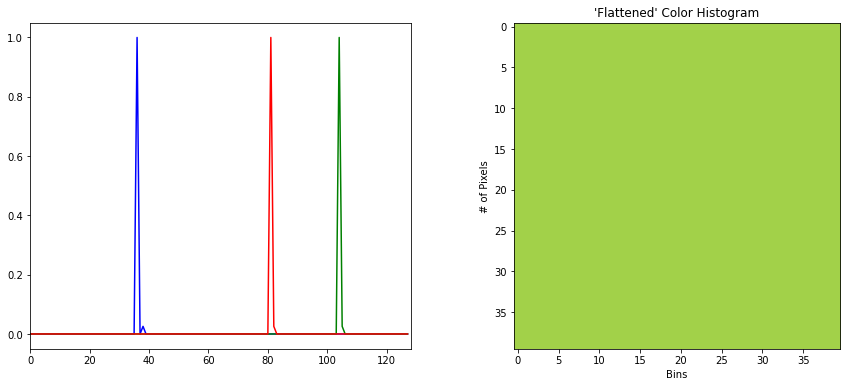

<Figure size 432x288 with 0 Axes>

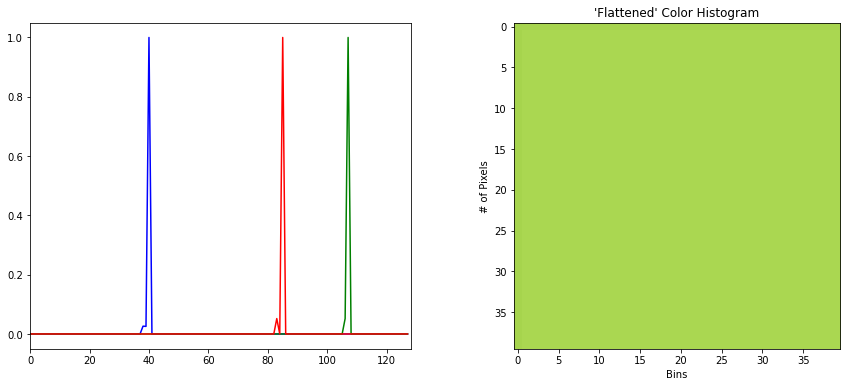

<Figure size 432x288 with 0 Axes>

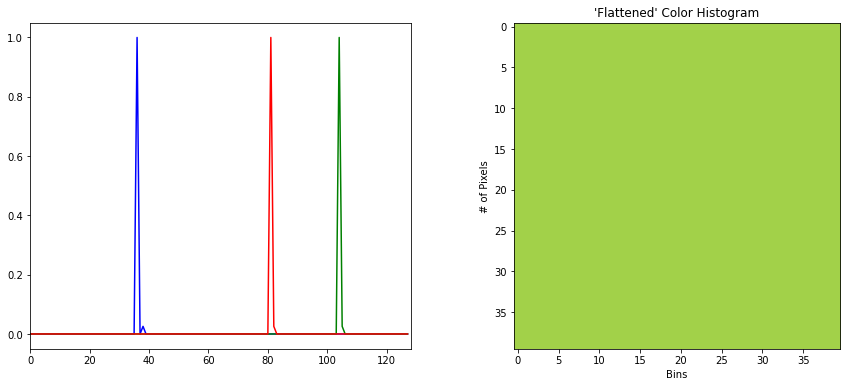

<Figure size 432x288 with 0 Axes>

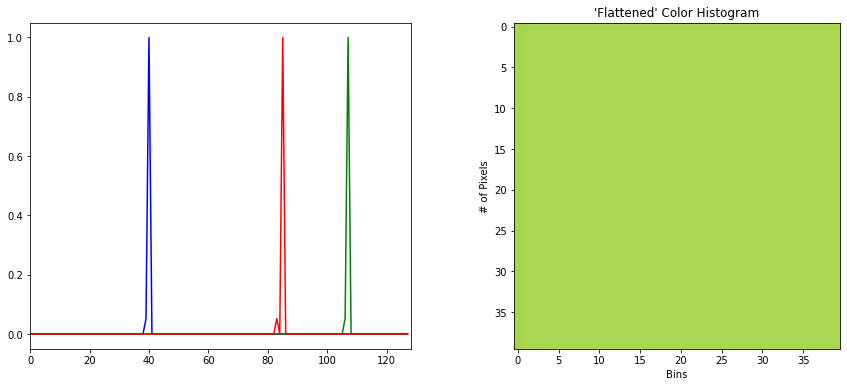

<Figure size 432x288 with 0 Axes>

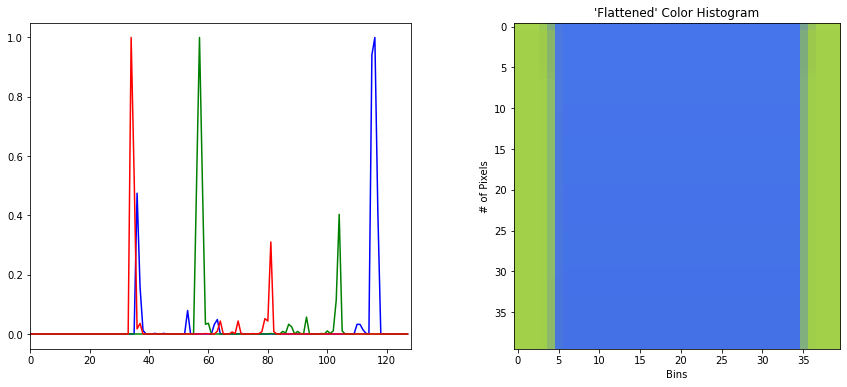

<Figure size 432x288 with 0 Axes>

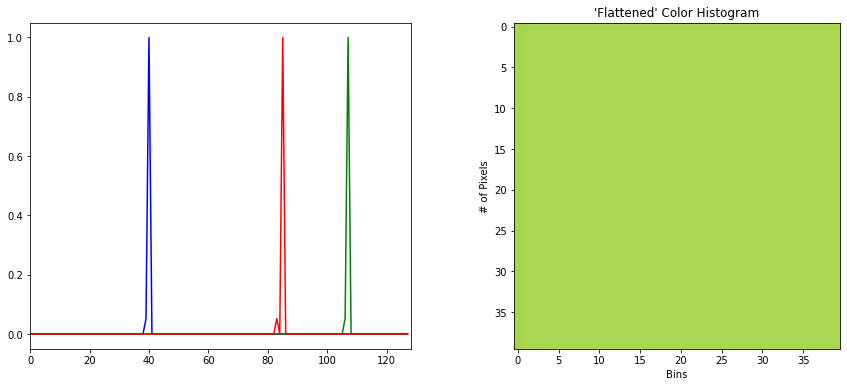

<Figure size 432x288 with 0 Axes>

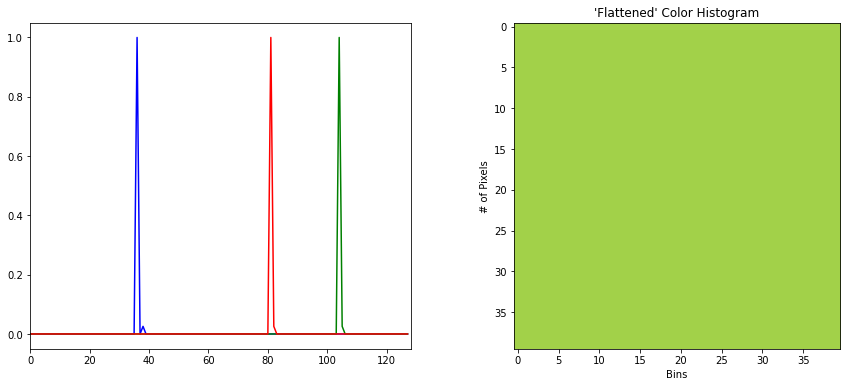

<Figure size 432x288 with 0 Axes>

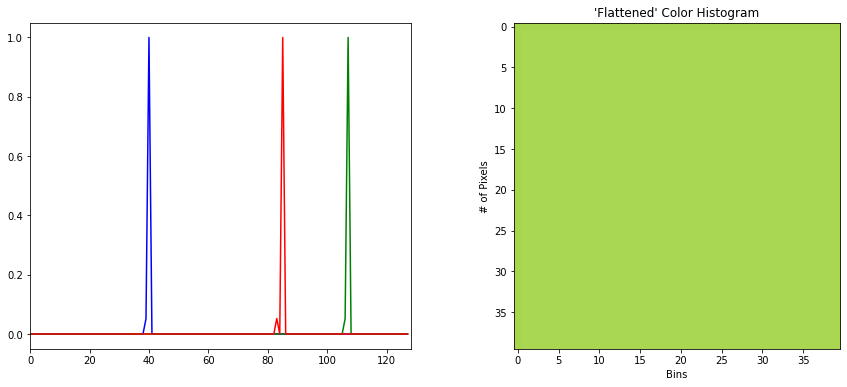

<Figure size 432x288 with 0 Axes>

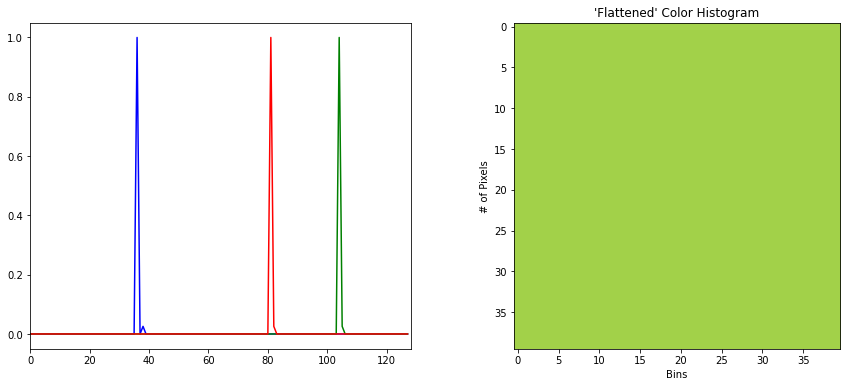

<Figure size 432x288 with 0 Axes>

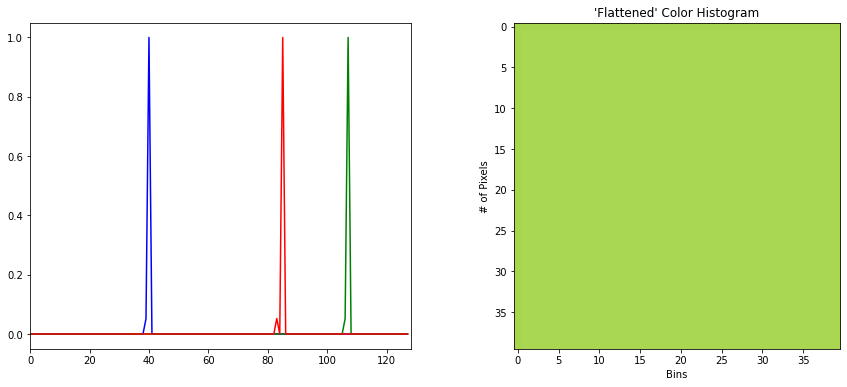

<Figure size 432x288 with 0 Axes>

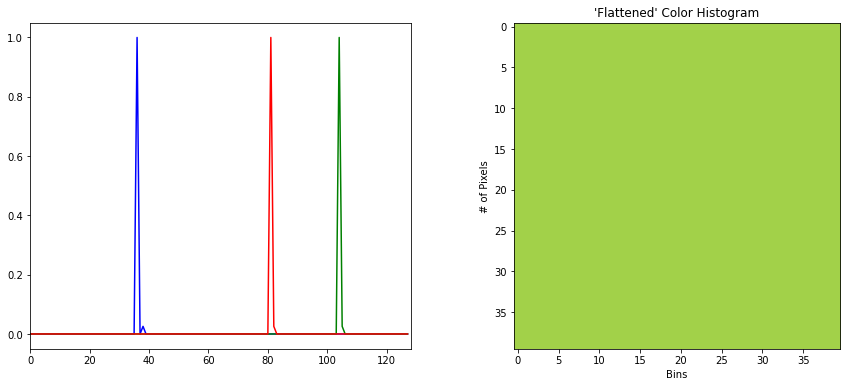

<Figure size 432x288 with 0 Axes>

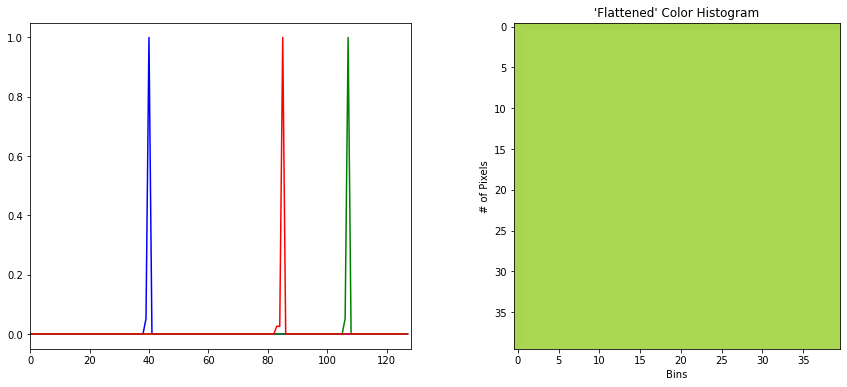

<Figure size 432x288 with 0 Axes>

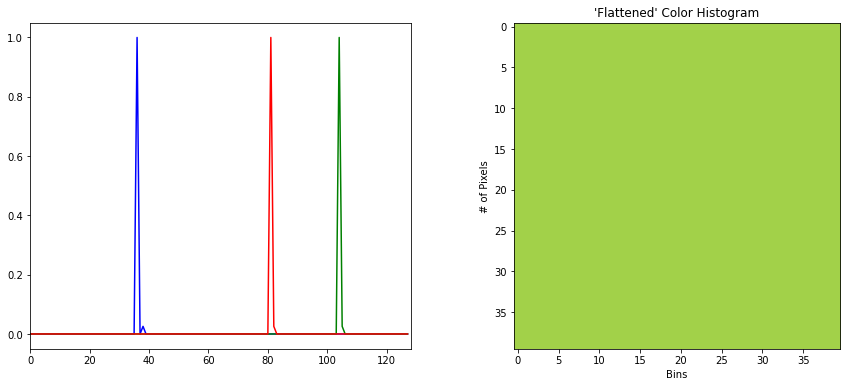

<Figure size 432x288 with 0 Axes>

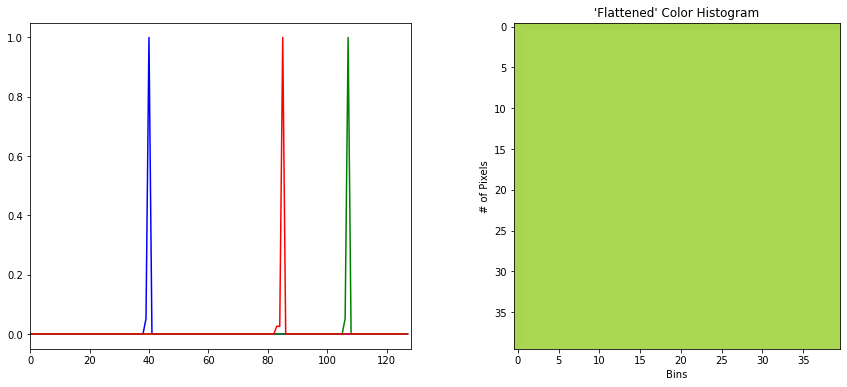

<Figure size 432x288 with 0 Axes>

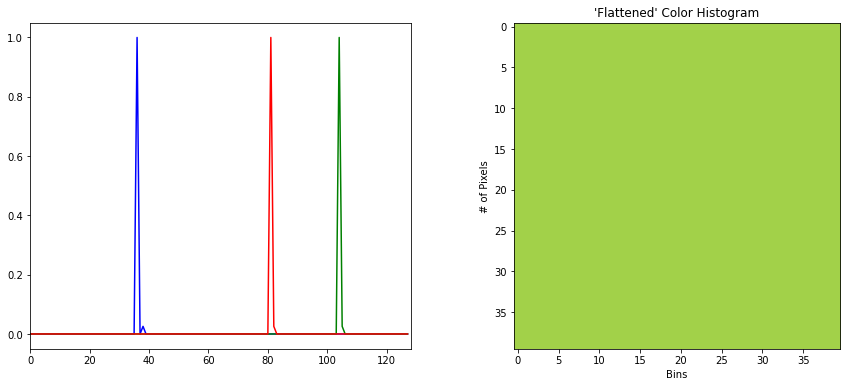

<Figure size 432x288 with 0 Axes>

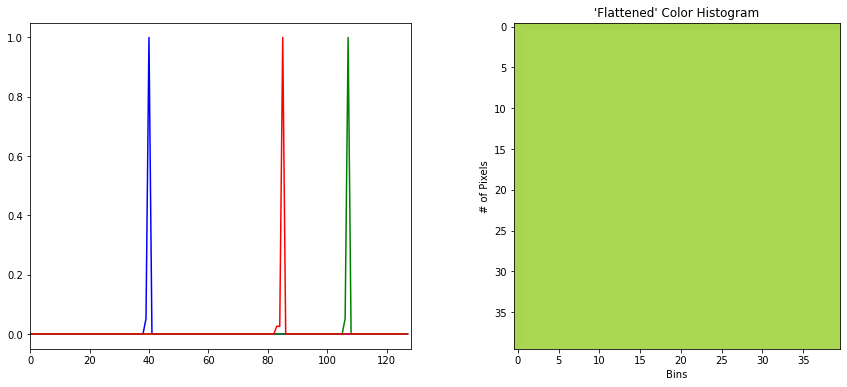

<Figure size 432x288 with 0 Axes>

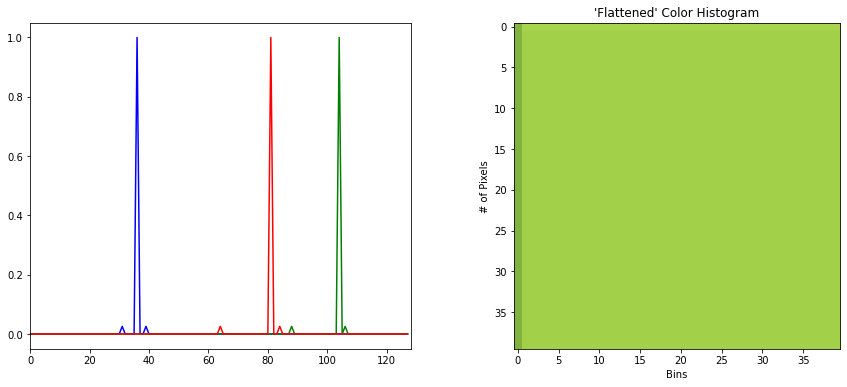

<Figure size 432x288 with 0 Axes>

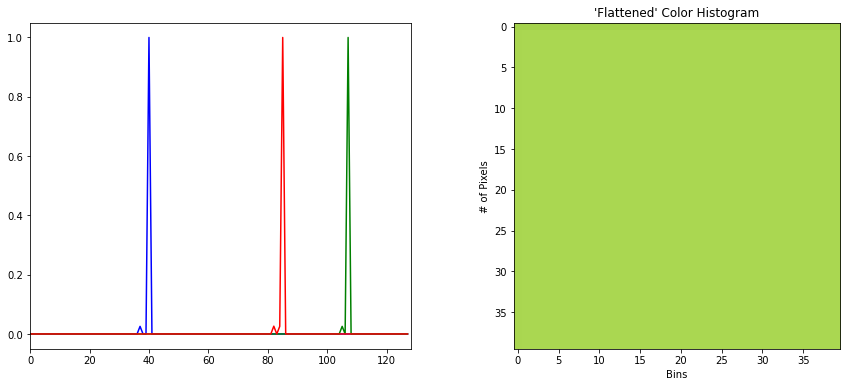

<Figure size 432x288 with 0 Axes>

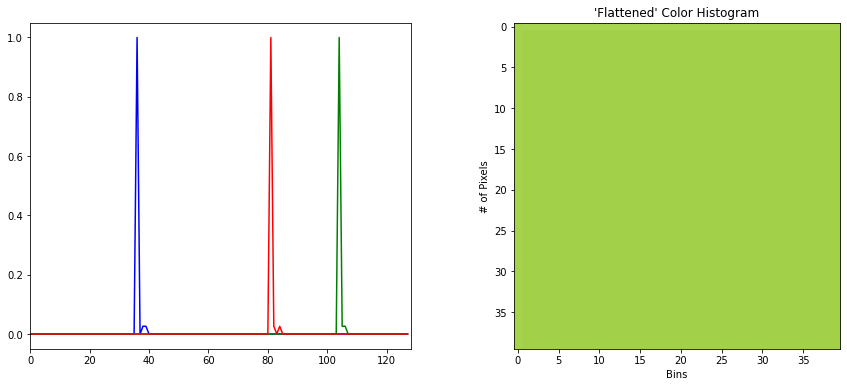

<Figure size 432x288 with 0 Axes>

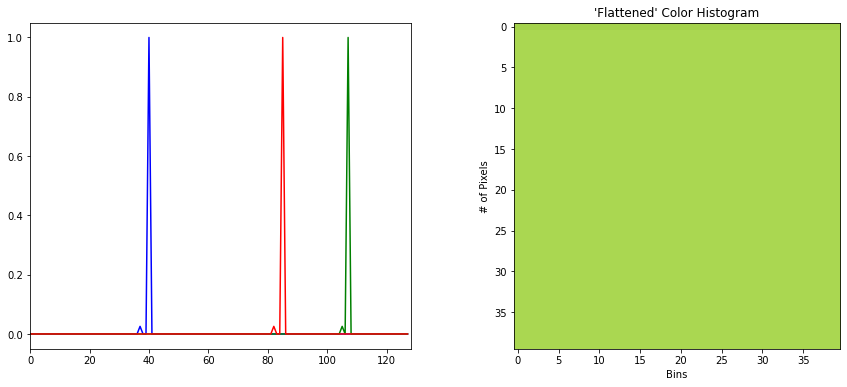

<Figure size 432x288 with 0 Axes>

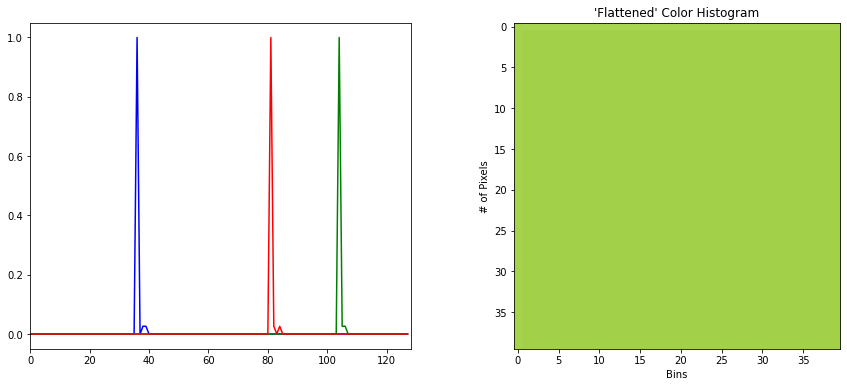

<Figure size 432x288 with 0 Axes>

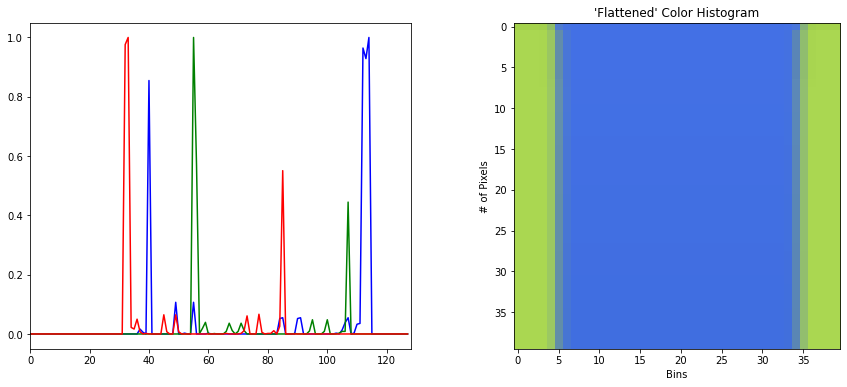

<Figure size 432x288 with 0 Axes>

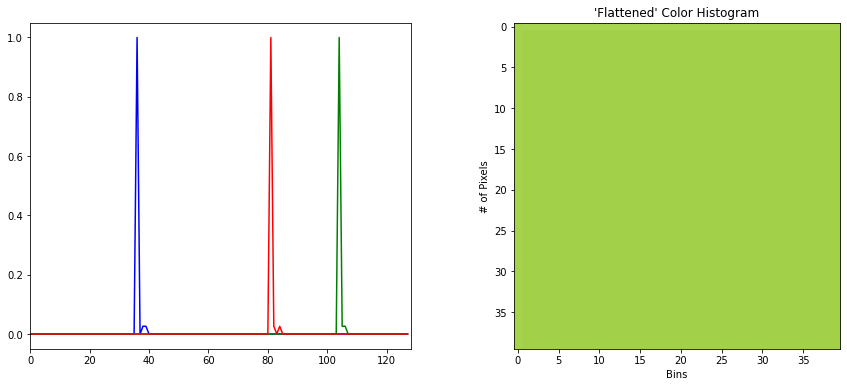

<Figure size 432x288 with 0 Axes>

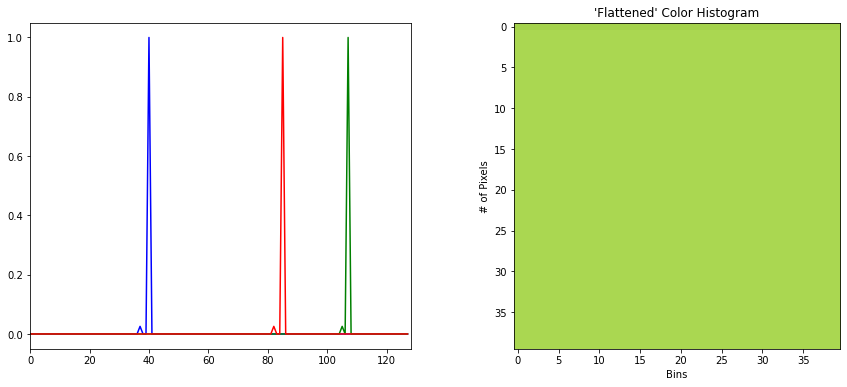

<Figure size 432x288 with 0 Axes>

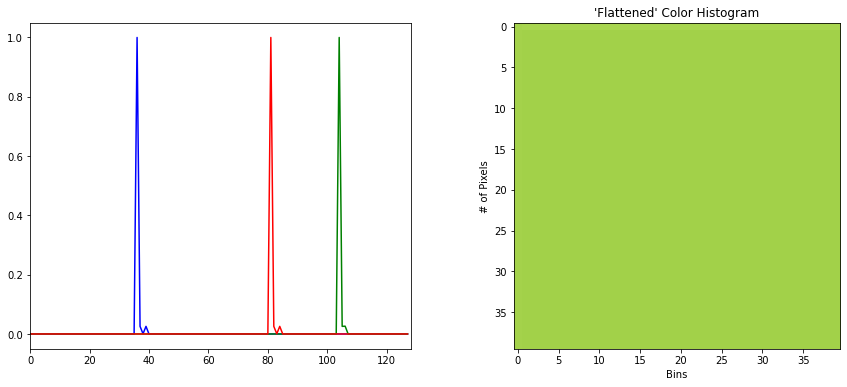

<Figure size 432x288 with 0 Axes>

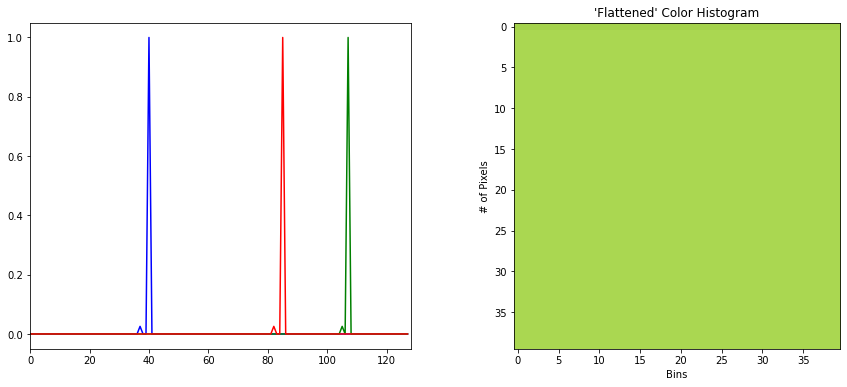

<Figure size 432x288 with 0 Axes>

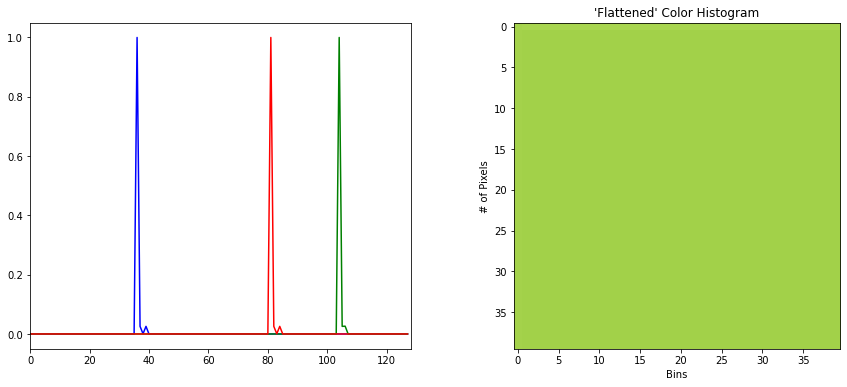

<Figure size 432x288 with 0 Axes>

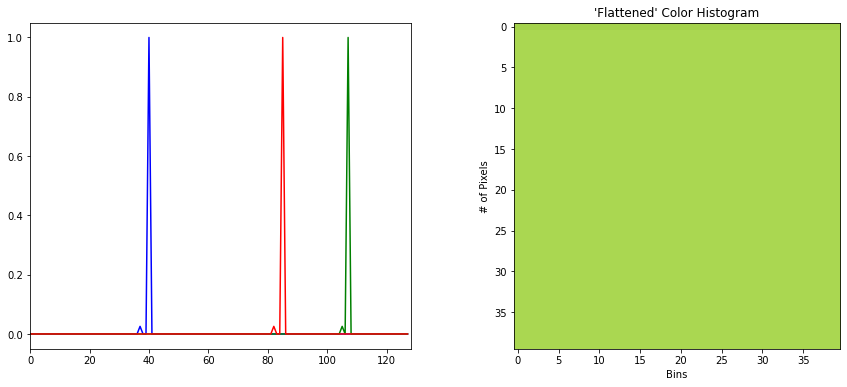

<Figure size 432x288 with 0 Axes>

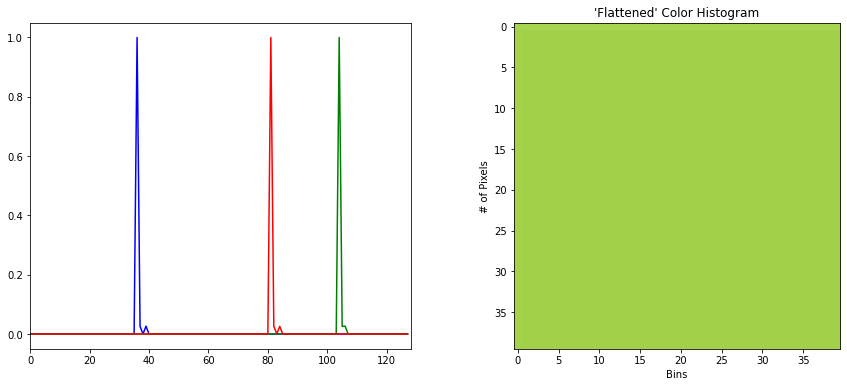

<Figure size 432x288 with 0 Axes>

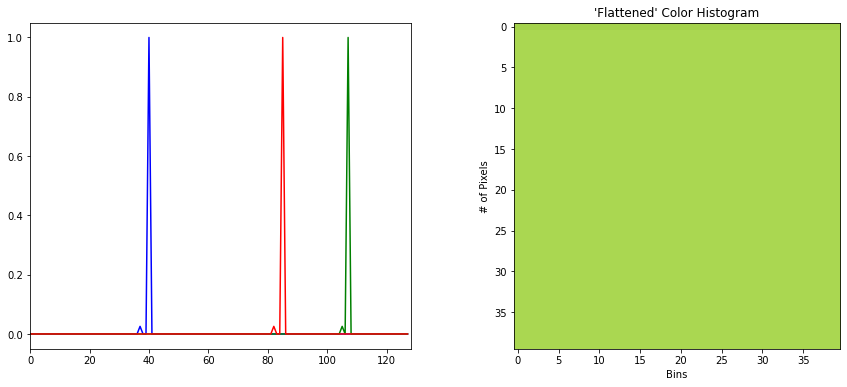

<Figure size 432x288 with 0 Axes>

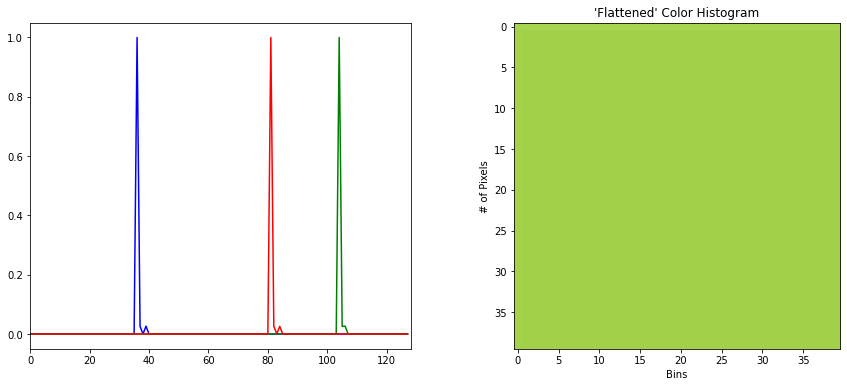

<Figure size 432x288 with 0 Axes>

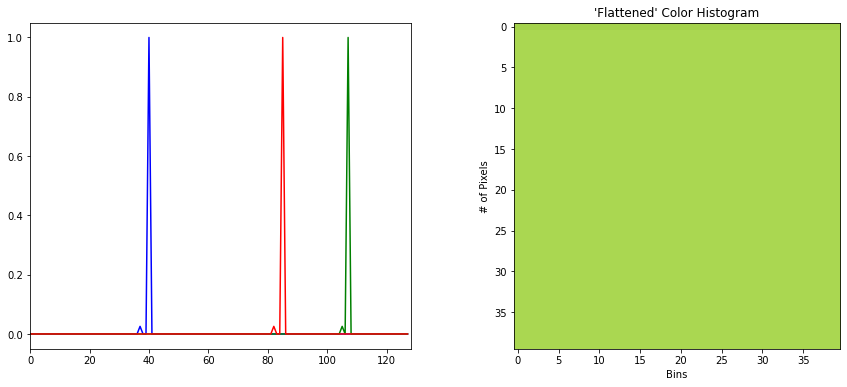

<Figure size 432x288 with 0 Axes>

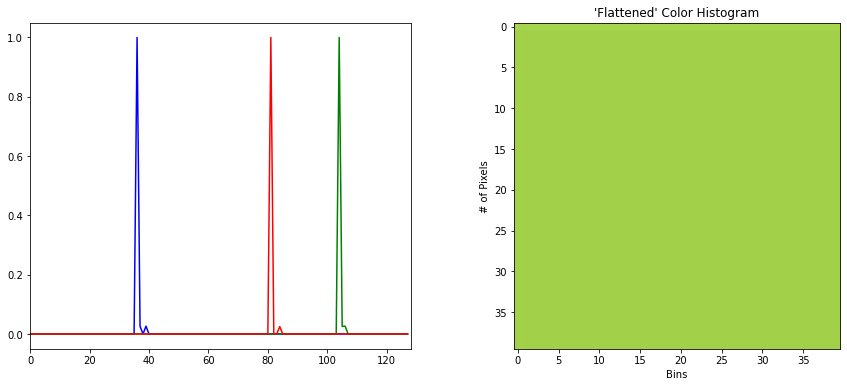

<Figure size 432x288 with 0 Axes>

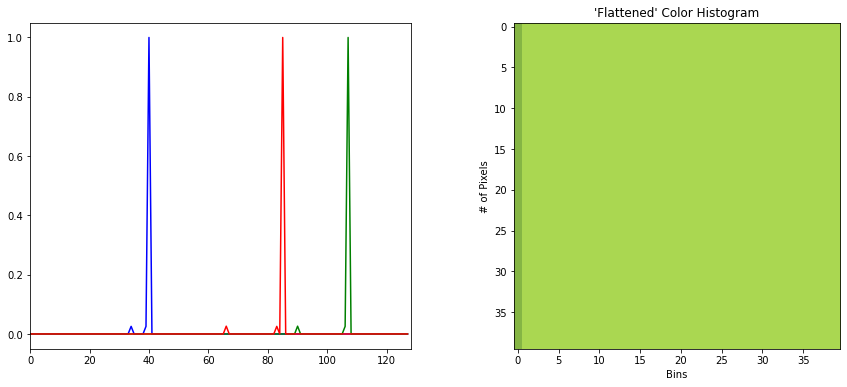

<Figure size 432x288 with 0 Axes>

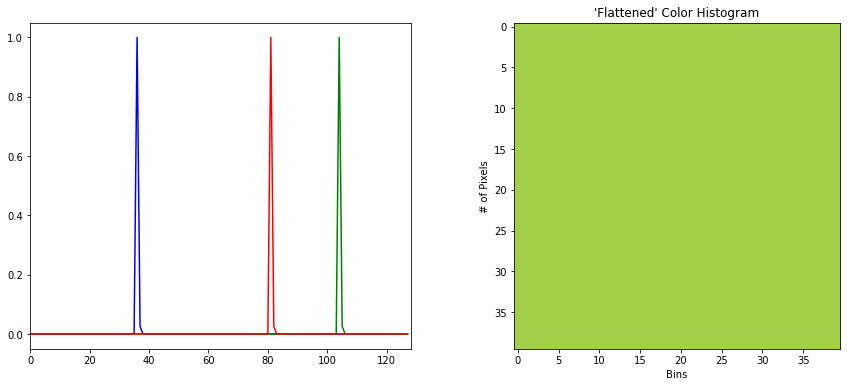

<Figure size 432x288 with 0 Axes>

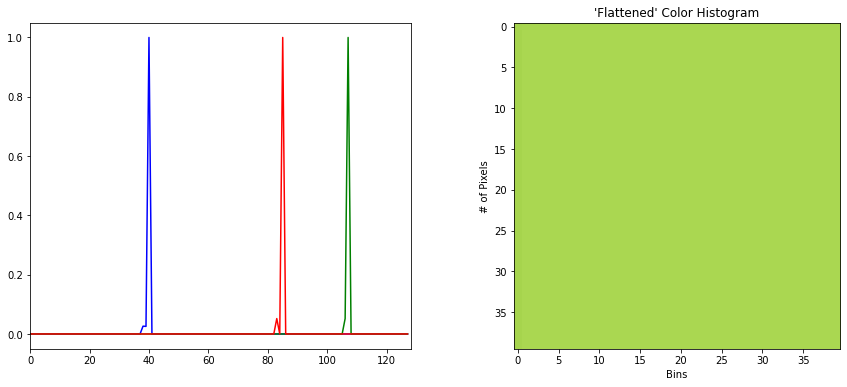

<Figure size 432x288 with 0 Axes>

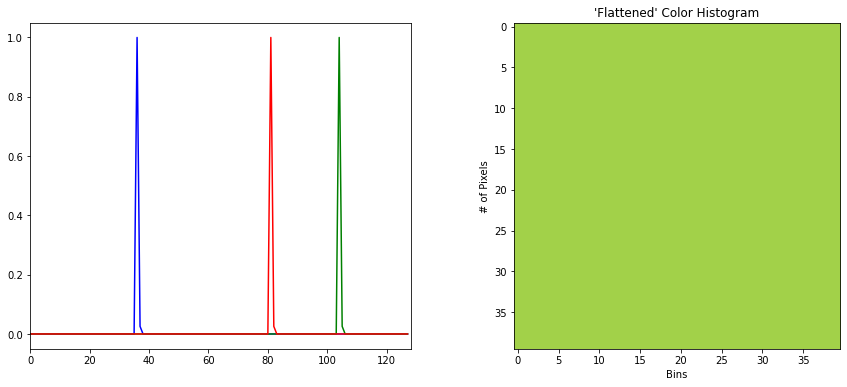

<Figure size 432x288 with 0 Axes>

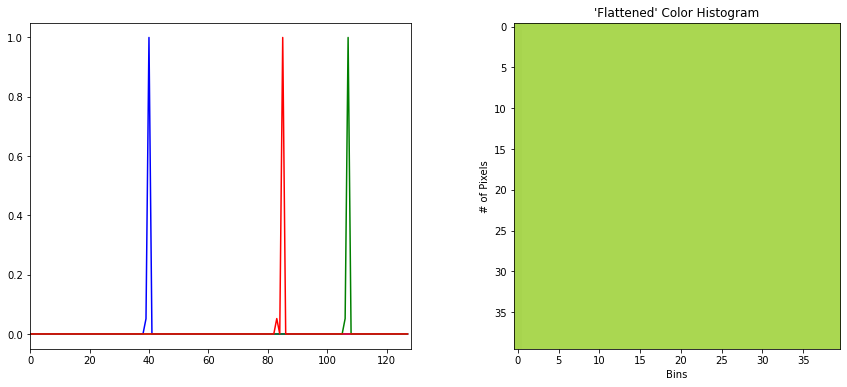

<Figure size 432x288 with 0 Axes>

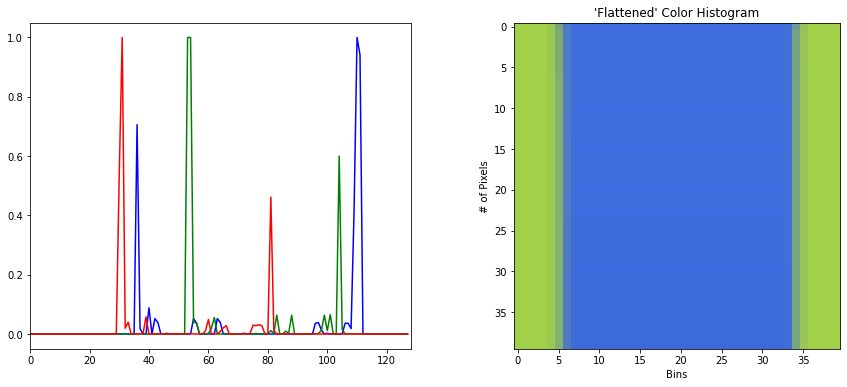

<Figure size 432x288 with 0 Axes>

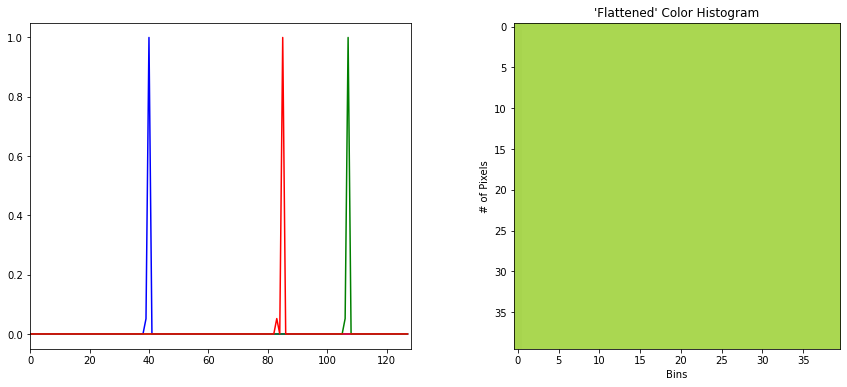

<Figure size 432x288 with 0 Axes>

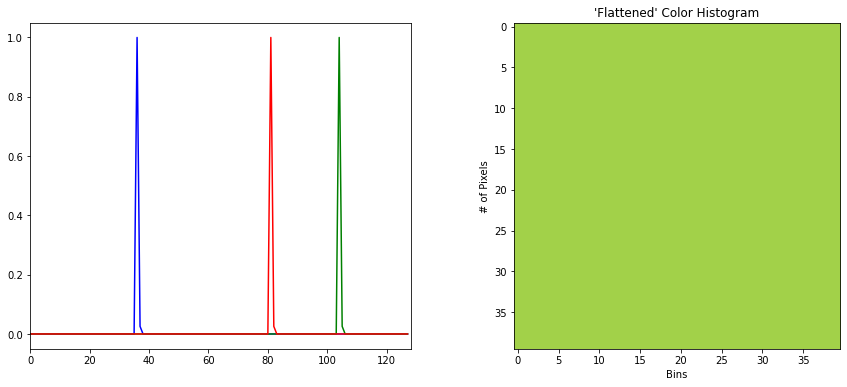

<Figure size 432x288 with 0 Axes>

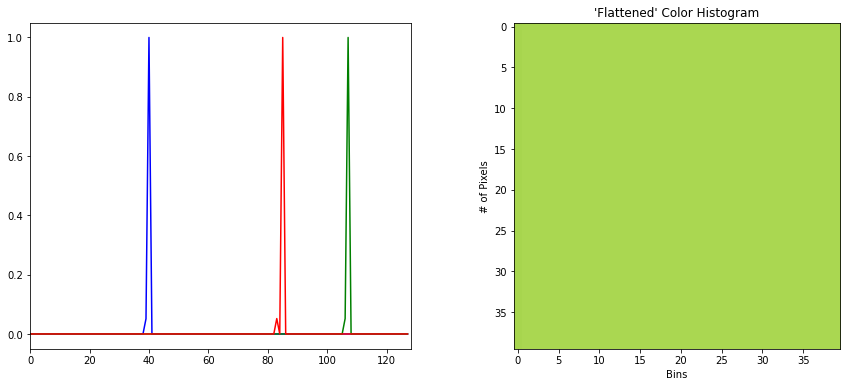

<Figure size 432x288 with 0 Axes>

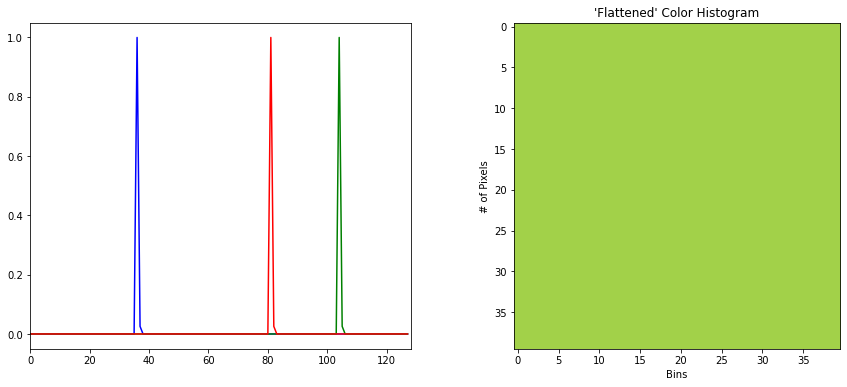

<Figure size 432x288 with 0 Axes>

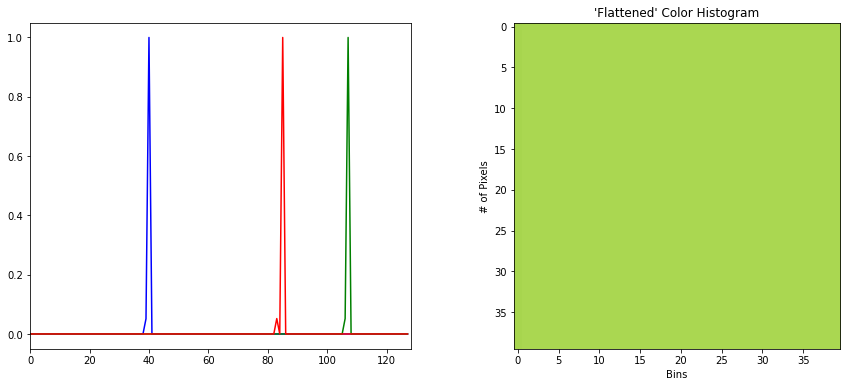

<Figure size 432x288 with 0 Axes>

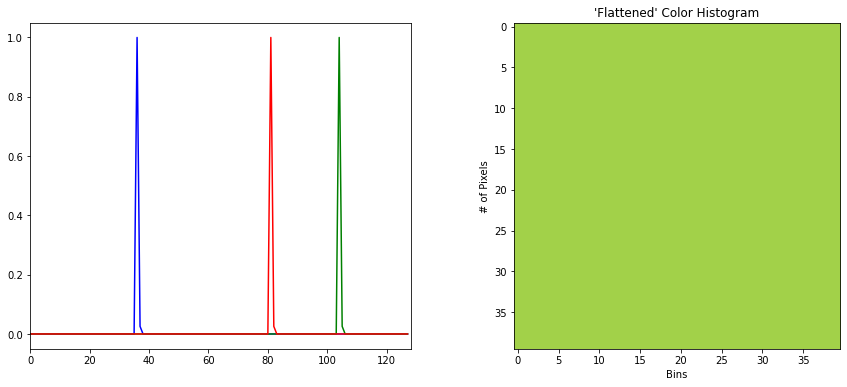

<Figure size 432x288 with 0 Axes>

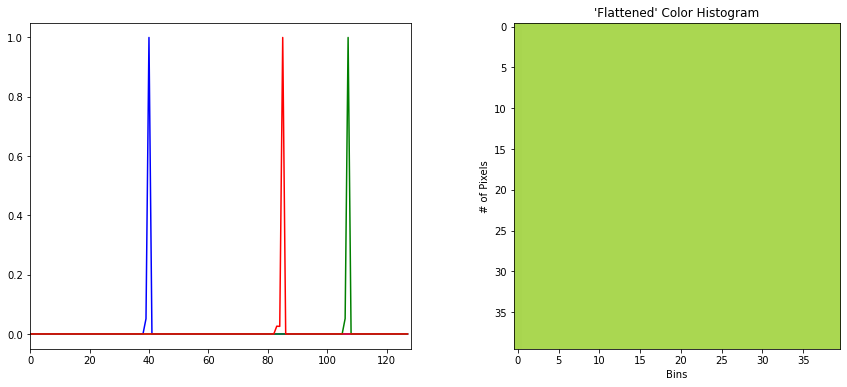

<Figure size 432x288 with 0 Axes>

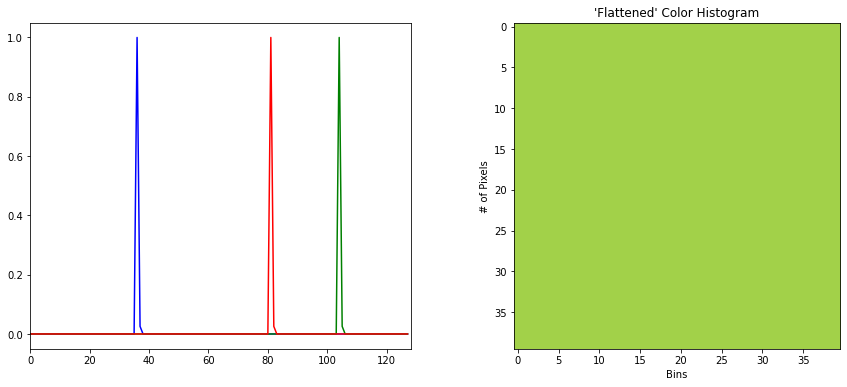

<Figure size 432x288 with 0 Axes>

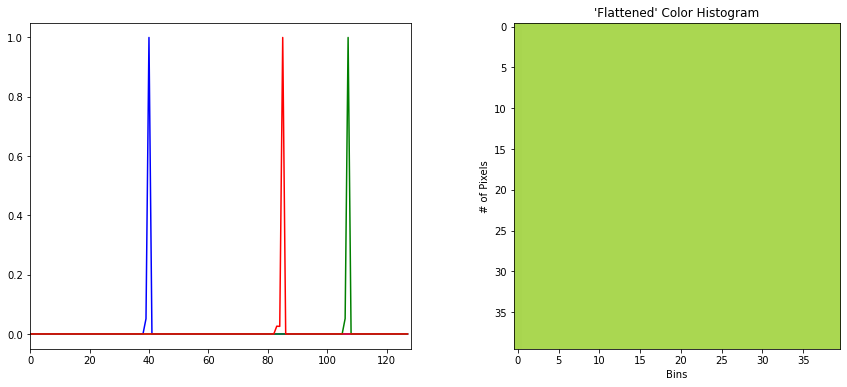

<Figure size 432x288 with 0 Axes>

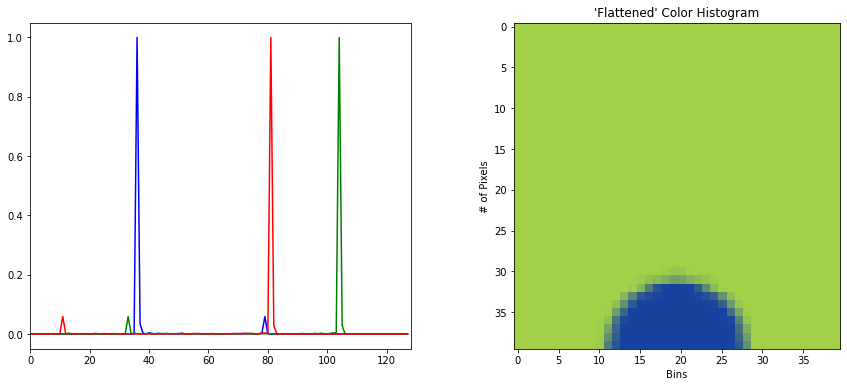

<Figure size 432x288 with 0 Axes>

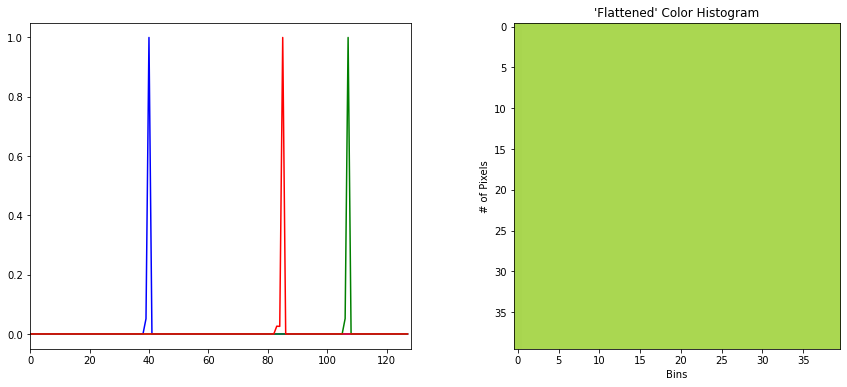

<Figure size 432x288 with 0 Axes>

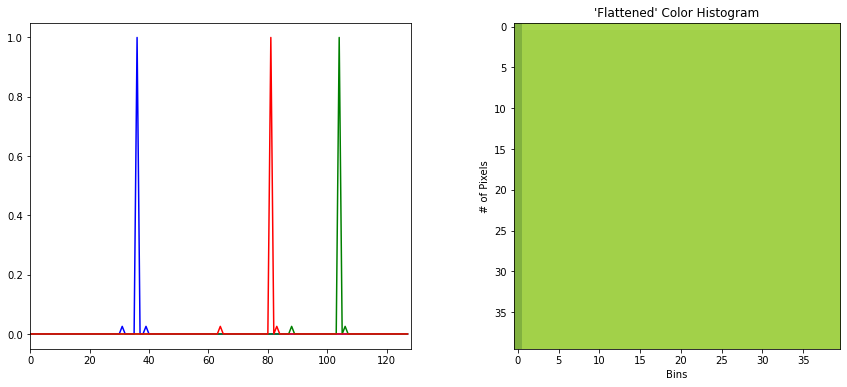

<Figure size 432x288 with 0 Axes>

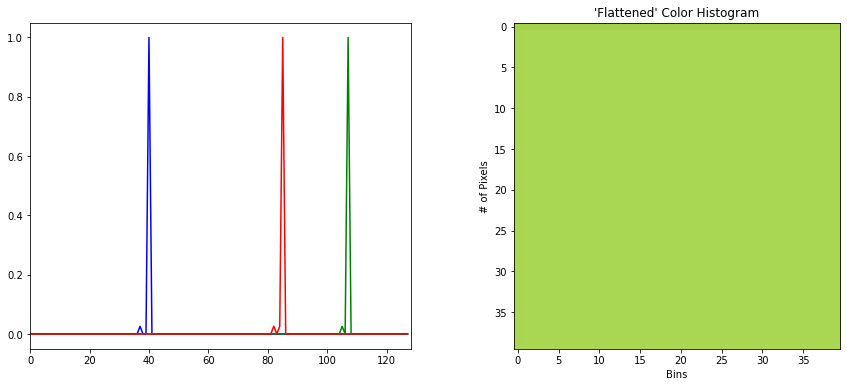

<Figure size 432x288 with 0 Axes>

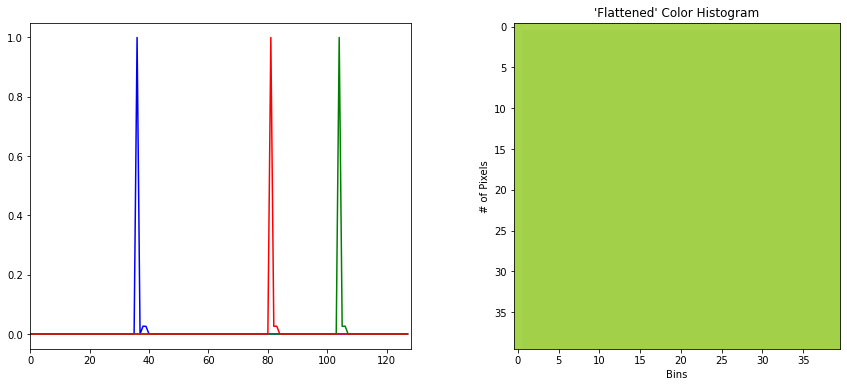

<Figure size 432x288 with 0 Axes>

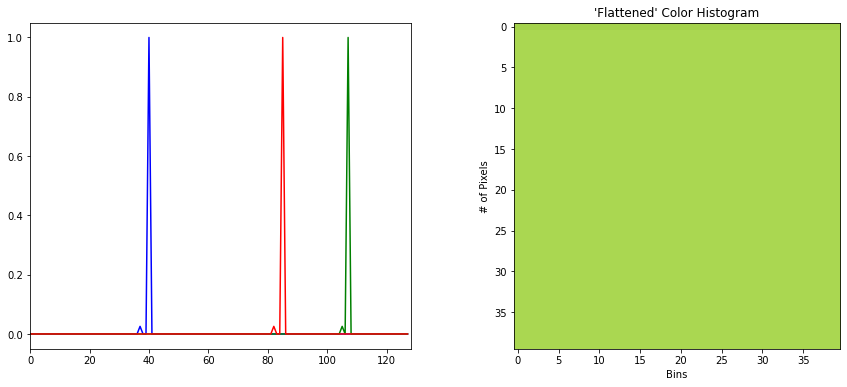

<Figure size 432x288 with 0 Axes>

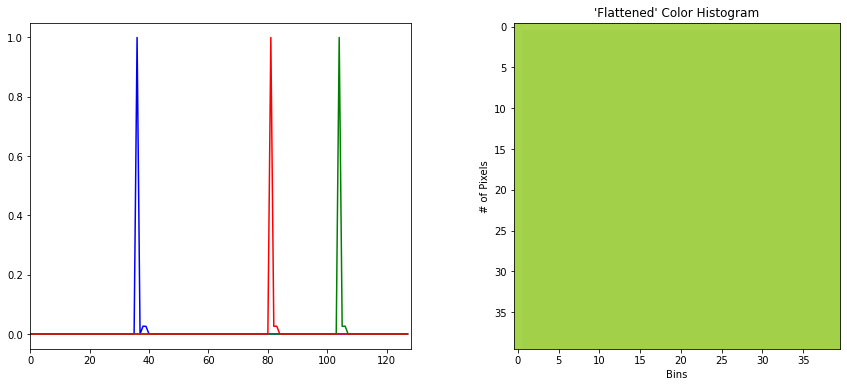

<Figure size 432x288 with 0 Axes>

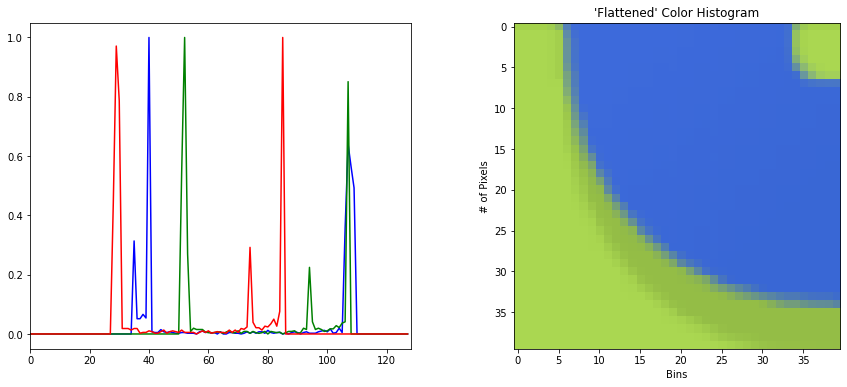

<Figure size 432x288 with 0 Axes>

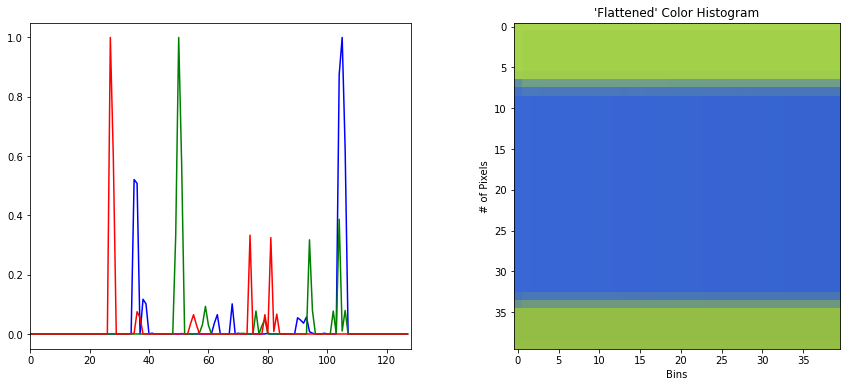

<Figure size 432x288 with 0 Axes>

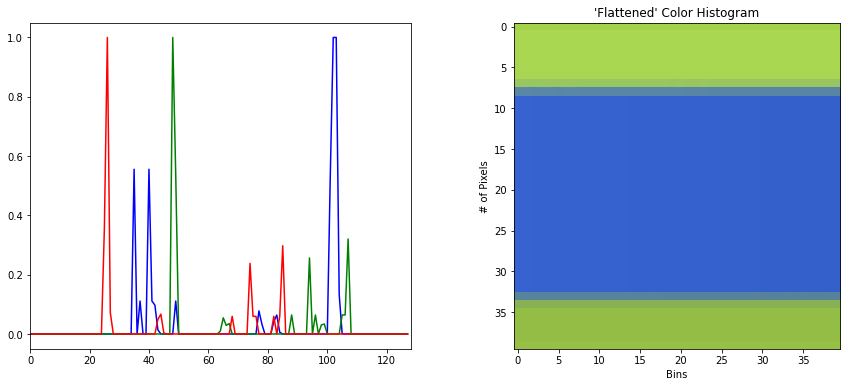

<Figure size 432x288 with 0 Axes>

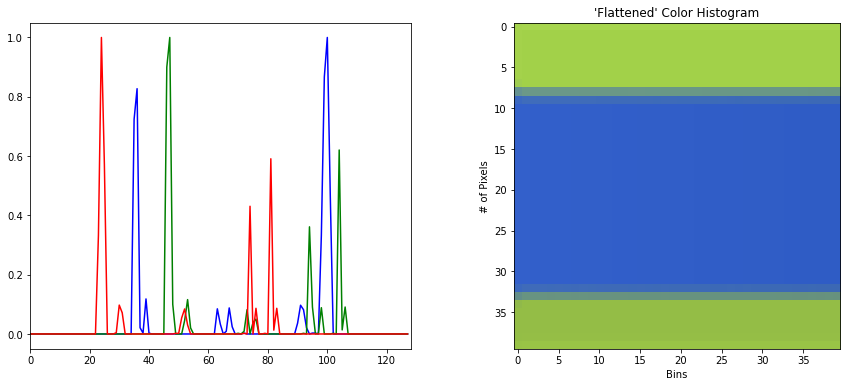

<Figure size 432x288 with 0 Axes>

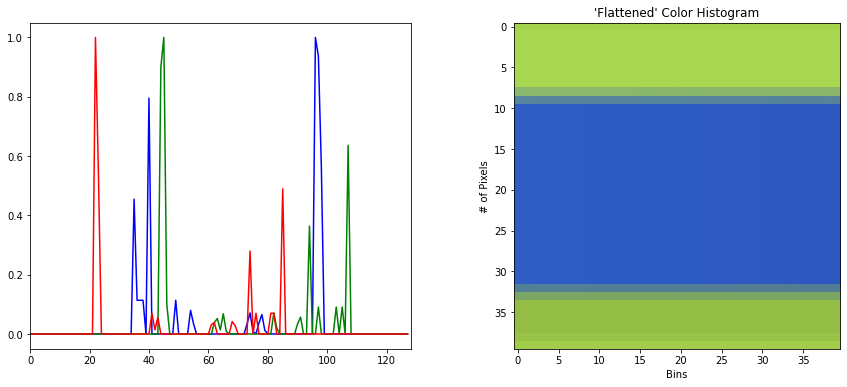

<Figure size 432x288 with 0 Axes>

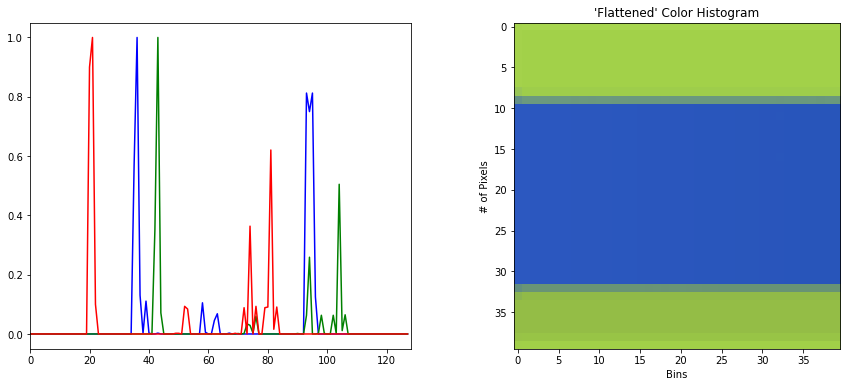

<Figure size 432x288 with 0 Axes>

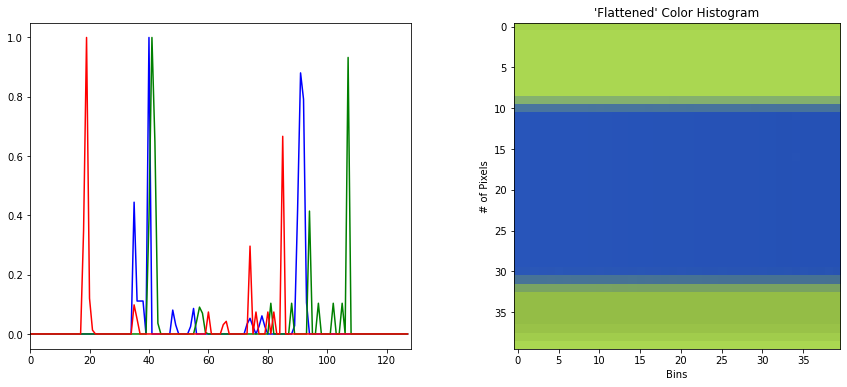

<Figure size 432x288 with 0 Axes>

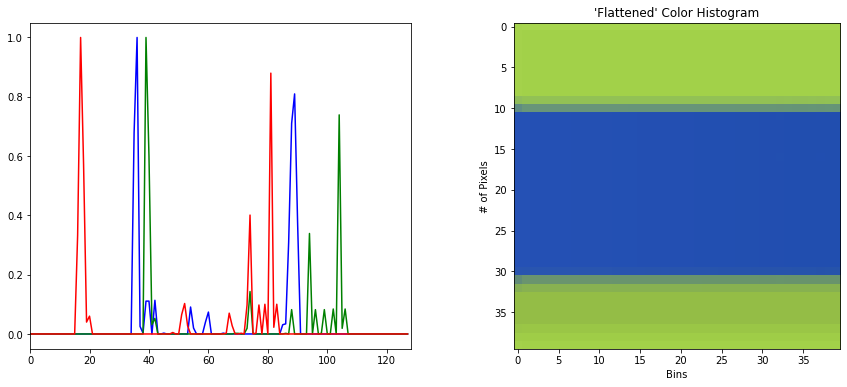

<Figure size 432x288 with 0 Axes>

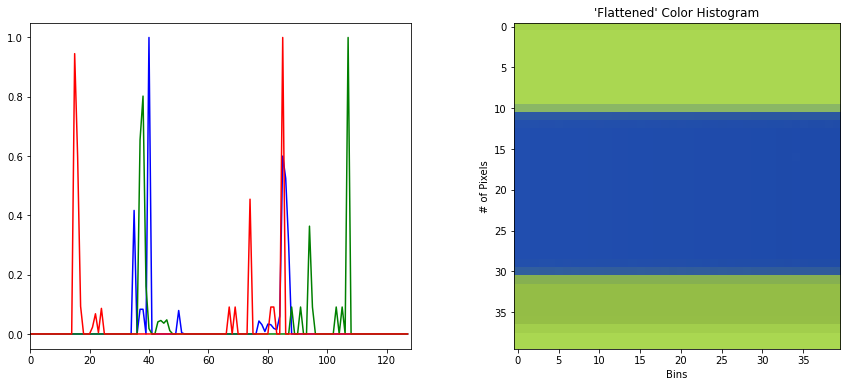

<Figure size 432x288 with 0 Axes>

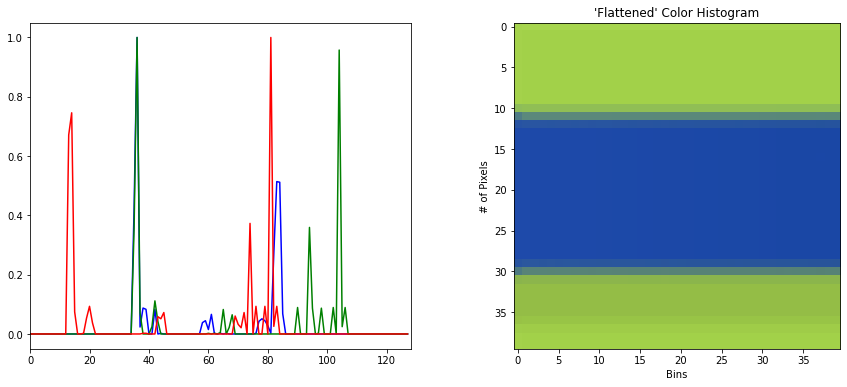

<Figure size 432x288 with 0 Axes>

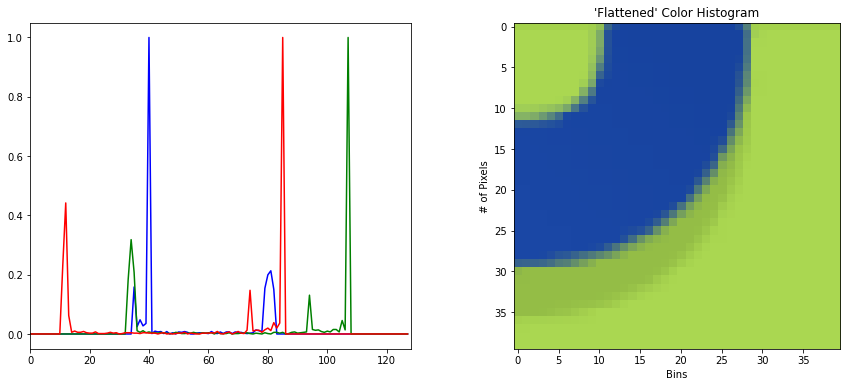

<Figure size 432x288 with 0 Axes>

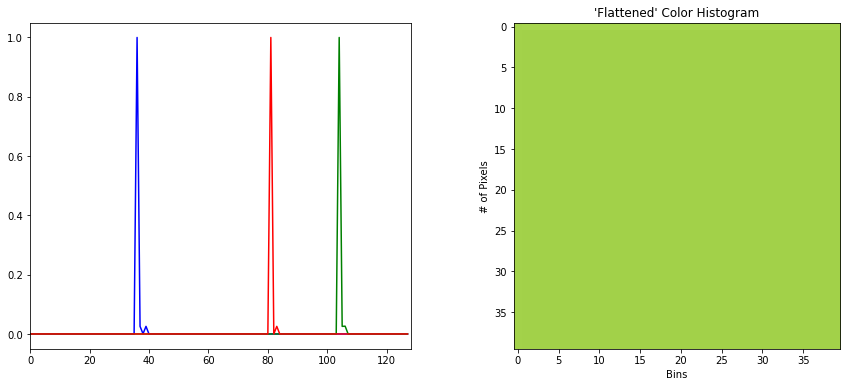

<Figure size 432x288 with 0 Axes>

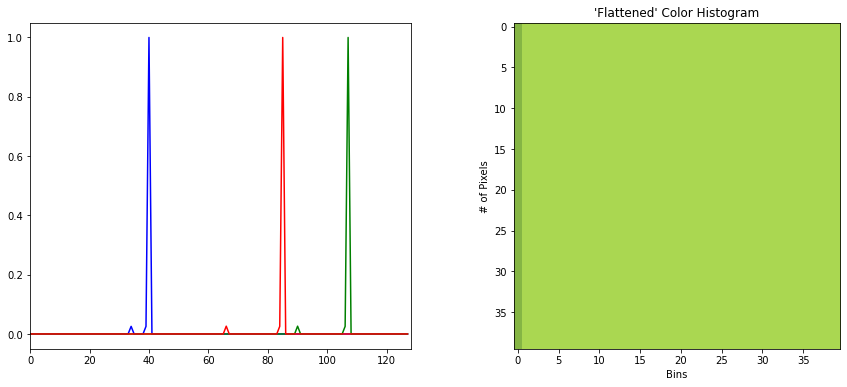

<Figure size 432x288 with 0 Axes>

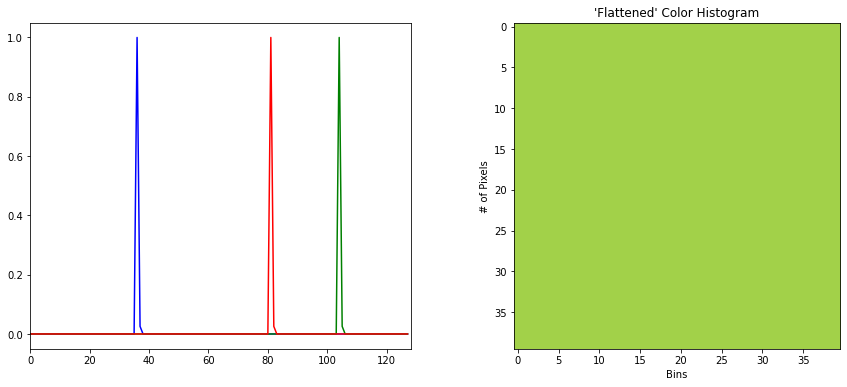

<Figure size 432x288 with 0 Axes>

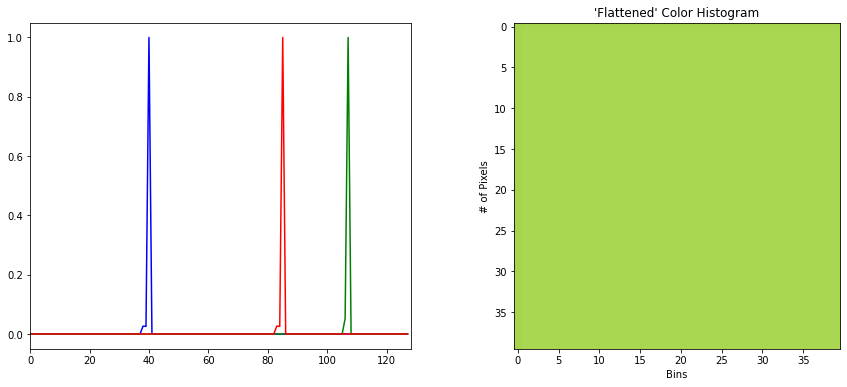

<Figure size 432x288 with 0 Axes>

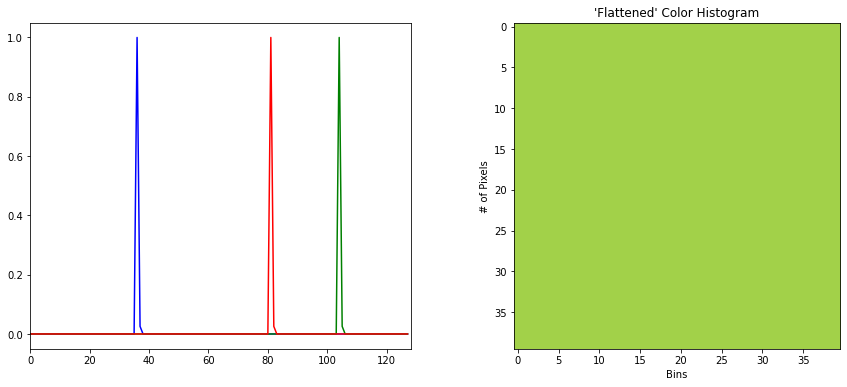

<Figure size 432x288 with 0 Axes>

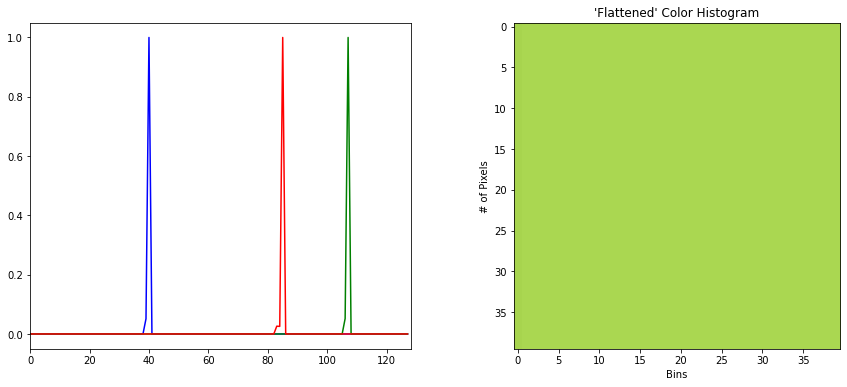

<Figure size 432x288 with 0 Axes>

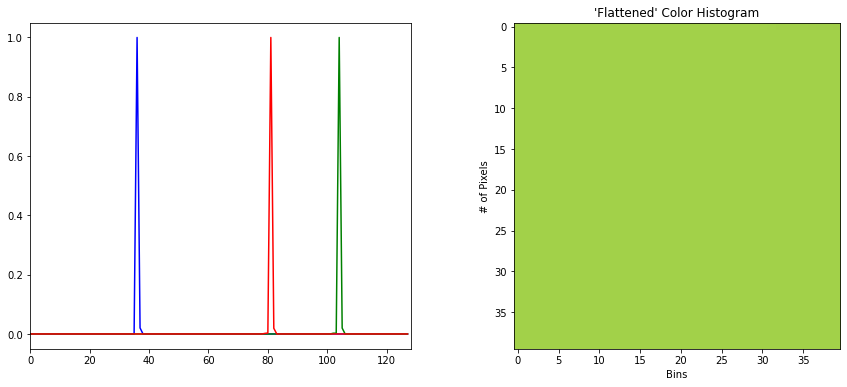

<Figure size 432x288 with 0 Axes>

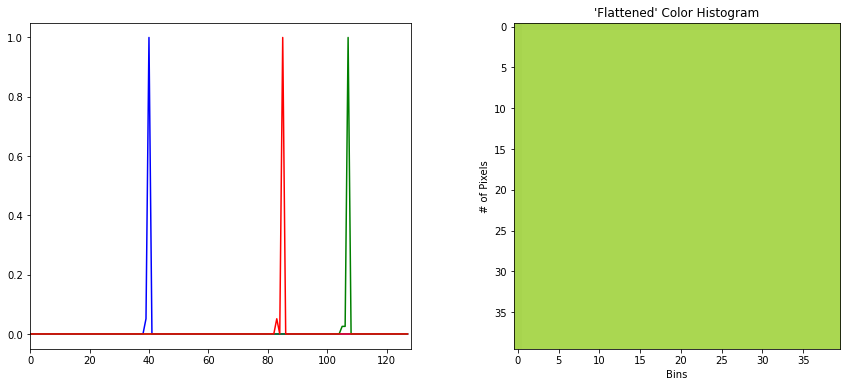

<Figure size 432x288 with 0 Axes>

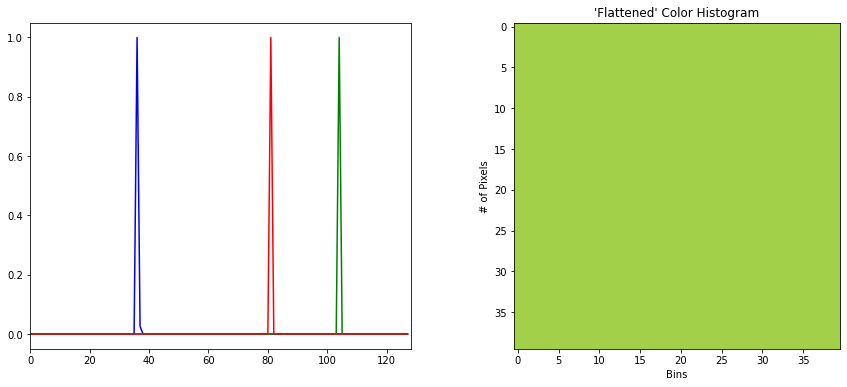

<Figure size 432x288 with 0 Axes>

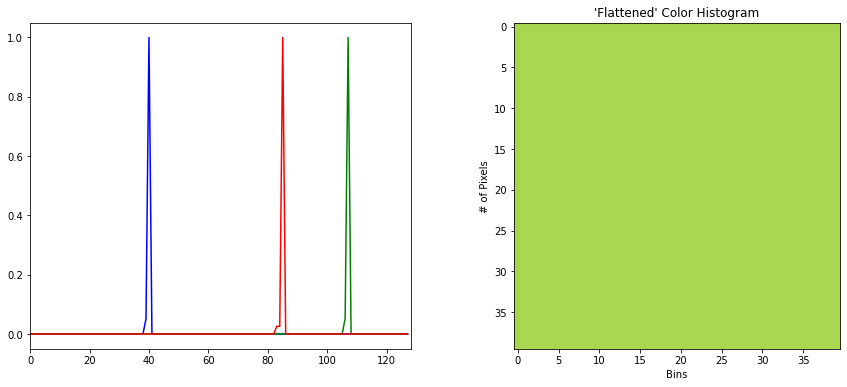

<Figure size 432x288 with 0 Axes>

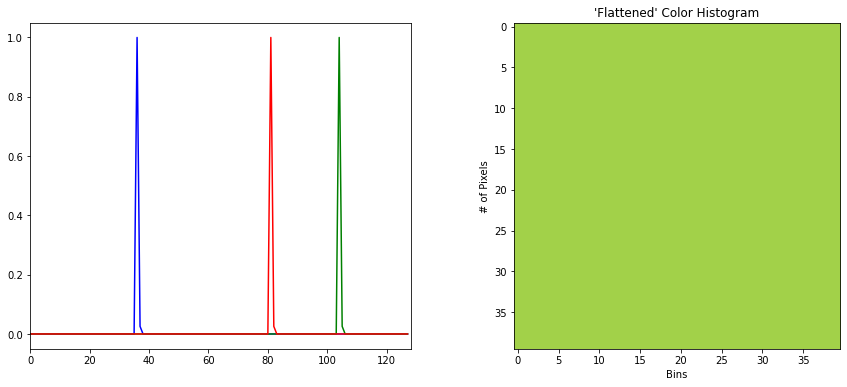

<Figure size 432x288 with 0 Axes>

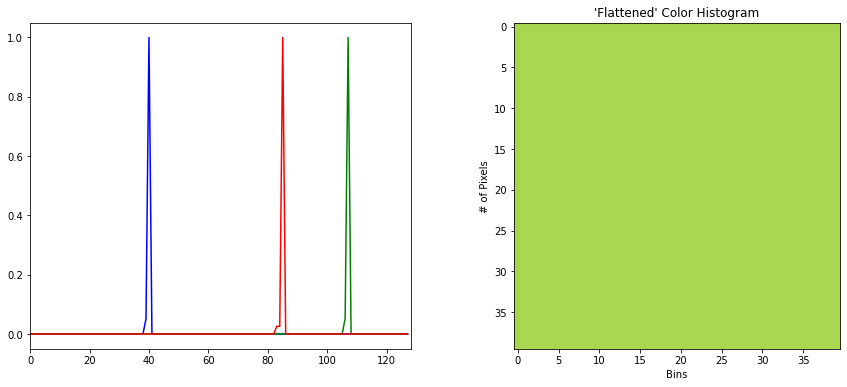

<Figure size 432x288 with 0 Axes>

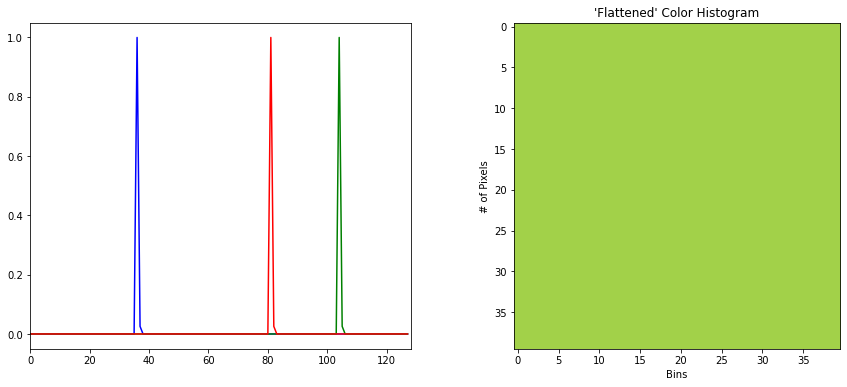

<Figure size 432x288 with 0 Axes>

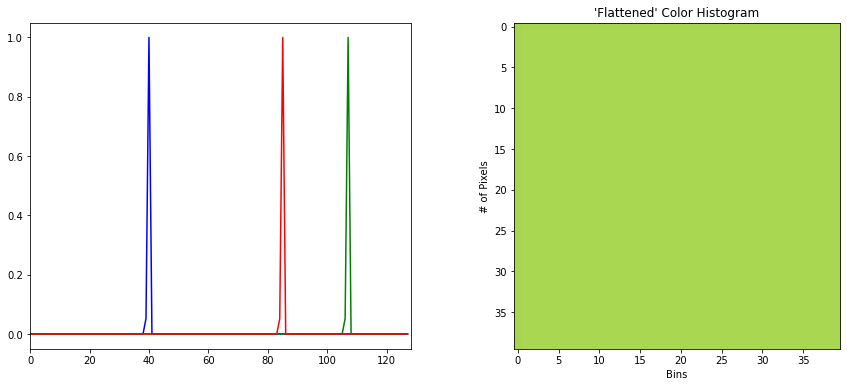

<Figure size 432x288 with 0 Axes>

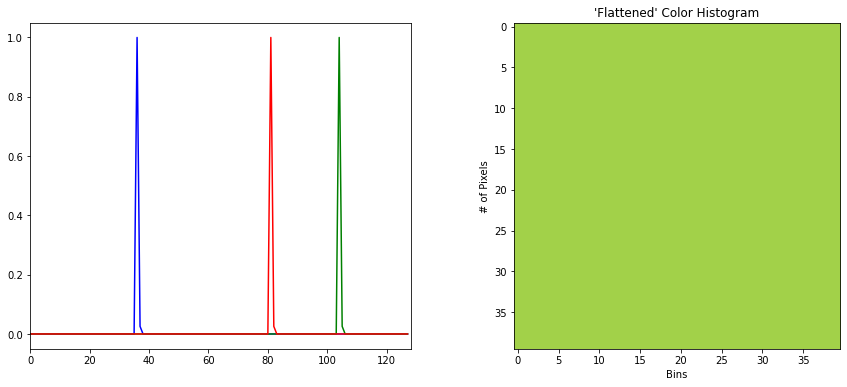

<Figure size 432x288 with 0 Axes>

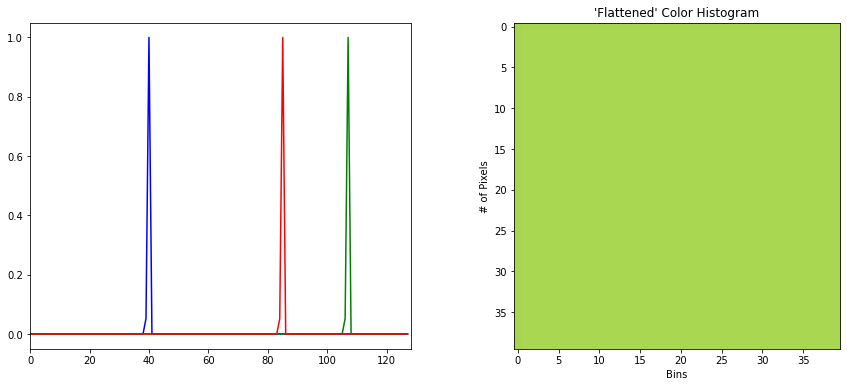

<Figure size 432x288 with 0 Axes>

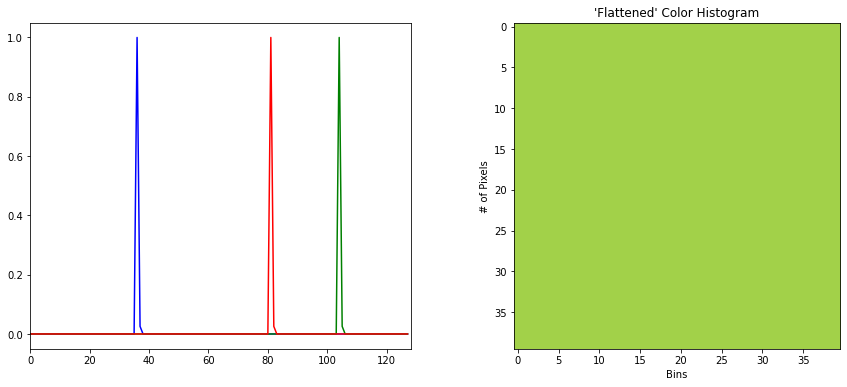

<Figure size 432x288 with 0 Axes>

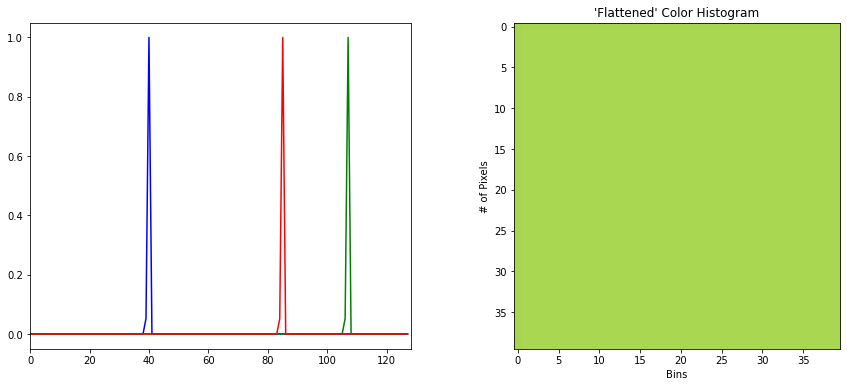

<Figure size 432x288 with 0 Axes>

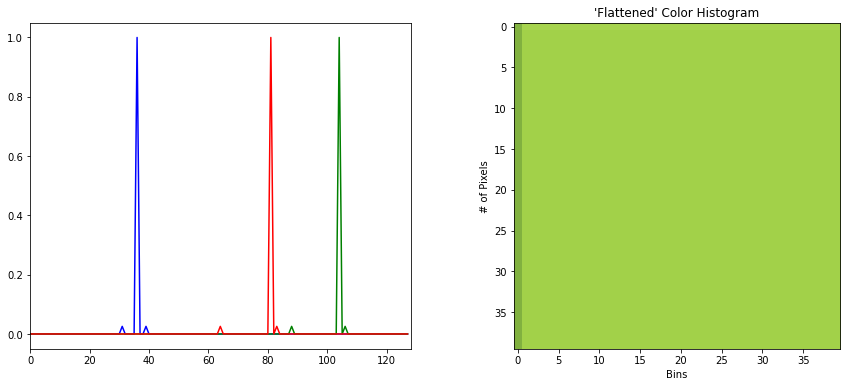

<Figure size 432x288 with 0 Axes>

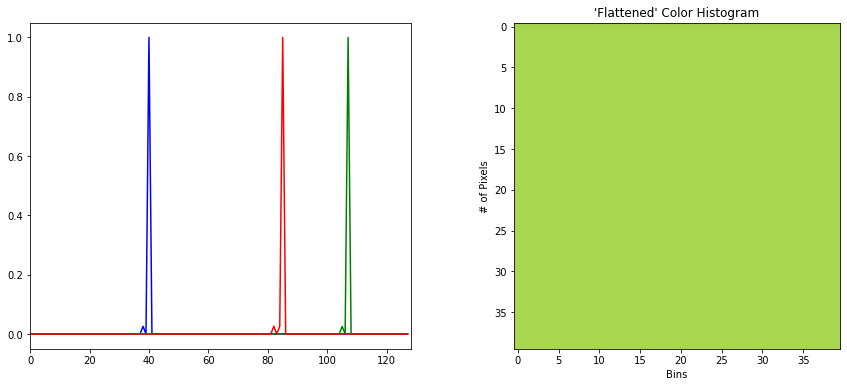

<Figure size 432x288 with 0 Axes>

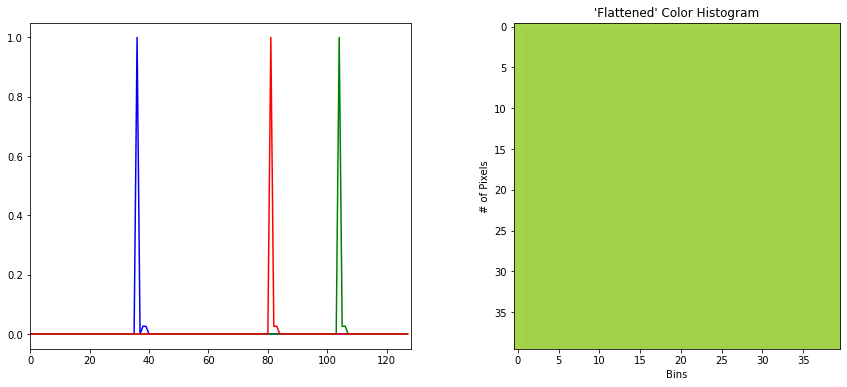

<Figure size 432x288 with 0 Axes>

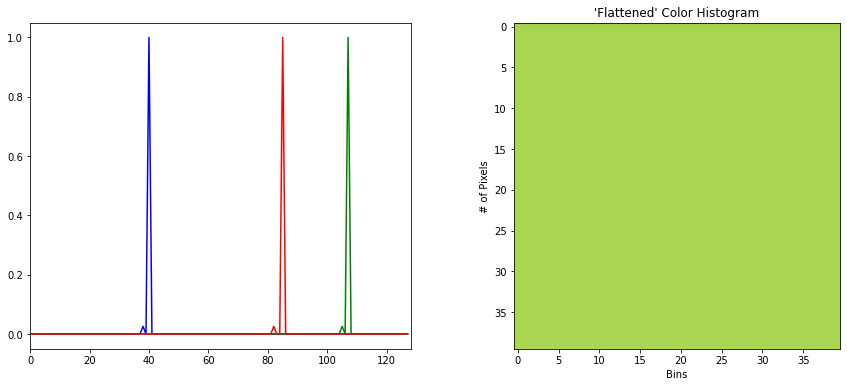

<Figure size 432x288 with 0 Axes>

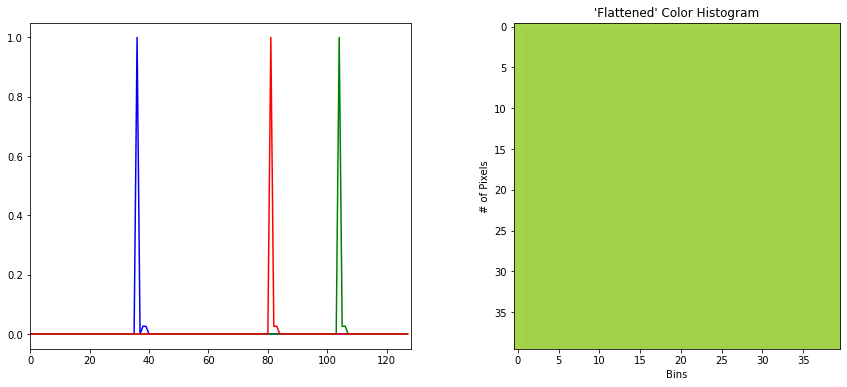

<Figure size 432x288 with 0 Axes>

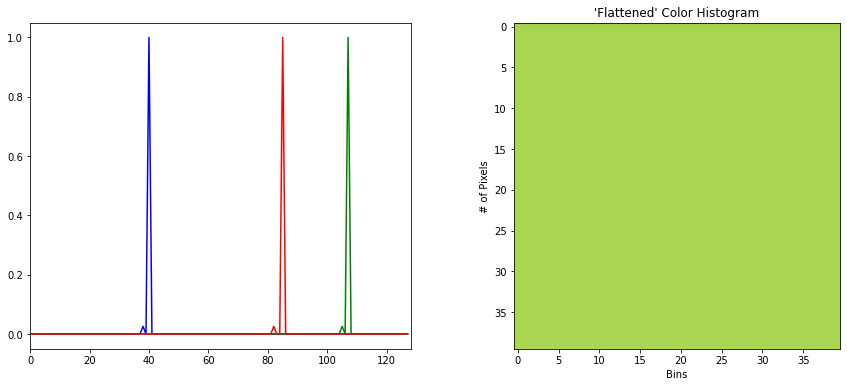

<Figure size 432x288 with 0 Axes>

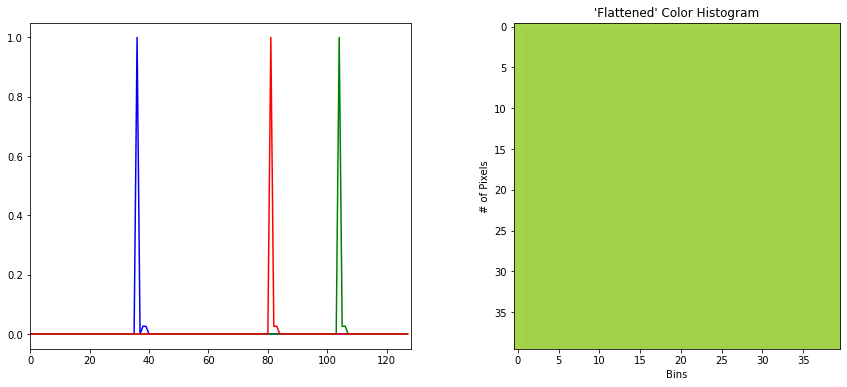

<Figure size 432x288 with 0 Axes>

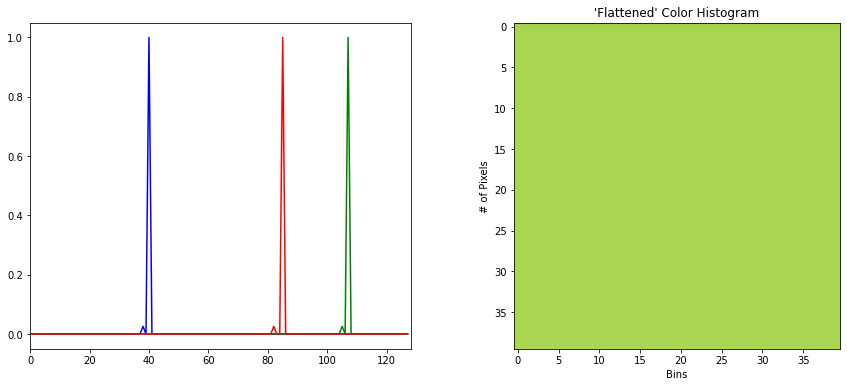

<Figure size 432x288 with 0 Axes>

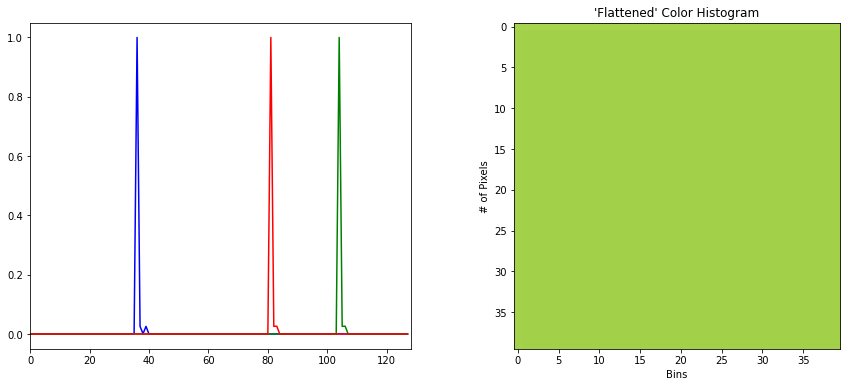

<Figure size 432x288 with 0 Axes>

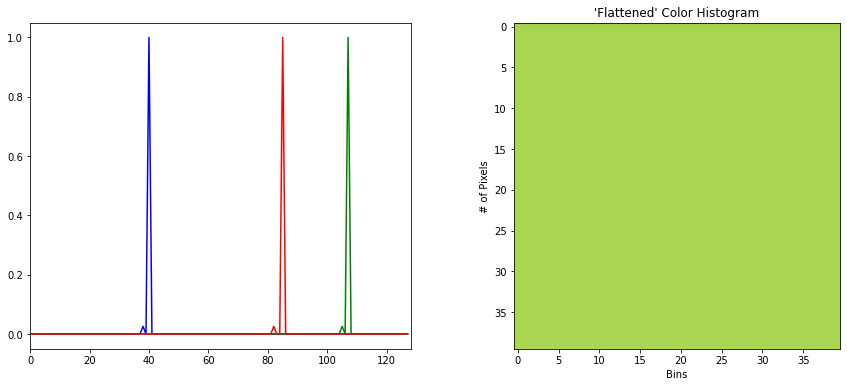

<Figure size 432x288 with 0 Axes>

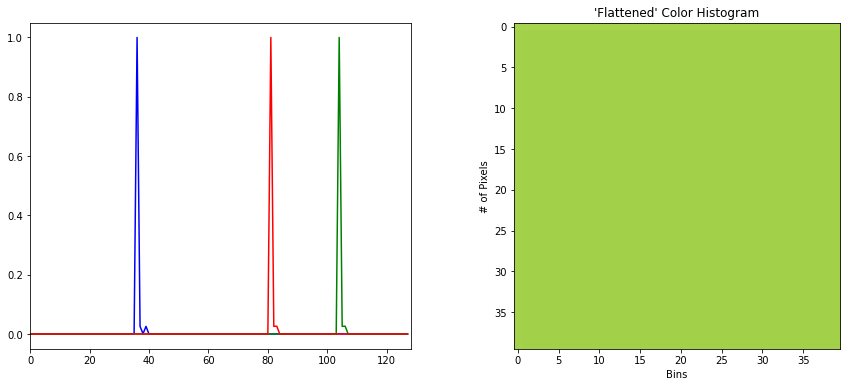

<Figure size 432x288 with 0 Axes>

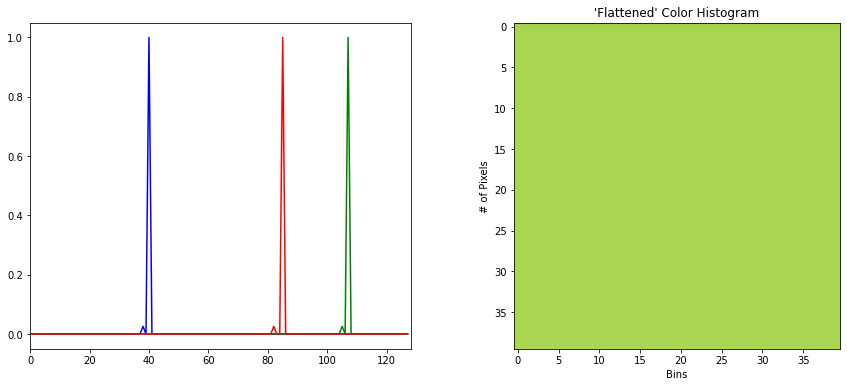

<Figure size 432x288 with 0 Axes>

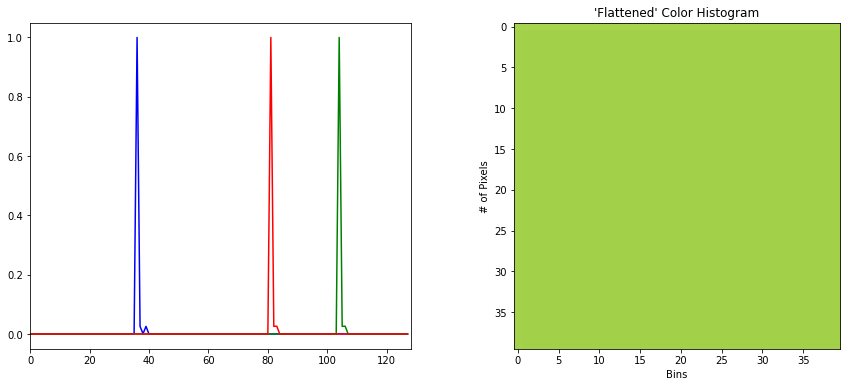

<Figure size 432x288 with 0 Axes>

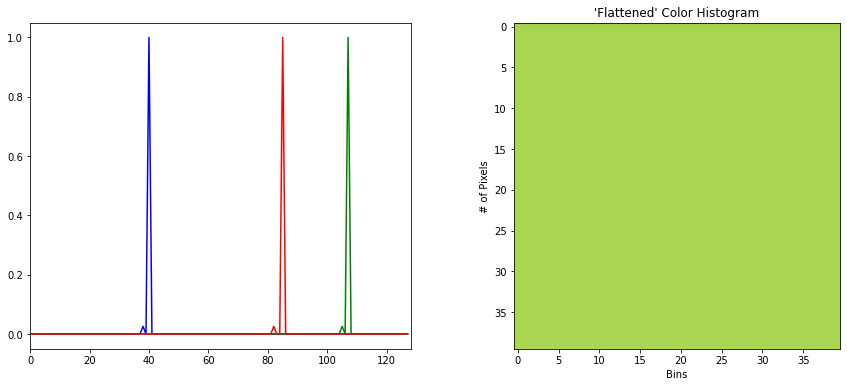

<Figure size 432x288 with 0 Axes>

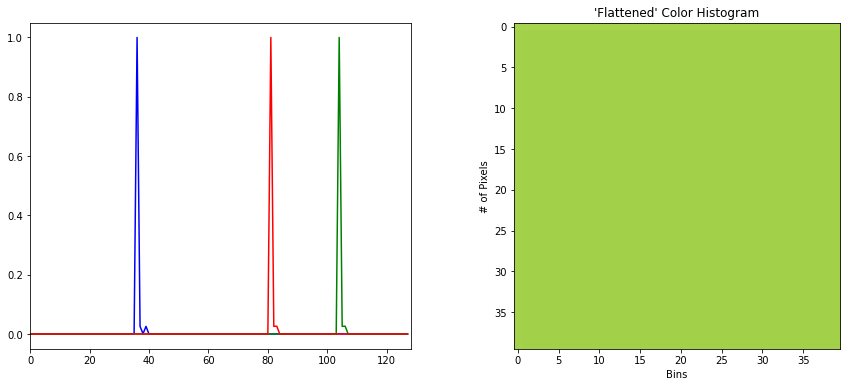

<Figure size 432x288 with 0 Axes>

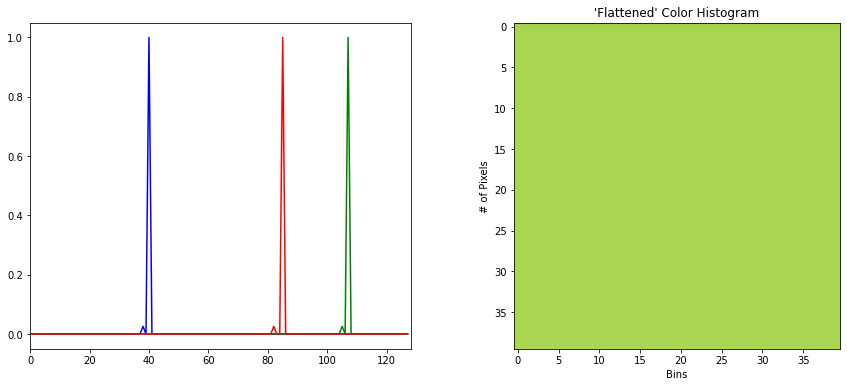

<Figure size 432x288 with 0 Axes>

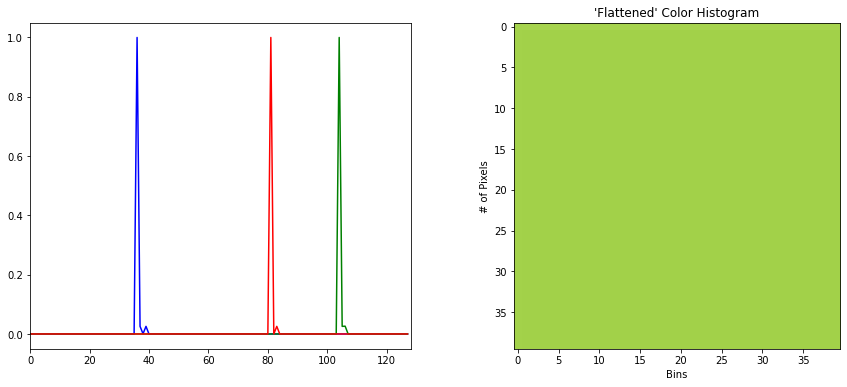

<Figure size 432x288 with 0 Axes>

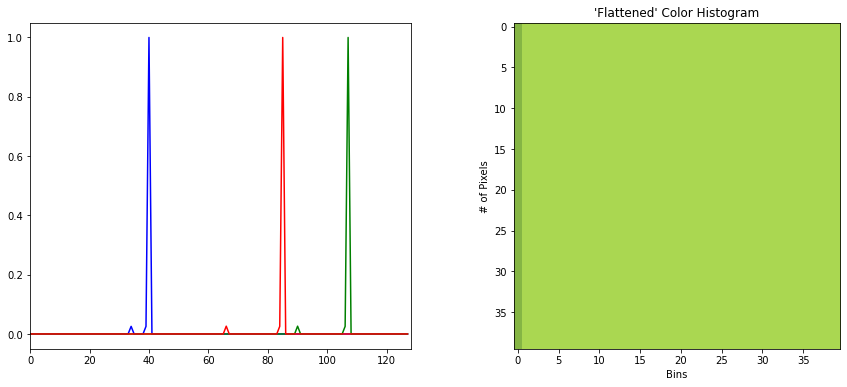

<Figure size 432x288 with 0 Axes>

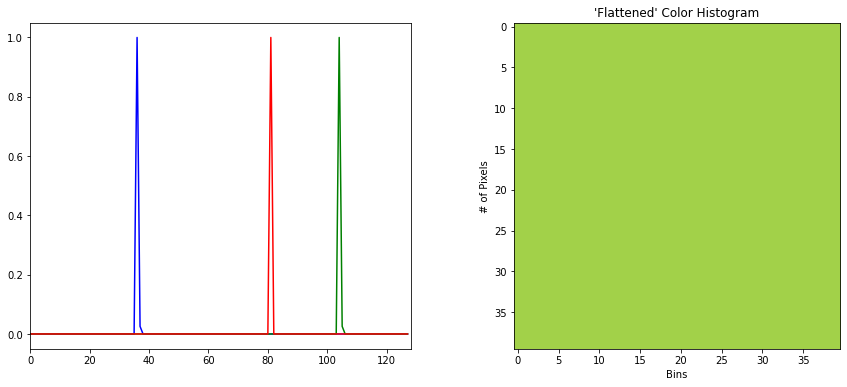

<Figure size 432x288 with 0 Axes>

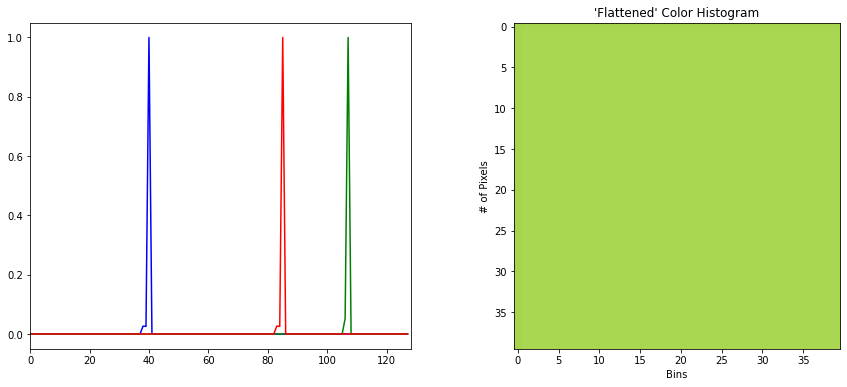

<Figure size 432x288 with 0 Axes>

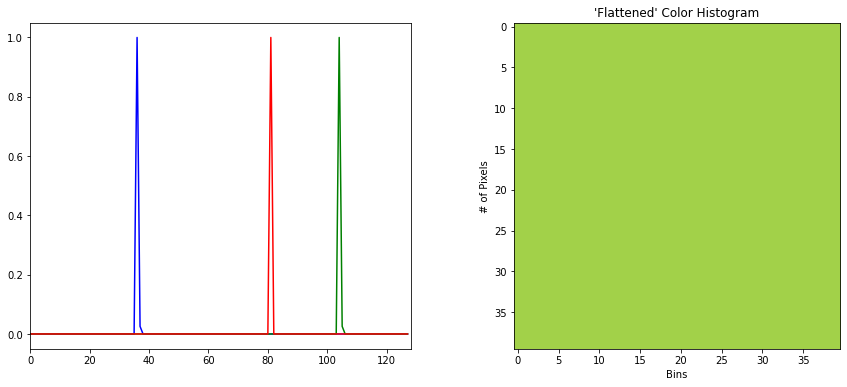

<Figure size 432x288 with 0 Axes>

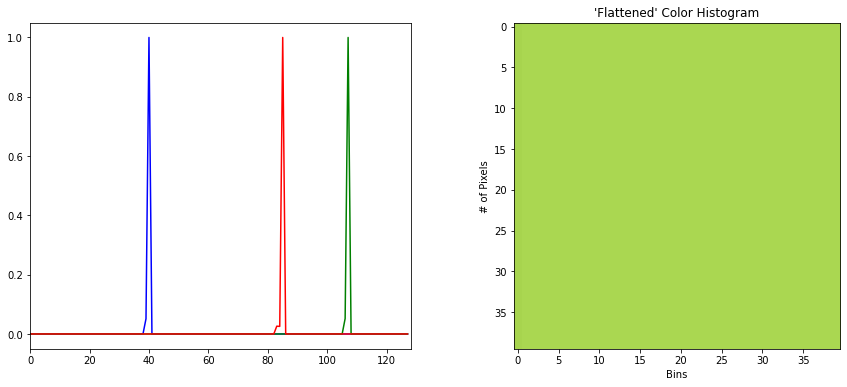

<Figure size 432x288 with 0 Axes>

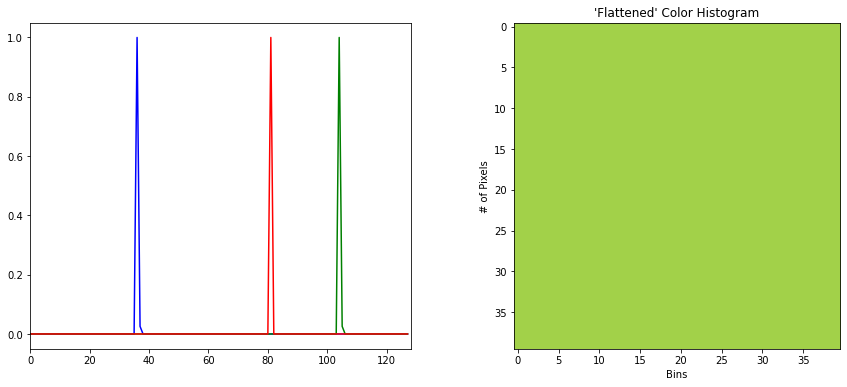

<Figure size 432x288 with 0 Axes>

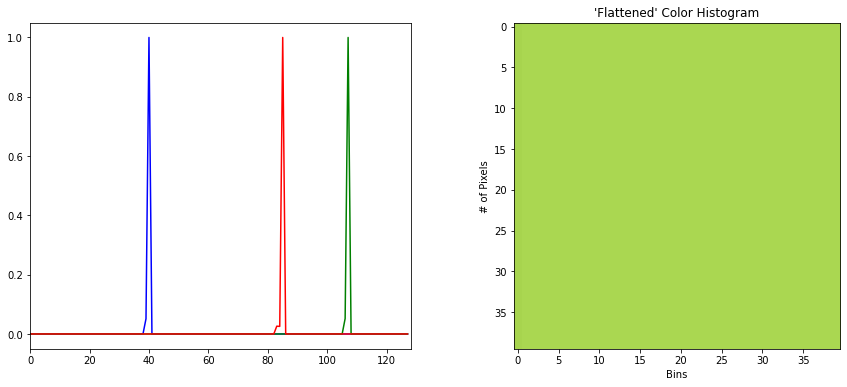

<Figure size 432x288 with 0 Axes>

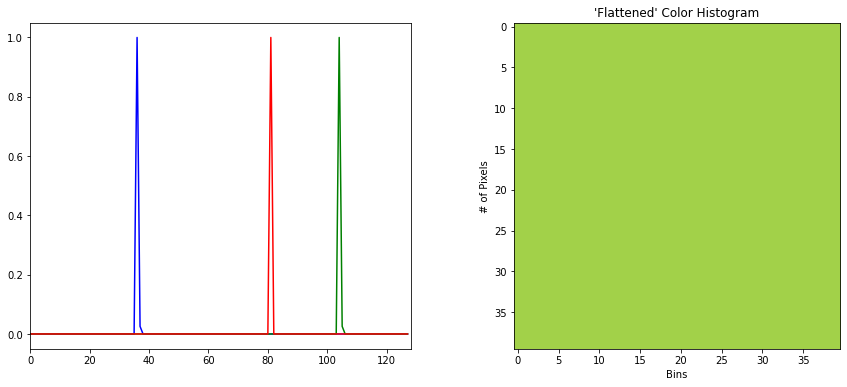

<Figure size 432x288 with 0 Axes>

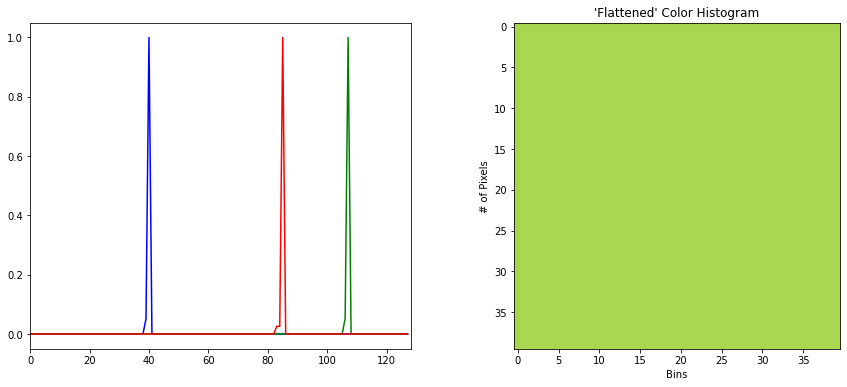

<Figure size 432x288 with 0 Axes>

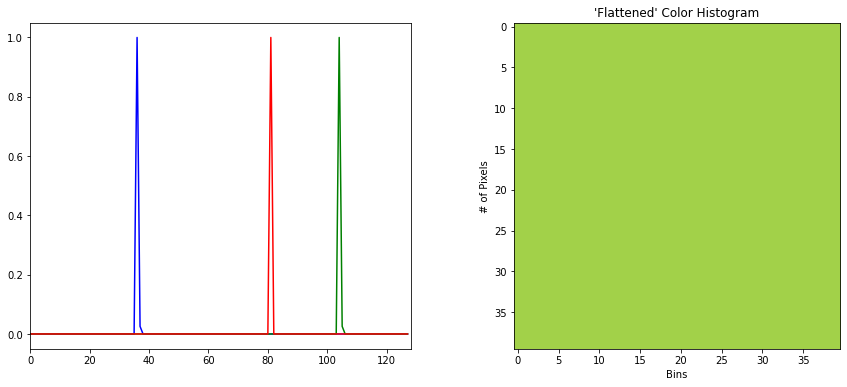

<Figure size 432x288 with 0 Axes>

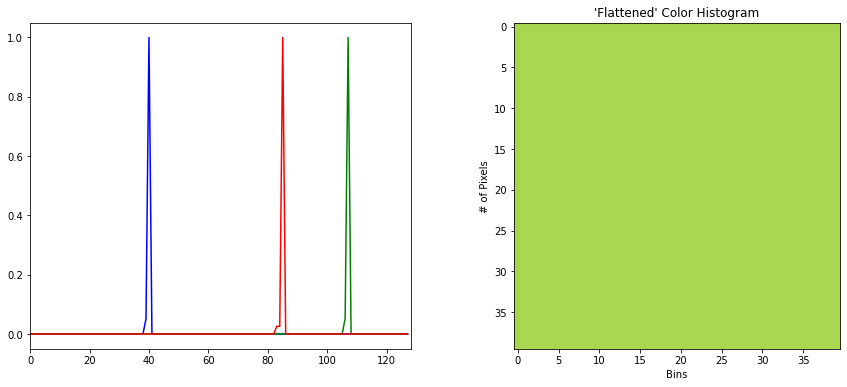

<Figure size 432x288 with 0 Axes>

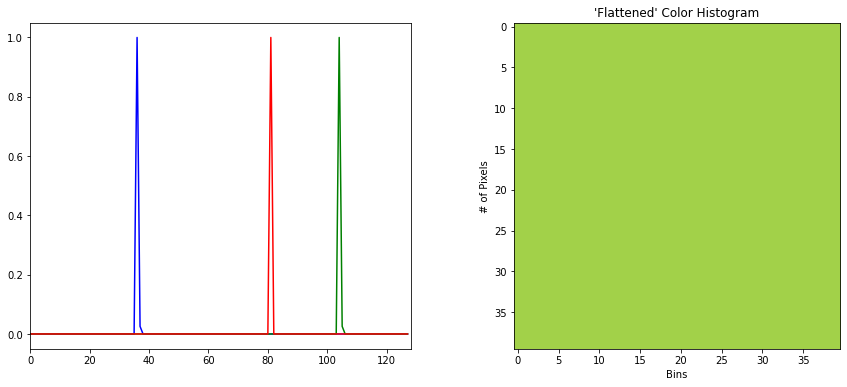

<Figure size 432x288 with 0 Axes>

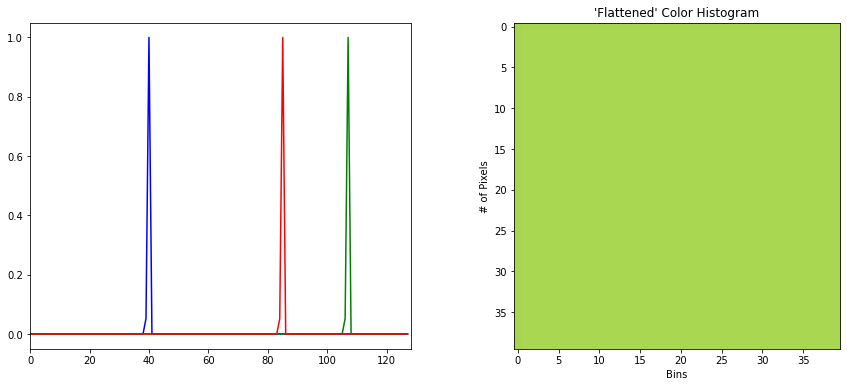

<Figure size 432x288 with 0 Axes>

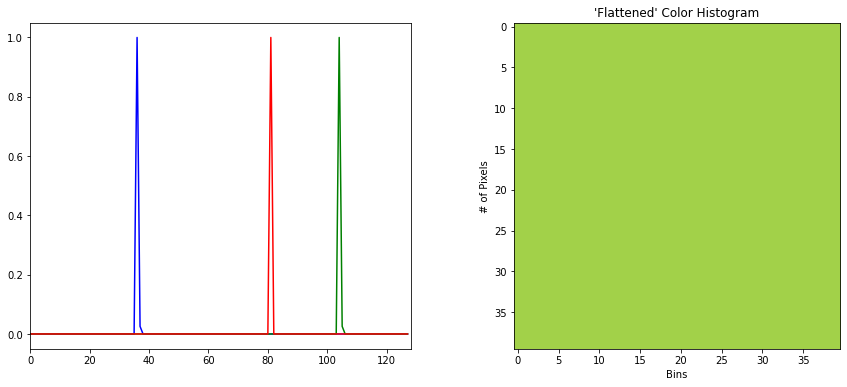

<Figure size 432x288 with 0 Axes>

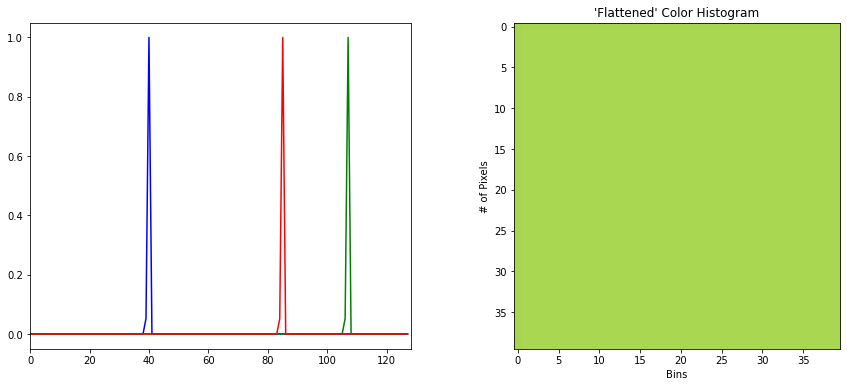

<Figure size 432x288 with 0 Axes>

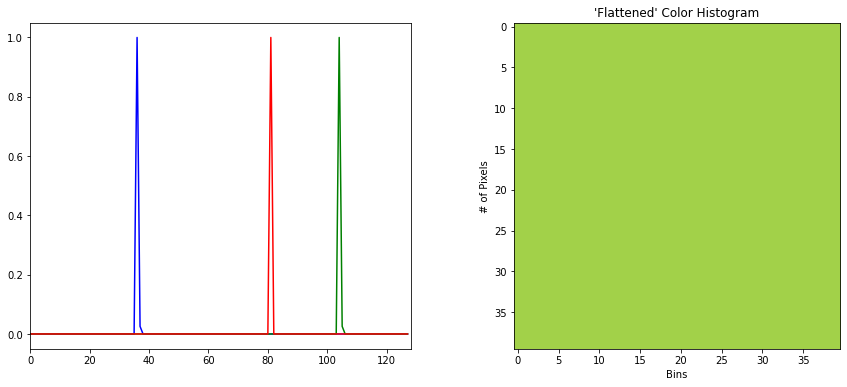

<Figure size 432x288 with 0 Axes>

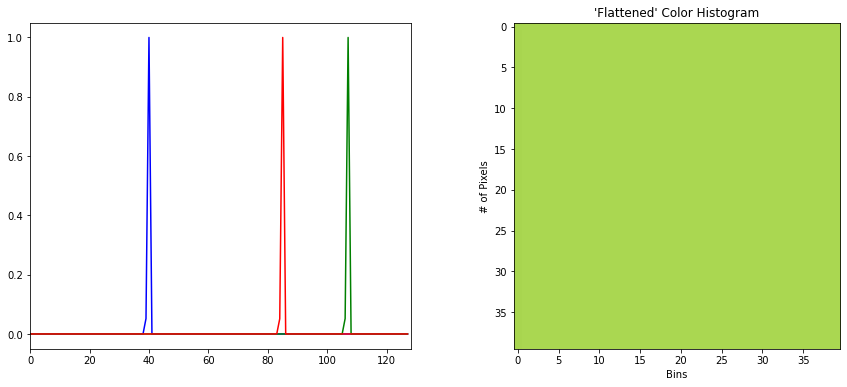

<Figure size 432x288 with 0 Axes>

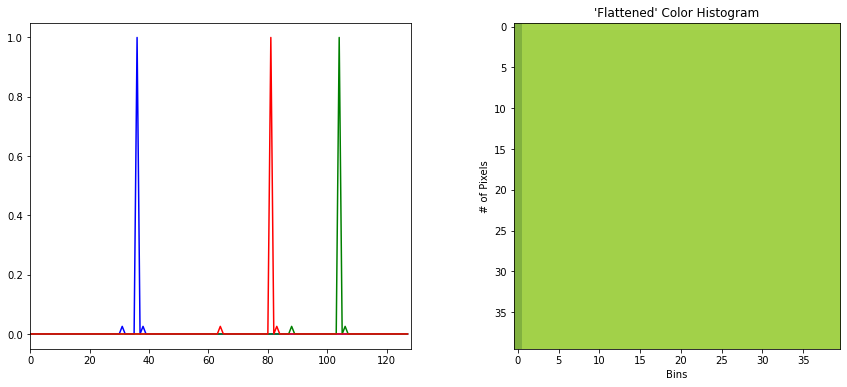

<Figure size 432x288 with 0 Axes>

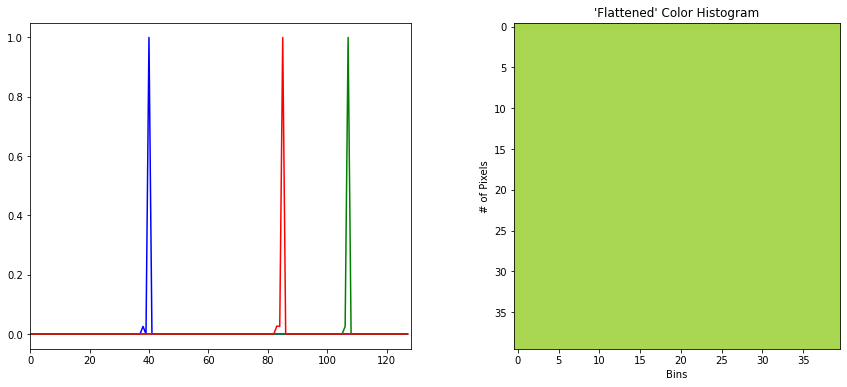

<Figure size 432x288 with 0 Axes>

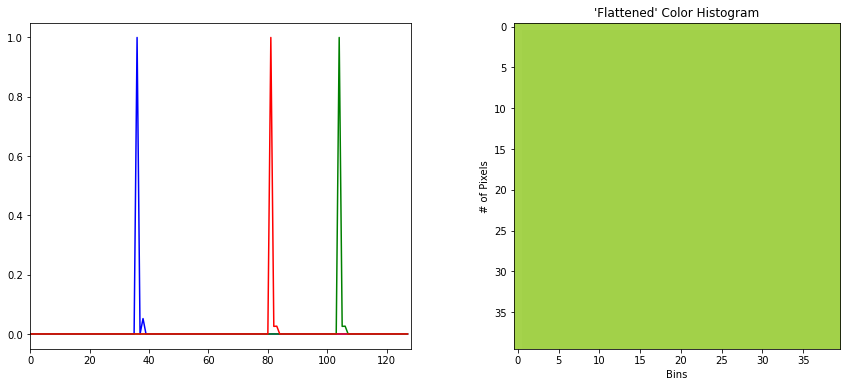

<Figure size 432x288 with 0 Axes>

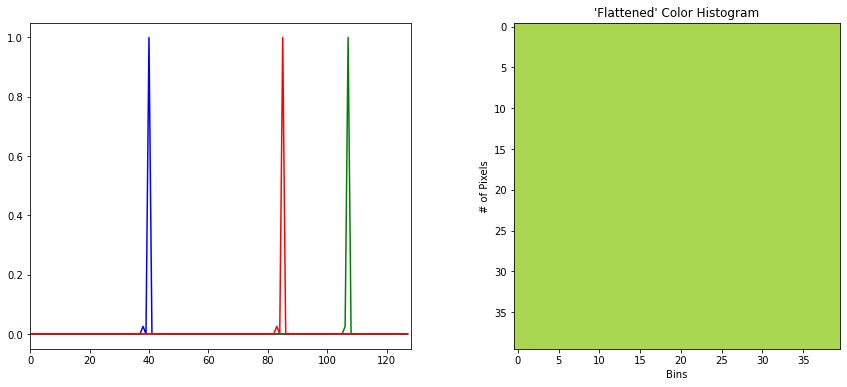

<Figure size 432x288 with 0 Axes>

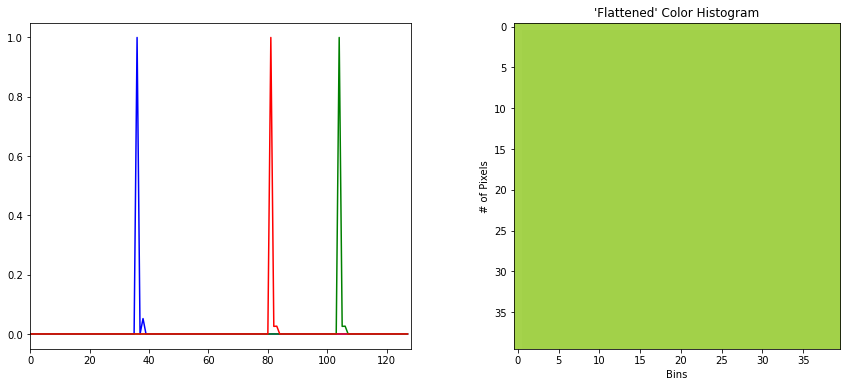

<Figure size 432x288 with 0 Axes>

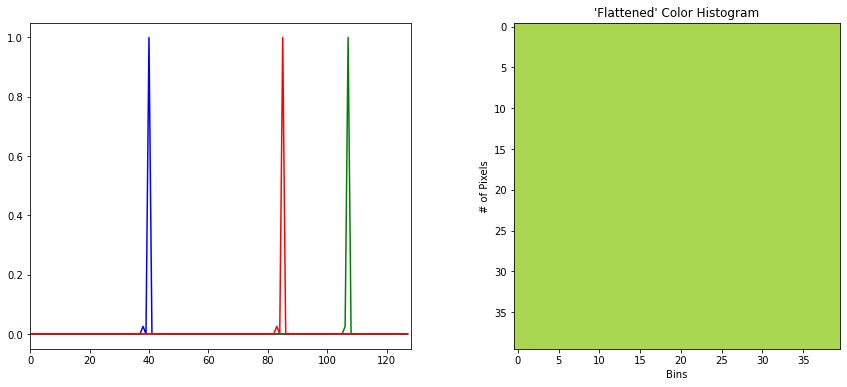

<Figure size 432x288 with 0 Axes>

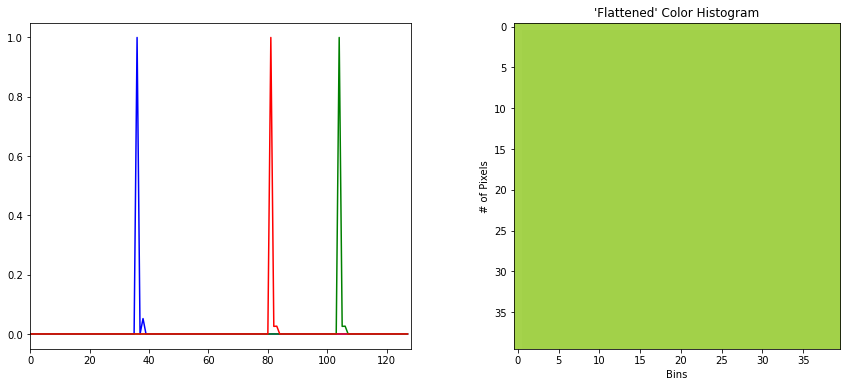

<Figure size 432x288 with 0 Axes>

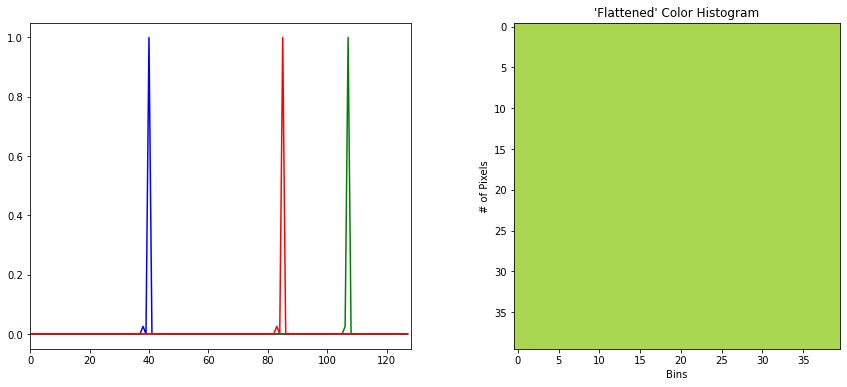

<Figure size 432x288 with 0 Axes>

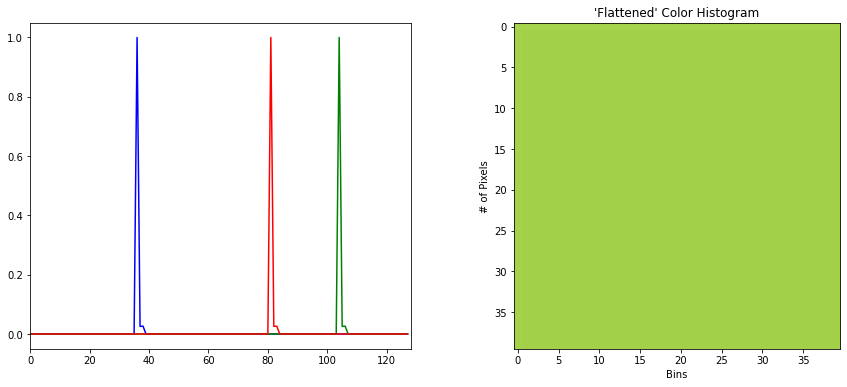

<Figure size 432x288 with 0 Axes>

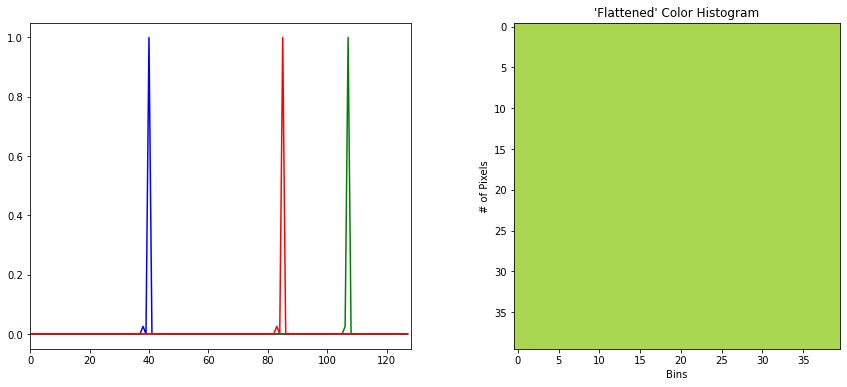

<Figure size 432x288 with 0 Axes>

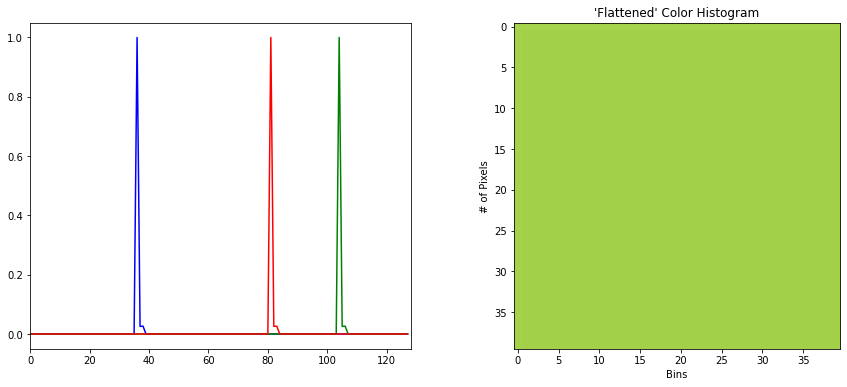

<Figure size 432x288 with 0 Axes>

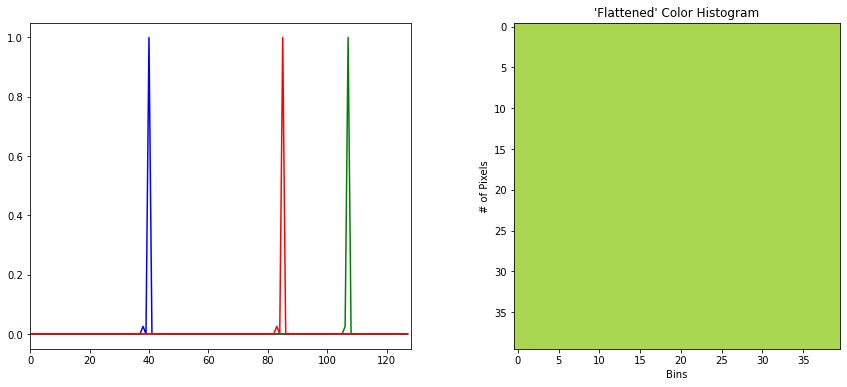

<Figure size 432x288 with 0 Axes>

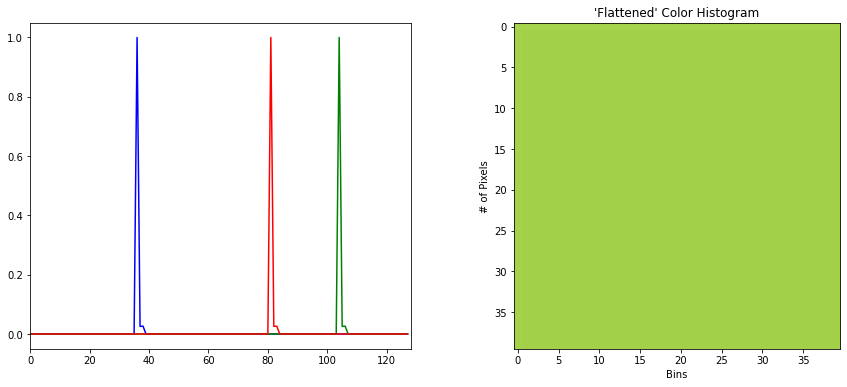

<Figure size 432x288 with 0 Axes>

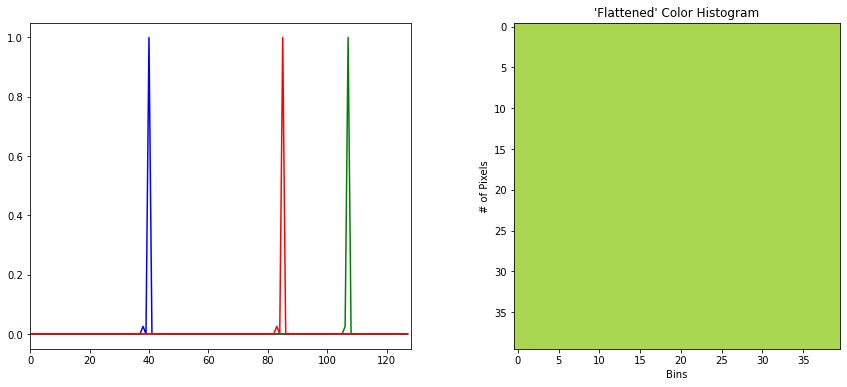

<Figure size 432x288 with 0 Axes>

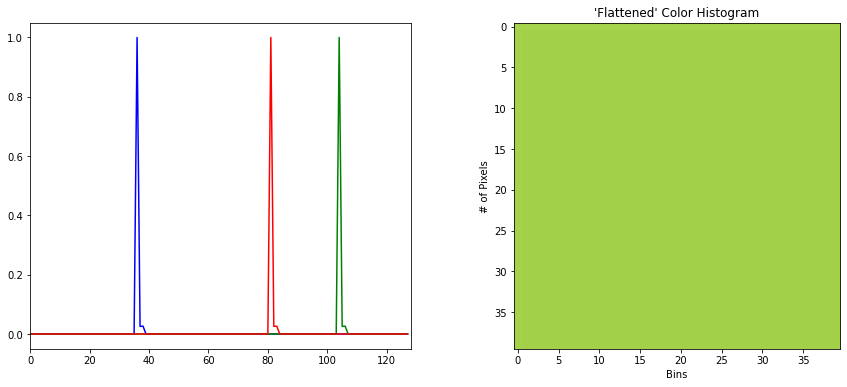

<Figure size 432x288 with 0 Axes>

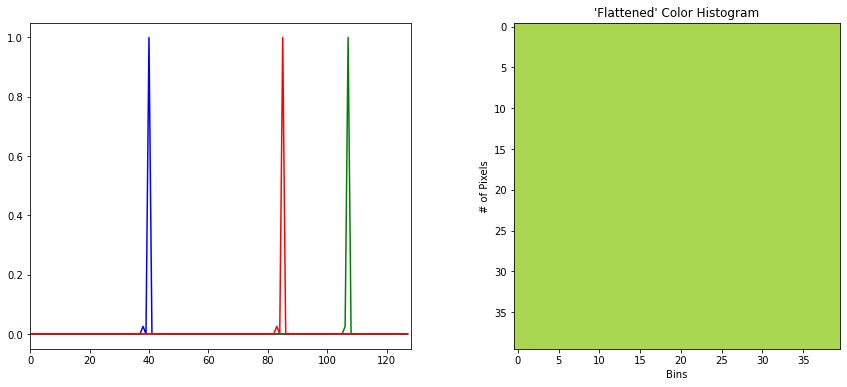

<Figure size 432x288 with 0 Axes>

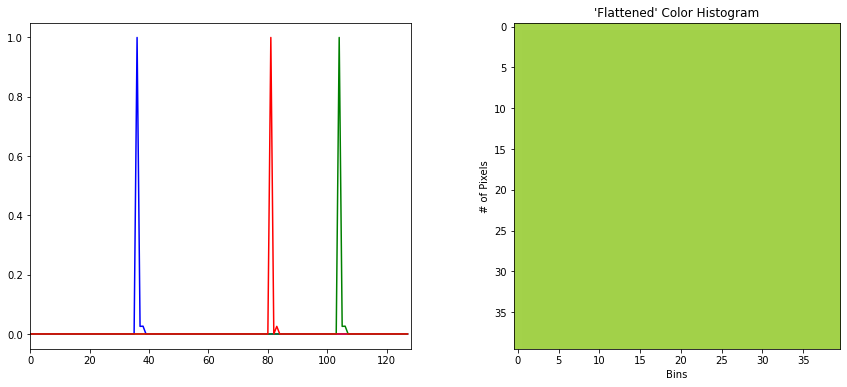

<Figure size 432x288 with 0 Axes>

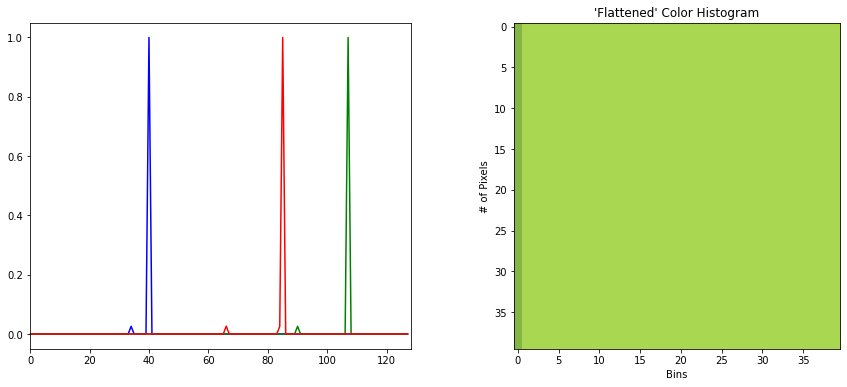

<Figure size 432x288 with 0 Axes>

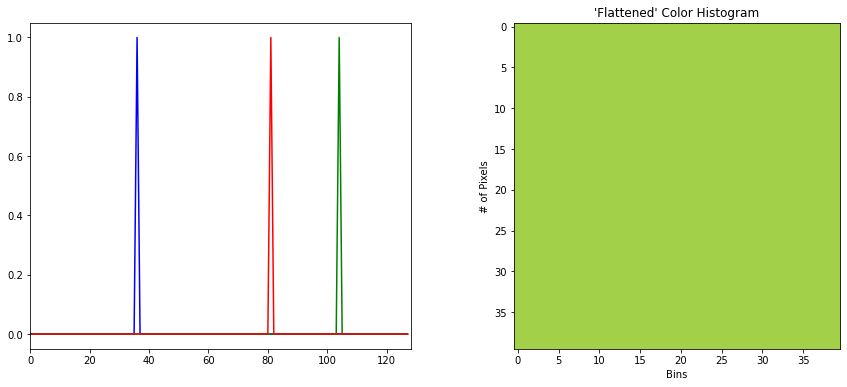

<Figure size 432x288 with 0 Axes>

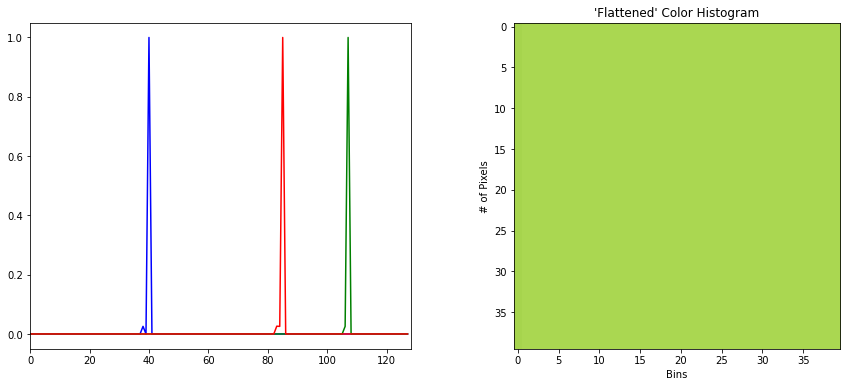

<Figure size 432x288 with 0 Axes>

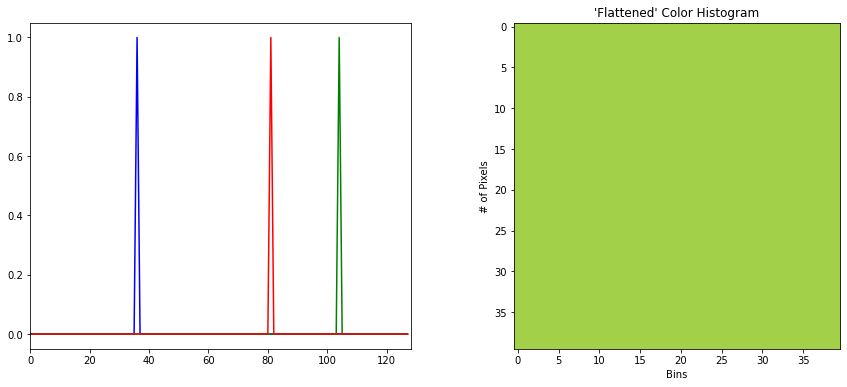

<Figure size 432x288 with 0 Axes>

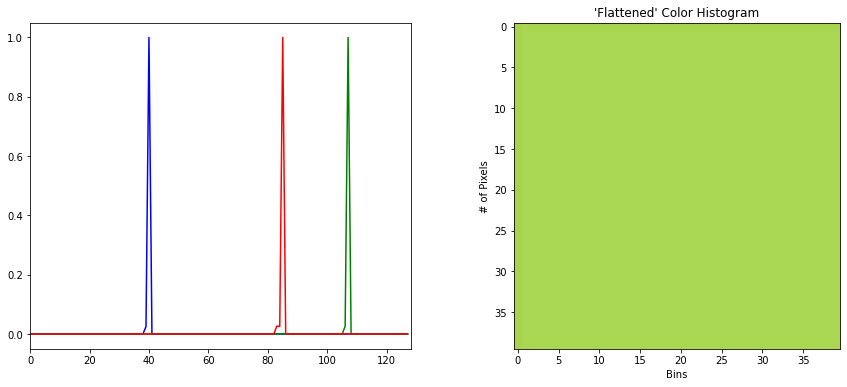

<Figure size 432x288 with 0 Axes>

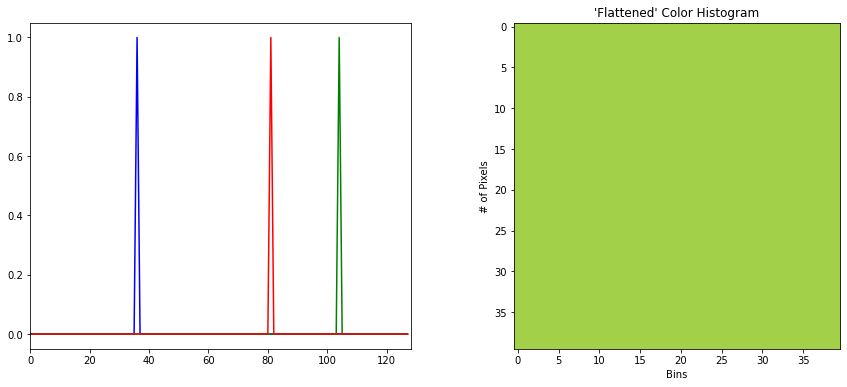

<Figure size 432x288 with 0 Axes>

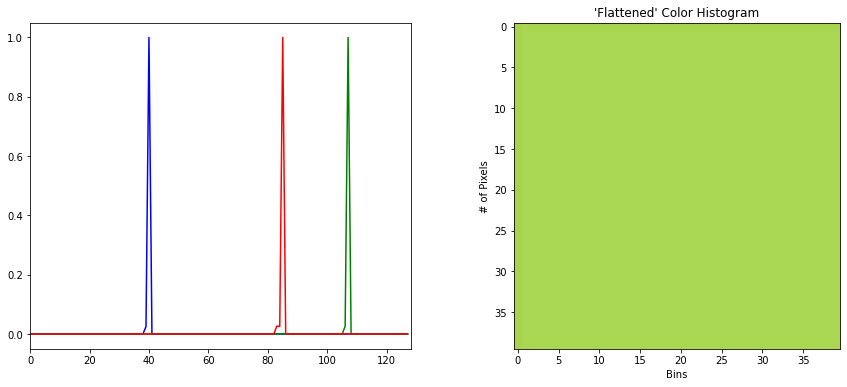

<Figure size 432x288 with 0 Axes>

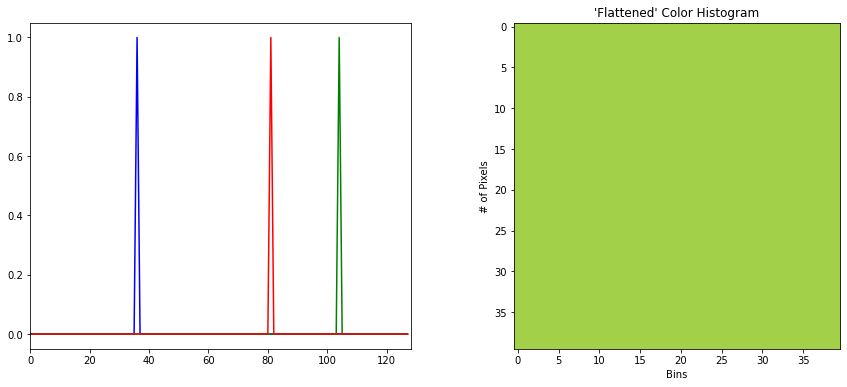

<Figure size 432x288 with 0 Axes>

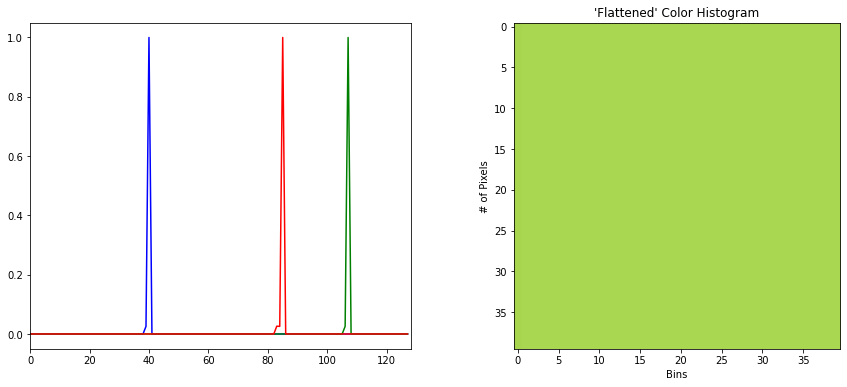

<Figure size 432x288 with 0 Axes>

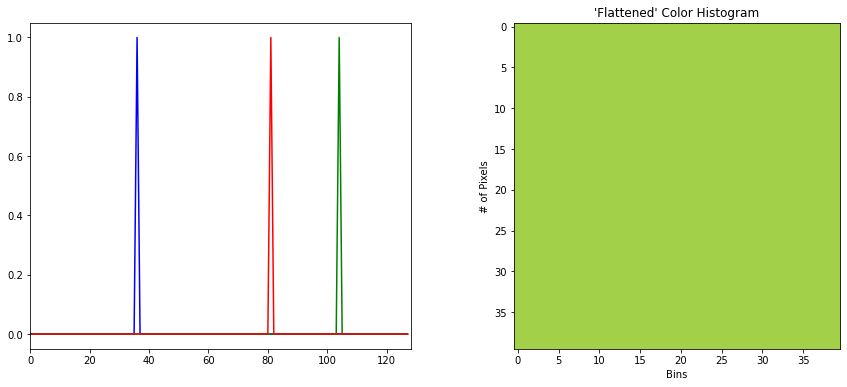

<Figure size 432x288 with 0 Axes>

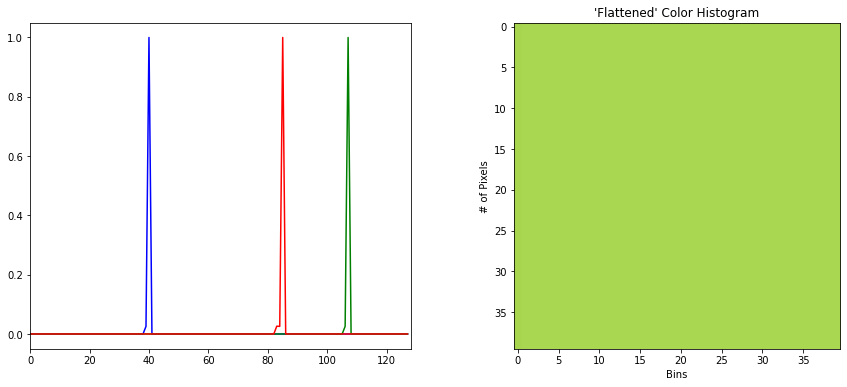

<Figure size 432x288 with 0 Axes>

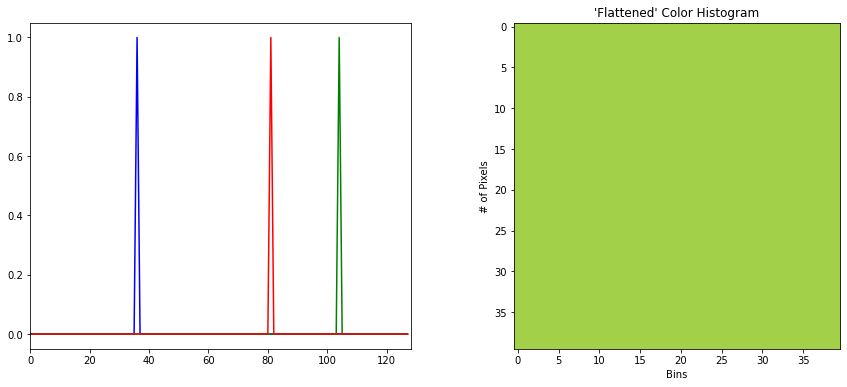

<Figure size 432x288 with 0 Axes>

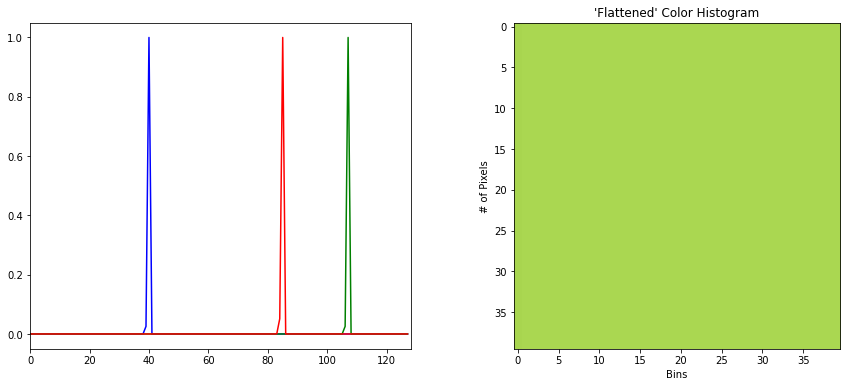

<Figure size 432x288 with 0 Axes>

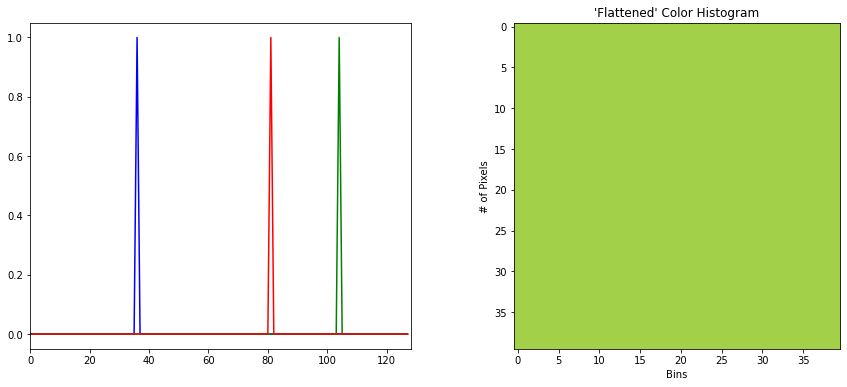

<Figure size 432x288 with 0 Axes>

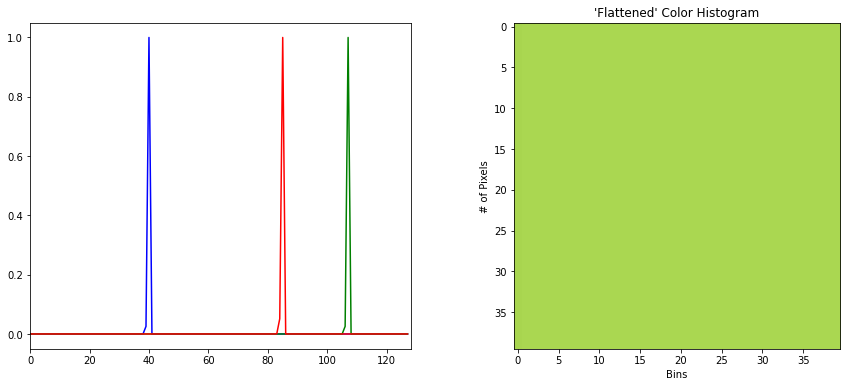

<Figure size 432x288 with 0 Axes>

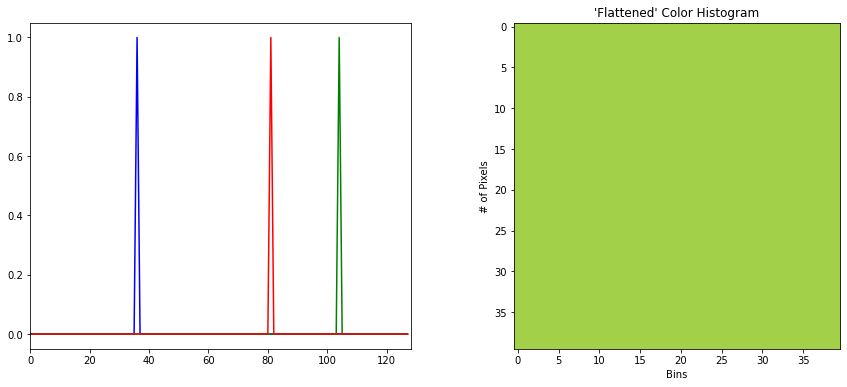

<Figure size 432x288 with 0 Axes>

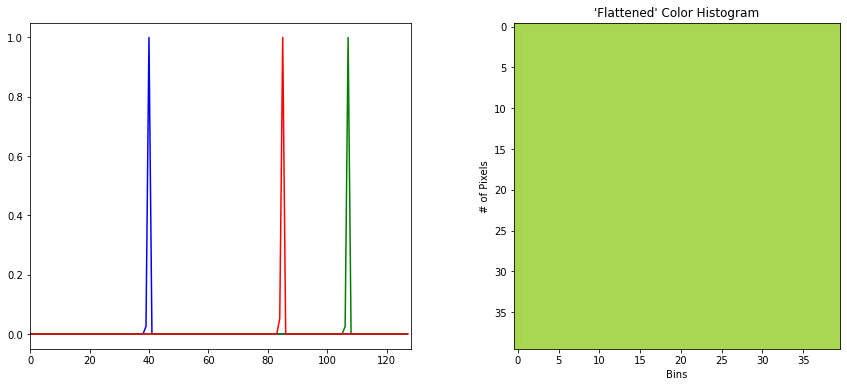

In [26]:
# for img_row in img_seg_1:
#     for img_tile in img_row:
#         hist_tmp = plot_hist(img_tile)

# Fetch images

## Labeled

In [113]:
def calc_all_hist():
    hist_all_label = []
    for label in labels:
        labeled_path = f"{labeled_folder_path}/{label}/"

        hist_label = []
        for filename in os.listdir(labeled_path):
    #         print(labeled_path + filename)
            img = cv2.imread(labeled_path + filename)
            hist_img = calc_hist(img)
            hist_label.append(hist_img)
        hist_all_label.append(hist_label)

In [37]:
cv2.imshow('image', all_img[3][1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## Probe

In [144]:
threshold = 0.8
sample_folder_path = "img_probe"
subfolder_path = [f"{sample_folder_path}/img_{i}/" for i in range(7)]

calc_all_hist()

for path in subfolder_path:
    for filename in os.listdir(path):
        img = cv2.imread(path + filename)
        hist_probe = calc_hist(img)
        
        matched_i = -1
        matched_j = -1
        max_coeff = 0
        
        for i in range(n_label):
            for j in range(len(hist_all_label[i])):
                sum_diff = 0
                diffs = []
                for chan in range(3):
                    diff = cv2.compareHist(hist_probe[chan], hist_all_label[i][j][chan], cv2.HISTCMP_CORREL)
                    sum_diff += diff
                    diffs.append(diff)
                
                avg_diff = sum_diff/3
                to_print = False
                if(avg_diff > threshold):
                    to_print = True
                    for k in range(3):
                        if(diffs[k] < threshold):
                            to_print = False
                
                if(to_print):   #  and i!=1 and i!=0
#                     print(f"Average coeff. of ({label_str[i]},{j}) & {filename} = {avg_diff}")
                    
#                     plot_hist(hist_probe)
#                     plot_hist(hist_all_label[i][j])
                    
                    if(avg_diff>max_coeff):
                        max_coeff = avg_diff
                        matched_i = i
                        matched_j = j
                    
        if(max_coeff!=0 and matched_i!=1):    #
            print(f"filename = {filename}, label = {label_str[matched_i]}, i = {matched_i}, j = {matched_j}, Max coeff. = {max_coeff}")
            print('----------------------------------------------------------')
    print('========================================================================================')

filename = img_0_02_06.png, label = APL, i = 0, j = 5, Max coeff. = 0.9983631194007979
----------------------------------------------------------
filename = img_0_10_13.png, label = BDY, i = 2, j = 4, Max coeff. = 0.8618960163754471
----------------------------------------------------------
filename = img_1_02_02.png, label = APL, i = 0, j = 8, Max coeff. = 0.9988842554996523
----------------------------------------------------------
filename = img_1_02_05.png, label = BDY, i = 2, j = 2, Max coeff. = 0.9528120179528163
----------------------------------------------------------
filename = img_1_03_03.png, label = HD, i = 3, j = 9, Max coeff. = 0.9068039371917603
----------------------------------------------------------
filename = img_1_04_03.png, label = HD, i = 3, j = 5, Max coeff. = 0.966477492989824
----------------------------------------------------------
filename = img_2_08_09.png, label = BDY, i = 2, j = 4, Max coeff. = 0.8726652382278139
----------------------------------------

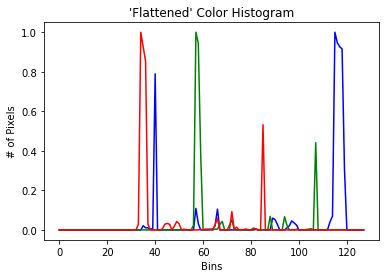

In [115]:
img_path = "img_labeled/2/im_2_6_4.png"
img_i = cv2.imread(img_path)
hist_i = calc_hist(img_i)
plot_hist(hist_i)

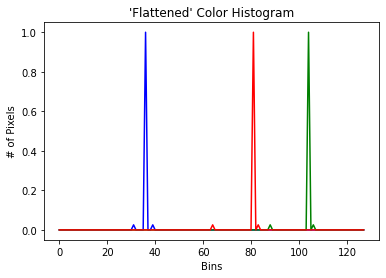

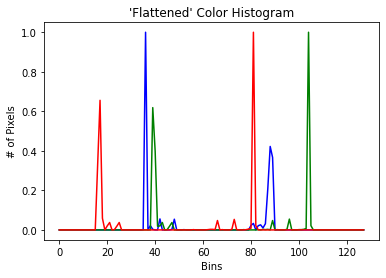

In [117]:
img_no = 0
img_filename = "img_0_10_1.png"

folder_path = f"img_probe/img_{img_no}"
img_path = f"{folder_path}/{img_filename}"

img_i = cv2.imread(img_path)
hist_i = calc_hist(img_i)
plot_hist(hist_i)
plot_hist(hist_all_label[2][4])